# Data preparation | Activity-based model | Preday
## Day pattern level models

Created by Mayara Monteiro - maymmo@dtu.dk\
Technical University of Denmark

Relevant info:
"Tur" means "trip" in danish, so the "Tur table" is the table containing all the trips.

Datasets needed:
* session.csv (TU - socioeconomic info of the respondents)
* tur.csv (TU - data on the trips performed)
* OTM_Zones_SesID_new.csv (TU - custom made dataset: OTM zoning - based on SessionID)
* OTM zones_tur_o_d.csv (TU - custom made dataset: OTM zoning - based on TripID - TurId)

### 1. Import data and libraries

In [1]:
#Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Import TU "Session" table
#df= pd.read_csv ('session.csv',sep=";")
df= pd.read_csv ('session.csv',sep=";", encoding = "ISO-8859-1")
df.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'session.csv'

In [3]:
#Check variables
#print(df.columns.tolist())

### 2. Initial filter of the relevant data (Data cleaning individuals)

In [4]:
#Filter according to the year
#TU variable -Session table - DiaryYear (Year of the trip diary)
#Total sample:
#2017: 9910
#2018: 11097
#2019: 10222
#2020: 12160

df=df[(df['DiaryYear'] ==2017)|(df['DiaryYear'] ==2018)|(df['DiaryYear'] ==2019)] #Data from 2017 to 2019

In [5]:
#Keep only those who answered about trips on weekdays (monday-friday)
#TU variable - DiaryWeekday
#1 --> Monday
#2 --> Tuesday
#3 --> Wednesday
#4 --> Thursday
#5 --> Friday
#6 --> Saturday
#7 --> Sunday

df=df[(df['DiaryWeekday'] < 6)]

In [6]:
#Remove observations from special weekdays (Mon-Wed of Easter week, Friday after Ascension Day, 1 May, weekdays between Christmas and New Year.)
#TU variable - DiaryDaytype
df=df[(df['DiaryDaytype'] != 13)]

In [7]:
#Create a variable travel or not
df['HasTravel']=df['TotalNumTrips'].apply(lambda x: 1 if x >= 1 else 0)

### 3. Defining categories - socioeconomic variables

### 3.1 Gender

In [8]:
#TU variable - RespSex
#1 --> Man/boy
#2 --> Woman/girl

df['male']=df['RespSex'].apply(lambda x: 1 if x == 1 else 0)
df['female']=df['RespSex'].apply(lambda x: 1 if x == 2 else 0)
#df['Missing_gender'] --> there is no missing data related to gender in the sample 2018/2019

### 3.2 Age

In [9]:
#TU variable - RespAgeCorrect [5,120]
#df['ageUpto19']=df['RespAgeCorrect'].apply(lambda x: 1 if x <= 19 else 0)
#df['age2025']=df['RespAgeCorrect'].apply(lambda x: 1 if 20 <= x <=25 else 0)
#df['age2635']=df['RespAgeCorrect'].apply(lambda x: 1 if 26 <= x <=35 else 0)
#df['age3650']=df['RespAgeCorrect'].apply(lambda x: 1 if 36 <= x <=50 else 0)
#df['age5165']=df['RespAgeCorrect'].apply(lambda x: 1 if 51 <= x <=65 else 0)
#df['ageMorethan65']=df['RespAgeCorrect'].apply(lambda x: 1 if x > 65 else 0)
#df['MissingAge']--> there is no missing data related to age in the sample 2018/2019

#df['Adult']=df['RespAgeCorrect'].apply(lambda x: 1 if x >= 18 else 0)

In [10]:
#TU variable - RespAgeCorrect [5,120]
df['ageUpto17']=df['RespAgeCorrect'].apply(lambda x: 1 if x <= 17 else 0)
df['age1824']=df['RespAgeCorrect'].apply(lambda x: 1 if 18 <= x <=24 else 0)
df['age2529']=df['RespAgeCorrect'].apply(lambda x: 1 if 25 <= x <=29 else 0)
df['age3054']=df['RespAgeCorrect'].apply(lambda x: 1 if 30 <= x <=54 else 0)
df['age5564']=df['RespAgeCorrect'].apply(lambda x: 1 if 55 <= x <=64 else 0)
df['age65orMore']=df['RespAgeCorrect'].apply(lambda x: 1 if x >= 65 else 0)
#df['MissingAge']--> there is no missing data related to age in the sample 2018/2019

df['Adult']=df['RespAgeCorrect'].apply(lambda x: 1 if x >= 18 else 0)

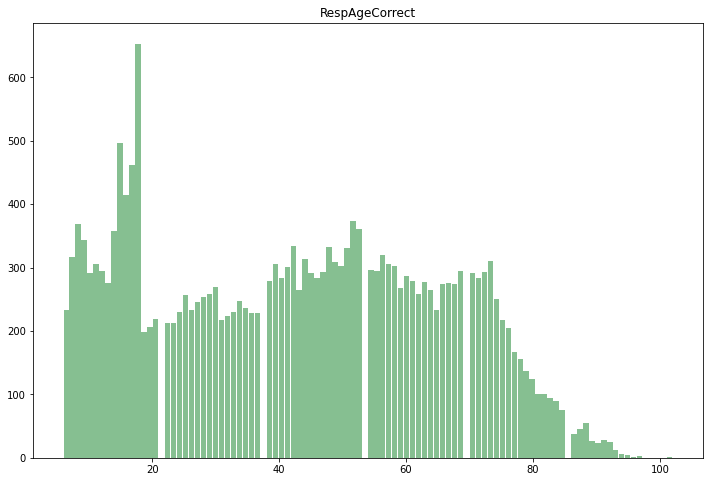

In [11]:
a = df.hist(column='RespAgeCorrect', bins=102, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

### 3.3 Occupation (assign categories and remove observations without info on occupation)

In [12]:
#TU variable - RespPrimOcc
##103 --> Kindergarten, pre-school
##107 --> Pupil (primary school etc.)
##116 --> Pupil (high school etc.)
##120 --> Student at university or other further education
##130 --> Apprentice, trainee
##210 --> Employee
##211 --> National serviceman
##221 --> Self-employed
##222 --> Assisting spouse (to self-employed person)
##231 --> Leave w/salary (maternity leave and other leave)
##232 --> Leave on state benefits (maternity leave and other leave)
##233 --> Leave w/o pay (maternity leave and other leave)
##310 --> Unemployed, unemployment benefit
##320 --> Social assistance, rehabilitation, long-term ill
##350 --> Non-age pensioner (e.g disabled)
##360 --> Receiver of pre-retirement pay (Early retirement pension)
##370 --> Old Age pensioner
##390 --> Full-time housewife', otherwise out of work


df['retired']=df['RespPrimOcc'].apply(lambda x: 1 if x == 370 else (1 if x==360 else 0))
df['disabled']=df['RespPrimOcc'].apply(lambda x: 1 if 320<= x <= 350 else 0)
df['onLeave']=df['RespPrimOcc'].apply(lambda x: 1 if 231<= x <= 233 else 0)
df['homemaker']=df['RespPrimOcc'].apply(lambda x: 1 if x == 390 else (1 if x == 222 else 0))
df['employed']=df['RespPrimOcc'].apply(lambda x: 1 if 210<= x <= 221 else 0)
df['unemployed']=df['RespPrimOcc'].apply(lambda x: 1 if x == 310 else 0)
df['universityStudent']=df['RespPrimOcc'].apply(lambda x: 1 if x == 120 else 0)
#df['student']=df['RespPrimOcc'].apply(lambda x: 1 if x == 116 else (1 if x==107 else (1 if x == 103 else 0)))
df['trainee']=df['RespPrimOcc'].apply(lambda x: 1 if x == 130 else 0)

In [13]:
#Categories of students
#When the preschool, primary school or high-school student is older than 15y, then classify as "other student" 
for i, row in df.iterrows():
    if (((df.loc[i,'RespPrimOcc'] == 103)|(df.loc[i,'RespPrimOcc'] == 107)|(df.loc[i,'RespPrimOcc'] == 116)) & (df.loc[i,'RespAgeCorrect']>15)):
        df.loc[i,'other_student'] = 1
        df.loc[i,'preschool_student']= 0
        df.loc[i,'primaryschool_student']= 0
        df.loc[i,'highschool_student']= 0
    elif df.loc[i,'RespPrimOcc'] == 103:
        df.loc[i,'other_student'] = 0
        df.loc[i,'preschool_student']= 1
        df.loc[i,'primaryschool_student']= 0
        df.loc[i,'highschool_student']= 0
    elif df.loc[i,'RespPrimOcc'] == 107:
        df.loc[i,'other_student'] = 0
        df.loc[i,'preschool_student']= 0
        df.loc[i,'primaryschool_student']= 1
        df.loc[i,'highschool_student']= 0
    elif df.loc[i,'RespPrimOcc'] == 116:
        df.loc[i,'other_student'] = 0
        df.loc[i,'preschool_student']= 0
        df.loc[i,'primaryschool_student']= 0
        df.loc[i,'highschool_student']= 1
    else:
        df.loc[i,'other_student'] = 0
        df.loc[i,'preschool_student']= 0
        df.loc[i,'primaryschool_student']= 0
        df.loc[i,'highschool_student']= 0

In [14]:
#There is no missing data in 2018-2019, but there is missing in 2017
df['AnyTypeofStudent']= df['universityStudent'] + df['preschool_student'] + df['primaryschool_student']+ df['highschool_student']+df['other_student'] + df['trainee']
#df['school_student']=df['preschool_student']+ df['primaryschool_student'] + df['highschool_student']
df['checkmiss']=df['employed']+df['retired']+df['disabled']+df['onLeave']+df['homemaker']+df['unemployed']+df['universityStudent'] + df['trainee'] + df['preschool_student'] + df['primaryschool_student']+ df['highschool_student']+df['other_student']

In [15]:
#Remove missing (only 3 in 2017)
df=df[(df['checkmiss'] > 0)]
df.describe()

,SessionId,InterviewType,DiaryDate,DiaryYear,DiaryMonth,DiaryWeekday,DiaryDaytype,HomeAdrMunCode,HomeAdrCityCode,HomeAdrCitySize,...,employed,unemployed,universityStudent,trainee,other_student,preschool_student,primaryschool_student,highschool_student,AnyTypeofStudent,checkmiss
count,21845.000000,21845.000000,21845.000000,21845.000000,21845.000000,21845.000000,21845.000000,21845.000000,21842.000000,1.867800e+04,...,21845.00000,21845.000000,21845.000000,21845.000000,21845.000000,21845.000000,21845.000000,21845.000000,21845.000000,21845.0
mean,413544.090181,1.781186,17721.674754,2018.008148,6.682307,2.905241,11.949050,447.144839,7414.423588,4.044513e+05,...,0.44715,0.021012,0.043122,0.008377,0.070405,0.001785,0.146304,0.001511,0.271504,1.0
std,19370.595574,2.021538,311.584279,0.799324,3.472808,1.394621,3.950958,257.865593,6235.602558,5.749302e+05,...,0.49721,0.143426,0.203136,0.091145,0.255834,0.042216,0.353418,0.038839,0.444745,0.0
min,357022.000000,0.000000,17168.000000,2017.000000,1.000000,1.000000,11.000000,101.000000,0.000000,2.000000e+02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,406815.000000,2.000000,17456.000000,2017.000000,4.000000,2.000000,11.000000,190.000000,1100.000000,4.672000e+03,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,417481.000000,2.000000,17749.000000,2018.000000,7.000000,3.000000,11.000000,430.000000,10199.000000,4.104400e+04,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,426701.000000,2.000000,17977.000000,2019.000000,10.000000,4.000000,11.000000,727.000000,10843.000000,1.295686e+06,...,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,470878.000000,20.000000,18261.000000,2019.000000,12.000000,5.000000,33.000000,860.000000,70404.000000,1.320629e+06,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [16]:
#Weekly working hours imputation according to primary occupation
df=df.copy()
df['WorkHoursPw'] = df.groupby(['RespPrimOcc'])["WorkHoursPw"].transform(lambda x: x.fillna(x.mean()))

#### Full-time or part-time

In [17]:
#Full-time (37h/week or more) vs. part-time job
#TU variable - WorkHoursPw

#considering assisting spouse as not employed
df.loc[df.RespPrimOcc == 222, 'WorkHoursPw'] = 0

df['fulltime']=df['WorkHoursPw'].apply(lambda x: 1 if x >= 37 else 0).copy()
df['parttime']=df['WorkHoursPw'].apply(lambda x: 1 if 0 < x < 37 else 0).copy()
df.describe()

#Check whether sum of those who were assigned to full-time and part-time is equal to total of "employed"
df[['fulltime','parttime','employed']].sum()

fulltime    7520
parttime    2248
employed    9768
dtype: int64

#### Flexible working hours or not

In [18]:
#1: Fixed working hours, same every day 
#2: Fixed working hours, vary day by day 
#3: Flexitime with compulsory time/core time
#4: Full flexitime


df['FLEXWORK']=df['WorkHourType'].apply(lambda x: 1 if x >2 else 0)

### 3.4 Car ownership

In [19]:
#HousehCarOwnership (household)

#HousehCarOwnership is calculated as the subset of household cars, that are actually owned (or leased/rented) by the household. 
#This excludes company-cars and co-owned cars.
#HousehCarOwnership should be used, if the calculation target is a benchmark or other usage with the car registry.

df['Dummy_CarOwn']=df['HousehCarOwnership'].apply(lambda x: 1 if x >= 1 else 0)
df['zero_Owncar']=df['HousehCarOwnership'].apply(lambda x: 1 if x == 0 else 0)
df['one_Owncar']=df['HousehCarOwnership'].apply(lambda x: 1 if x == 1 else 0)
df['two_Owncar']=df['HousehCarOwnership'].apply(lambda x: 1 if x == 2 else 0)
df['threeplus_Owncar']=df['HousehCarOwnership'].apply(lambda x: 1 if x >= 3 else 0)

df['oneplus_Owncar']=df['HousehCarOwnership'].apply(lambda x: 1 if x > 0 else 0)
df['twoplus_Owncar']=df['HousehCarOwnership'].apply(lambda x: 1 if x > 1 else 0)

### 3.5 Car availability

In [20]:
#HousehNumCars (household)
#represents the number of cars available to the household. This does not include short-term rented cars or company cars. 
#But the number includes, for example, company cars with private use, long-term rented cars and sharing cars with a neighbor (rare case).
#HousehNumCars should be used, if the focus is the actual household transport options.

df['Dummy_CarAvailable']=df['HousehNumcars'].apply(lambda x: 1 if x >= 1 else 0)
df['zero_Availcar']=df['HousehNumcars'].apply(lambda x: 1 if x == 0 else 0)
df['one_Availcar']=df['HousehNumcars'].apply(lambda x: 1 if x == 1 else 0)
df['two_Availcar']=df['HousehNumcars'].apply(lambda x: 1 if x == 2 else 0)
df['threeplus_Availcar']=df['HousehNumcars'].apply(lambda x: 1 if x >= 3 else 0)

df['oneplus_Availcar']=df['HousehNumcars'].apply(lambda x: 1 if x > 0 else 0)
df['twoplus_Availcar']=df['HousehNumcars'].apply(lambda x: 1 if x > 1 else 0)

In [21]:
df['threeplus_Availcar'].value_counts()

0    20669
1     1176
Name: threeplus_Availcar, dtype: int64

### 3.7 Car Sharing membership


In [22]:
df['CarSharingMember']=df['RespIsmemCarshare'].apply(lambda x: 1 if x == 1 else 0)

### 3.6 Bike ownership

In [23]:
#RespHasBicycle - yes/no question, whether the respondent has a bicycle [which is in working order and used at least once a month].
df['Dummy_BikeOwn']=df['RespHasBicycle'].apply(lambda x: 1 if x == 1 else 0)

### 3.7 Driver's license

In [24]:
#TU variable - ResphasDrivlic
df['DRVLC']=df['ResphasDrivlic'].apply(lambda x: 1 if x == 1 else 0)

### 3.8 Public transport accessibility at home

In [25]:
#TU variable-HomeAdrDistNearestStation
df['TrainMetroUpto1km']=df['HomeAdrDistNearestStation'].apply(lambda x: 1 if x <= 1 else 0)
df['TrainMetroUpto500m']=df['HomeAdrDistNearestStation'].apply(lambda x: 1 if x <= 0.5 else 0)

### 3.9 Public transport pass

In [26]:
#TU variable-RespHasRejsekort
df['PTPASS']=df['RespHasRejsekort'].apply(lambda x: 1 if x != 2 else 0)

### 3.10 Household/Family size and composition

In [27]:
#Household: A household is a group of people, who shares the same home and conduct household activities as a group 
#(participates in the household) - non-family household members are included (eg. au-pairs, people in a collective household, 
#people who rent a room and share activities).

#Family: Family is a subset of the household, who can be described by “family” relations – that is “my partner”, 
#“my parent” or “my child” – The definition is recursive.

#Nuclear family: The nuclear family includes only the part of the family fitting the pattern ”mum, dad and children” 
#according to the following prioritised rules: i. If the respondent has child living at home/child of partner, 
#but not grandchildren or children-in-law the nuclear family includes the respondent plus his/her possible spouse/partner 
#and their children under 25 years of age; ii. If the respondent is under 25 years of age and lives with his/her father or 
#mother but not with his/her spouse/partner, own children or grandchildren, the nuclear family includes the respondent 
#plus any siblings under 25 years of age, father and mother. iii. In other cases the nuclear family includes the respondent 
#and his/her possible spouse/partner.

df['HousehNumPers']=df['HousehNumPers'].fillna(0)
df['HousehNumAdults']=df['HousehNumAdults'].fillna(0)
df['FamNumPers']=df['FamNumPers'].fillna(0)
df['FamNumAdults']=df['FamNumAdults'].fillna(0)

df['FamNumChildren']=df['FamNumPers']-df['FamNumAdults']
df['FamHasChildren']=df['FamNumChildren'].apply(lambda x: 1 if x > 0 else 0)

In [28]:
df['FamHasChildren'].sum()

9369

In [29]:
test=df[df['FamNumChildren']==11]
test=test[['SessionId','FamNumPers','FamNumAdults','FamNumChildren','FamHasChildren']]
test

,SessionId,FamNumPers,FamNumAdults,FamNumChildren,FamHasChildren
146021,401728,13.0,2.0,11.0,1


### 3.11 Income

In [30]:
#TU variable - IncRespondent (Gross income, thousand DKK per year. 0 indicates actively selected no income. The question includes 'don't know' option and NULL-values are therefore widely occurring)
#TU variable - IncNuclFamily (Nuclear family's total gross income, year's prices - thousand DKK per year. Calculated based on other income information and the composition of the household.)
#TU variable - PosInFamily (Position in the nuclear family)
#TU variable - IncFamily
#TU variable - IncFamily2000 (Gross income, thousand DKK per year, converted to price level 2000 via the consumer prices index) - because more than 1 year is used for the analysis
#TU variable - IncHouseh


#Individual income:
df['incIND_aux']=df['IncRespondent2000'].fillna(99999999)
df['missing_IND_Income']=df['incIND_aux'].apply(lambda x: 1 if x == 99999999 else 0)
df['IncRespondent2000']=df['IncRespondent2000'].fillna(0)

df['missing_IND_Income'].sum()
   
#Household income:
df['incHH_aux']=df['IncHouseh2000'].fillna(99999999)
df['missing_HH_Income']=df['incHH_aux'].apply(lambda x: 1 if x == 99999999 else 0)
df['IncHouseh2000']=df['IncHouseh2000'].fillna(0)

df['missing_HH_Income'].sum()

#Family income
df['incFamily_aux']=df['IncFamily2000'].fillna(99999999)
df['missing_FAM_Income']=df['incFamily_aux'].apply(lambda x: 1 if x == 99999999 else 0)
df['incFamily2000']=df['IncFamily2000'].fillna(0)

df['missing_FAM_Income'].sum()

9179

In [31]:
df[['IncRespondent2000','IncHouseh2000','incFamily2000']].apply(pd.Series.value_counts)

,IncRespondent2000,IncHouseh2000,incFamily2000
0.0,10107.0,9221.0,9184.0
1.0,11.0,1.0,1.0
2.0,23.0,NaN,NaN
3.0,21.0,1.0,1.0
4.0,24.0,NaN,NaN
...,...,...,...
38376.0,NaN,1.0,1.0
41358.0,1.0,1.0,1.0
41573.0,1.0,NaN,NaN
59746.0,1.0,NaN,NaN


In [32]:
#Missing individual income imputation
#Check correlation income and socio (consider only those who stated an income)
aux=df[df['missing_IND_Income']==0]
correlationdf = aux.corr()
#correlationdf.to_csv('correlation.csv',index=False)
#aux['IncRespondent2000'].corr(aux['RespPrimOcc'])

df['IND_INC_imputed']= df['incIND_aux'].copy()
df['IND_INC_imputed']=df['IND_INC_imputed'].replace(99999999, np.NaN)

#Check that there is enough people in the categories for imputing income according to socio
df.groupby(by=['RespSex','RespAgeCorrect','RespPrimOcc'], dropna=False).mean()

#Imput according to age, gender, primary occupation and education level only
df['IND_INC_imputed'] = df['IND_INC_imputed'].fillna(df.groupby(['RespSex','RespAgeCorrect','RespPrimOcc','RespEdulevel'])['IND_INC_imputed'].transform('mean'))
df

#Imput according to age, gender and education level only
df['IND_INC_imputed'] = df['IND_INC_imputed'].fillna(df.groupby(['RespSex','RespAgeCorrect','RespEdulevel'])['IND_INC_imputed'].transform('mean'))
df

#Imput according to age and gender only
df['IND_INC_imputed'] = df['IND_INC_imputed'].fillna(df.groupby(['RespSex','RespAgeCorrect'])['IND_INC_imputed'].transform('mean'))
df

#Imput according to gender only
df['IND_INC_imputed'] = df['IND_INC_imputed'].fillna(df.groupby(['RespSex'])['IND_INC_imputed'].transform('mean'))
df

#Check whether data make sense
test=df[['IND_INC_imputed','IncRespondent2000']]
test.head(50)

#Check whether is there still NaN
df['IND_INC_imputed'].isna().sum()

/tmp/ipykernel_1816975/4150301039.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationdf = aux.corr()
/tmp/ipykernel_1816975/4150301039.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=['RespSex','RespAgeCorrect','RespPrimOcc'], dropna=False).mean()


0

In [33]:
#Missing family income imputation
#Check correlation income and socio (consider only those who stated an income)
aux=df[df['missing_FAM_Income']==0]
correlationdf = aux.corr()
#correlationdf.to_csv('correlation.csv',index=False)
#aux['IncRespondent2000'].corr(aux['RespPrimOcc'])

df['FAM_INC_imputed']= df['incFamily_aux'].copy()
df['FAM_INC_imputed']=df['FAM_INC_imputed'].replace(99999999, np.NaN)

#Check that there is enough people in the categories for imputing income according to socio
df.groupby(by=['RespSex','RespAgeCorrect','RespPrimOcc'], dropna=False).mean()

#Imput according to age, gender, primary occupation and education level only
df['FAM_INC_imputed'] = df['FAM_INC_imputed'].fillna(df.groupby(['RespSex','RespAgeCorrect','RespPrimOcc','RespEdulevel'])['FAM_INC_imputed'].transform('mean'))
df

#Imput according to age, gender and education level only
df['FAM_INC_imputed'] = df['FAM_INC_imputed'].fillna(df.groupby(['RespSex','RespAgeCorrect','RespEdulevel'])['FAM_INC_imputed'].transform('mean'))
df

#Imput according to age and gender only
df['FAM_INC_imputed'] = df['FAM_INC_imputed'].fillna(df.groupby(['RespSex','RespAgeCorrect'])['FAM_INC_imputed'].transform('mean'))
df

#Imput according to gender only
df['FAM_INC_imputed'] = df['FAM_INC_imputed'].fillna(df.groupby(['RespSex'])['FAM_INC_imputed'].transform('mean'))
df

#Check whether data make sense
test=df[['FAM_INC_imputed','IncRespondent2000']]
test.head(50)

#Check whether is there still NaN
df['FAM_INC_imputed'].isna().sum()

/tmp/ipykernel_1816975/2741574861.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationdf = aux.corr()
/tmp/ipykernel_1816975/2741574861.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=['RespSex','RespAgeCorrect','RespPrimOcc'], dropna=False).mean()


0

In [34]:
#print(df.columns.tolist())

In [35]:
df['IncFamily2000'].describe(percentiles=[.005,.01, .025, .05, 0.10, .25,.50,.75,.90,.95,.97,.975, .99, .995])

count    12666.000000
mean       502.108164
std        637.923897
min          0.000000
0.5%        51.000000
1%          54.000000
2.5%        80.000000
5%         107.250000
10%        150.000000
25%        261.000000
50%        452.000000
75%        653.000000
90%        847.000000
95%       1011.750000
97%       1128.000000
97.5%     1199.000000
99%       1499.000000
99.5%     1846.350000
max      41358.000000
Name: IncFamily2000, dtype: float64

In [36]:
#Income not considering infants
Incdf=df.copy()
Incdf=Incdf[(df['RespPrimOcc'] != 103) & (df['RespPrimOcc'] != 107)]

Incdf['IncFamily2000'] = df['IncFamily2000'].replace(0, np.NaN)
Incdf['IncFamily2000'].describe(percentiles=[.005,.01, .025, .05, 0.10, .25,.50,.75,.90,.95,.97,.975, .99, .995])

count    10705.000000
mean       480.637553
std        644.931762
min          1.000000
0.5%        49.520000
1%          54.000000
2.5%        78.000000
5%         102.000000
10%        142.000000
25%        239.000000
50%        433.000000
75%        630.000000
90%        824.000000
95%        981.000000
97%       1116.000000
97.5%     1177.000000
99%       1491.000000
99.5%     1798.280000
max      41358.000000
Name: IncFamily2000, dtype: float64

In [37]:
#hist = Incdf.hist(column='IncFamily2000', bins=150, grid=False, figsize=(12,8), color='#86bf91')

In [38]:
#Adults' income excluding possible outliers
Incdf2=Incdf.copy()
Incdf2=Incdf2[(Incdf2['IncFamily2000'] > 30) & (df['IncFamily2000'] < 2000)]
Incdf2['IncFamily2000'].describe(percentiles=[.005,.01, .025, .05, 0.10, .25,.50,.75,.90,.95,.97,.975, .99, .995])

/tmp/ipykernel_1816975/676707582.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Incdf2=Incdf2[(Incdf2['IncFamily2000'] > 30) & (df['IncFamily2000'] < 2000)]


count    10658.000000
mean       465.372865
std        287.694860
min         31.000000
0.5%        52.000000
1%          54.000000
2.5%        78.000000
5%         104.000000
10%        142.000000
25%        239.000000
50%        432.000000
75%        629.000000
90%        819.000000
95%        974.000000
97%       1108.000000
97.5%     1125.725000
99%       1441.300000
99.5%     1542.715000
max       1994.000000
Name: IncFamily2000, dtype: float64

In [39]:
##hist = Incdf2.hist(column='IncFamily2000', bins=150, grid=False, figsize=(12,8), color='#86bf91')

In [40]:
#natural log of the distance between home and work
df['log_GISdistHW'] = np.log(df['GISdistHW'])
df['log_GISdistHW']=df['log_GISdistHW'].fillna(0)

#distance squared
df['squared_GISdistHW'] = df['GISdistHW']**2
df['squared_GISdistHW']=df['squared_GISdistHW'].fillna(0)


df['GISdistHW']=df['GISdistHW'].fillna(0)

/home/maymmo/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [41]:
#print(df.columns.tolist())

In [42]:
#Get dataset with all relevant socioeconomic info
#Original age groups
#sociodf=df[['SessionId','IncRespondent2000','missing_IND_Income','IND_INC_imputed','FAM_INC_imputed','IncHouseh2000','missing_HH_Income','incFamily2000','missing_FAM_Income','GISdistHW','log_GISdistHW','squared_GISdistHW','ageUpto19','age2025','age2635','age3650','age5165','ageMorethan65','RespAgeCorrect','Adult','fulltime','parttime','employed','retired','disabled','onLeave','homemaker','unemployed','universityStudent','trainee','preschool_student','primaryschool_student','highschool_student','other_student','AnyTypeofStudent','FamNumChildren','FamHasChildren','male','female','DRVLC','PTPASS','TrainMetroUpto1km','TrainMetroUpto500m','FLEXWORK','Dummy_CarOwn','zero_Owncar', 'one_Owncar', 'two_Owncar', 'threeplus_Owncar', 'Dummy_CarAvailable', 'zero_Availcar', 'one_Availcar', 'two_Availcar', 'threeplus_Availcar','oneplus_Owncar','twoplus_Owncar','oneplus_Availcar','twoplus_Availcar','CarSharingMember', 'Dummy_BikeOwn','HousehNumPers','HousehNumAdults','FamNumPers','FamNumAdults','WeightOver6']]

#Age groups revised
sociodf=df[['SessionId','IncRespondent2000','missing_IND_Income','IND_INC_imputed','FAM_INC_imputed','IncHouseh2000','missing_HH_Income','incFamily2000','missing_FAM_Income','GISdistHW','log_GISdistHW','squared_GISdistHW','ageUpto17','age1824','age2529','age3054','age5564','age65orMore','RespAgeCorrect','Adult','fulltime','parttime','employed','retired','disabled','onLeave','homemaker','unemployed','universityStudent','trainee','preschool_student','primaryschool_student','highschool_student','other_student','AnyTypeofStudent','FamNumChildren','FamHasChildren','male','female','DRVLC','PTPASS','TrainMetroUpto1km','TrainMetroUpto500m','FLEXWORK','Dummy_CarOwn','zero_Owncar', 'one_Owncar', 'two_Owncar', 'threeplus_Owncar', 'Dummy_CarAvailable', 'zero_Availcar', 'one_Availcar', 'two_Availcar', 'threeplus_Availcar','oneplus_Owncar','twoplus_Owncar','oneplus_Availcar','twoplus_Availcar','CarSharingMember', 'Dummy_BikeOwn','HousehNumPers','HousehNumAdults','FamNumPers','FamNumAdults','WeightOver6']]
sociodf

,SessionId,IncRespondent2000,missing_IND_Income,IND_INC_imputed,FAM_INC_imputed,IncHouseh2000,missing_HH_Income,incFamily2000,missing_FAM_Income,GISdistHW,...,twoplus_Owncar,oneplus_Availcar,twoplus_Availcar,CarSharingMember,Dummy_BikeOwn,HousehNumPers,HousehNumAdults,FamNumPers,FamNumAdults,WeightOver6
142092,357022,433.0,0,433.0,838.0,838.0,0,838.0,0,1.1,...,0,1,0,0,1,2.0,2.0,2.0,2.0,525.747541
142094,357024,121.0,0,121.0,121.0,121.0,0,121.0,0,0.0,...,0,1,0,0,1,1.0,1.0,1.0,1.0,312.215623
142095,357025,273.0,0,273.0,273.0,273.0,0,273.0,0,11.7,...,0,1,0,0,0,1.0,1.0,1.0,1.0,310.471503
142096,357026,227.0,0,227.0,379.0,379.0,0,379.0,0,6.0,...,0,1,0,0,1,3.0,2.0,3.0,2.0,315.907974
142098,357028,191.0,0,191.0,191.0,191.0,0,191.0,0,0.0,...,0,1,0,0,0,1.0,1.0,1.0,1.0,493.914149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187219,466519,89.0,0,89.0,607.0,607.0,0,607.0,0,6.2,...,1,1,1,0,1,5.0,2.0,5.0,2.0,30.643854
187264,466567,70.0,0,70.0,355.0,355.0,0,355.0,0,0.0,...,1,1,1,0,1,2.0,2.0,2.0,2.0,782.950963
189355,470429,296.0,0,296.0,296.0,444.0,0,296.0,0,6.8,...,0,1,0,0,0,2.0,2.0,1.0,1.0,339.530543
189360,470754,0.0,0,0.0,592.0,592.0,0,592.0,0,0.8,...,1,1,1,0,1,6.0,3.0,6.0,3.0,370.620895


In [43]:
sociodf.to_csv('sociodf.csv',index=False)

### 4. Combining datasets with NTM and OTM zones codes (both in the Session dataset and in the Tur dataset)

In [44]:
#Select only columns that are relevant for this section (combining OTM and NTM zoning)
relevantdataIDsdf = df[['SessionId','HasTravel','HomeAdrNTMzone','SduNTMzone','PrimOccNTMzone','employed','universityStudent','preschool_student','primaryschool_student','highschool_student','other_student','AnyTypeofStudent','retired','disabled','onLeave','homemaker','unemployed','trainee','DayStartNTMzone','JstartNTMzone','GISdistHW','HomeAdrDistNearestStation']].copy().reset_index()
relevantdata2IDsdf = df[['SessionId']].copy().reset_index()

### 4.1 Session dataset - combining NTM and OTM zoning

In [45]:
#Read Session_OTM table 
SessionOTMdf= pd.read_csv('OTM_Zones_SesID_new.csv',sep=",")

In [46]:
#Merging the datasets ("NTM zoning" from the original - public TU survey data with "OTM zoning" provided by Oana/Hjalmar)
#Session table filtered --> relevantdataIDsdf
newSessiondf=relevantdataIDsdf.merge(SessionOTMdf, on='SessionId', how='left')
newSessiondf['Homeadr_OTM'] = newSessiondf['Homeadr_OTM'].fillna(0)
newSessiondf['PrimOcc_OTM'] = newSessiondf['PrimOcc_OTM'].fillna(0)
newSessiondf['SDU_OTM'] = newSessiondf['SDU_OTM'].fillna(0)
newSessiondf['DayStart_OTM'] = newSessiondf['DayStart_OTM'].fillna(0)
newSessiondf['JStart_OTM'] = newSessiondf['JStart_OTM'].fillna(0)

### 4.2 Trips dataset (Tur) - combining NTM and OTM zoning

In [47]:
#Read trips table (Tur)
#turdf= pd.read_csv('tur.csv',sep=";")
turdf= pd.read_csv ('tur.csv',sep=";", encoding = "ISO-8859-1")
turdf

,TurId,SessionId,TurNr,TripCount,DepartHH,DepartMM,DepartMSM,ArrivalHH,ArrivalMM,ArrivalMSM,...,TrainEgrMode,TrainAccMin,TrainEgrMin,TrainAccLen,TrainEgrLen,TrainAccDist,TrainEgrDist,JourneyId,JourneyRole,GISdistJourneyStartP
0,47,50026,1,1.0,9.0,30.0,570.0,10.0,25.0,625.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,1.0,50.8
1,48,50026,2,1.0,20.0,30.0,1230.0,21.0,25.0,1285.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,0.0,0.0
2,49,50027,1,1.0,9.0,5.0,545.0,9.0,10.0,550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,21.0,2.2
3,50,50027,2,1.0,9.0,30.0,570.0,9.0,40.0,580.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,1.0,2.6
4,51,50027,3,1.0,10.0,15.0,615.0,10.0,25.0,625.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,NaN,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554583,2553987,470876,2,1.0,15.0,35.0,935.0,17.0,0.0,1020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2553987,0.0,0.0
554584,2553988,470878,1,1.0,7.0,0.0,420.0,7.0,25.0,445.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2553989,1.0,14.8
554585,2553989,470878,2,1.0,15.0,0.0,900.0,15.0,25.0,925.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2553989,0.0,0.0
554586,2553990,470878,3,1.0,16.0,20.0,980.0,18.0,25.0,1105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2553991,1.0,6.4


In [48]:
turdf.columns.to_list()

['TurId',
 'SessionId',
 'TurNr',
 'TripCount',
 'DepartHH',
 'DepartMM',
 'DepartMSM',
 'ArrivalHH',
 'ArrivalMM',
 'ArrivalMSM',
 'DestDwelTime',
 'OrigNUTS',
 'OrigMuncode',
 'OrigCityCode',
 'OrigNTMzone',
 'OrigNearestStation',
 'OrigDistNearestStation',
 'DestNUTS',
 'DestMuncode',
 'DestCityCode',
 'DestNTMzone',
 'DestNearestStation',
 'DestDistNearestStation',
 'OrigPurp',
 'DestPurp',
 'DestEscortPurp',
 'ShopAmount',
 'TripPurp',
 'TripPurpGroup',
 'SimplWorktour',
 'SimplWorkNumstop',
 'GISdist',
 'NumModes',
 'SumLen',
 'SumMin',
 'SumMotorLen',
 'SumMotorMin',
 'SumMJ',
 'SumCO2',
 'SumCO2eq',
 'ModeChainType',
 'PrimMode',
 'PrimModeDrivPass',
 'SecMode',
 'PrimModeSumlen',
 'SecModeSumlen',
 'FirstMode',
 'LastMode',
 'PartyorAlone',
 'PartyNumu10',
 'PartyNum1017',
 'PartyNumAdults',
 'BicType',
 'CarPassDriver',
 'CarPassContext',
 'CarCostShare',
 'CarUsageCarNo',
 'PtTicketType',
 'PtPrice',
 'PtBicType',
 'PtPrimMode',
 'PtNumBoardings',
 'PtAccTime',
 'PtFirstWait

In [49]:
#x=turdf[turdf['SessionId']==408047]
#x=x[['SessionId','OrigNTMzone','DestNTMzone','OrigPurp','DestPurp']]
#x

In [50]:
#Rename so "Tur" (danish) becomes "Trip"
turOTMdf=pd.read_csv('OTM zones_tur_o_d.csv',sep=";")
turOTMdf=turOTMdf.rename(columns={"turid": "TurId"}) #correcting the name of the variable to match the other dataset

In [51]:
#Merging the datasets
newturdf=turdf.merge(turOTMdf, on='TurId', how='left')
newturdf['orig_OTM70_ID'] = newturdf['orig_OTM70_ID'].fillna(0)
newturdf['dest_OTM70_ID'] = newturdf['dest_OTM70_ID'].fillna(0)

In [52]:
#"Tur" in Danish means "Trip" in English, so we rename the column to avoid mistakes
newturdf=newturdf.rename(columns={"TurNr": "TripNr"})

In [53]:
#print(newturdf.columns.tolist())

In [54]:
#Get only relevant colunms
tripsdf = newturdf[['SessionId','TurId','TripNr','OrigPurp','DestPurp','DestEscortPurp','TripPurp','TripPurpGroup','OrigNTMzone', 'DestNTMzone','DepartMSM','ArrivalMSM','orig_OTM70_ID','dest_OTM70_ID','PrimMode','ModeChainType','GISdist','PrimModeDrivPass','CarUsageCarNo','CarCostShare','PartyorAlone','PartyNumu10','PartyNum1017','PartyNumAdults','GISdistJourneyStartP','SumLen']].copy()
tripsdf['DestEscortPurp']=tripsdf['DestEscortPurp'].fillna(0)

In [55]:
#Keep only entries from 2017-2019
#Merge datasets
newtripsdf=tripsdf.merge(newSessiondf, on='SessionId', how='right')

### 4.3 Creating new variables combining OTM and NTM zoning info (if there is OTM info, keep the OTM info, else use the NTM info)
OTM zoning is a more disaggregated zoning system, but it is only available for the Greater Copenhagen Area. <br/>  NTM zoning is used in the Danish National Transport Model (same as LTM = Landstrafikmodellen) and includes the entire of Denmark.

In [56]:
#Origin OTM + NTM
#When OTMzone code is available, consider it, else consider NTMzone code
for i, row in newtripsdf.iterrows():
    if newtripsdf.loc[i,'orig_OTM70_ID'] != 0:
        newtripsdf.loc[i,'Origin_OTM_NTM'] = newtripsdf.loc[i,'orig_OTM70_ID']
    else:
        newtripsdf.loc[i,'Origin_OTM_NTM'] = newtripsdf.loc[i,'OrigNTMzone']

In [57]:
#Destination OTM + NTM
#When OTMzone code is available, consider it, else consider NTMzone code
for i, row in newtripsdf.iterrows():
    if newtripsdf.loc[i,'dest_OTM70_ID'] != 0:
        newtripsdf.loc[i,'Dest_OTM_NTM'] = newtripsdf.loc[i,'dest_OTM70_ID']
    else:
        newtripsdf.loc[i,'Dest_OTM_NTM'] = newtripsdf.loc[i,'DestNTMzone']

In [58]:
#Home address OTM + NTM
#When OTMzone code is available, consider it, else consider NTMzone code
for i, row in newtripsdf.iterrows():
    if newtripsdf.loc[i,'Homeadr_OTM'] != 0:
        newtripsdf.loc[i,'HomeAdr_OTM_NTM'] = newtripsdf.loc[i,'Homeadr_OTM']
    else:
        newtripsdf.loc[i,'HomeAdr_OTM_NTM'] = newtripsdf.loc[i,'HomeAdrNTMzone']

In [59]:
#Usual Daily Base OTM + NTM
#When OTMzone code is available, consider it, else consider NTMzone code
for i, row in newtripsdf.iterrows():
    if newtripsdf.loc[i,'SDU_OTM'] != 0:
        newtripsdf.loc[i,'Sdu_OTM_NTM'] = newtripsdf.loc[i,'SDU_OTM']
    else:
        newtripsdf.loc[i,'Sdu_OTM_NTM'] = newtripsdf.loc[i,'SduNTMzone']

In [60]:
#Primary occupation OTM + NTM
#When OTMzone code is available, consider it, else consider NTMzone code
for i, row in newtripsdf.iterrows():
    if newtripsdf.loc[i,'PrimOcc_OTM'] != 0:
        newtripsdf.loc[i,'PrimOcc_OTM_NTM'] = newtripsdf.loc[i,'PrimOcc_OTM']
    else:
        newtripsdf.loc[i,'PrimOcc_OTM_NTM'] = newtripsdf.loc[i,'PrimOccNTMzone']

In [61]:
#Start of the day OTM + NTM
#When OTMzone code is available, consider it, else consider NTMzone code
for i, row in newtripsdf.iterrows():
    if newtripsdf.loc[i,'DayStart_OTM'] != 0:
        newtripsdf.loc[i,'DayStart_OTM_NTM'] = newtripsdf.loc[i,'DayStart_OTM']
    else:
        newtripsdf.loc[i,'DayStart_OTM_NTM'] = newtripsdf.loc[i,'DayStartNTMzone']

In [62]:
#Journey base OTM + NTM
#When OTMzone code is available, consider it, else consider NTMzone code
for i, row in newtripsdf.iterrows():
    if newtripsdf.loc[i,'JStart_OTM'] != 0:
        newtripsdf.loc[i,'JStart_OTM_NTM'] = newtripsdf.loc[i,'JStart_OTM']
    else:
        newtripsdf.loc[i,'JStart_OTM_NTM'] = newtripsdf.loc[i,'JstartNTMzone']

In [63]:
#Dropping colunms that will not be used anymore (as we have new combined variables to substitute all of them)
newtripsdf=newtripsdf.drop(['orig_OTM70_ID','dest_OTM70_ID','SduNTMzone','DayStartNTMzone','JstartNTMzone','Homeadr_OTM','SDU_OTM','PrimOcc_OTM','DayStart_OTM','JStart_OTM'], axis=1)

In [64]:
newtripsdf

,SessionId,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,TripPurpGroup,OrigNTMzone,DestNTMzone,...,trainee,GISdistHW,HomeAdrDistNearestStation,Origin_OTM_NTM,Dest_OTM_NTM,HomeAdr_OTM_NTM,Sdu_OTM_NTM,PrimOcc_OTM_NTM,DayStart_OTM_NTM,JStart_OTM_NTM
0,357022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1.1,0.700000,NaN,NaN,404.0,404.0,9.0,404.0,404.0
1,357024,2147171.0,1.0,1.0,46.0,0.0,46.0,40.0,849212.0,849215.0,...,0,0.0,19.700001,849212.0,849215.0,849212.0,NaN,NaN,849212.0,849212.0
2,357024,2147173.0,2.0,46.0,1.0,0.0,46.0,40.0,849215.0,849212.0,...,0,0.0,19.700001,849215.0,849212.0,849212.0,NaN,NaN,849212.0,849212.0
3,357024,2147174.0,3.0,1.0,43.0,0.0,43.0,40.0,849212.0,849213.0,...,0,0.0,19.700001,849212.0,849213.0,849212.0,NaN,NaN,849212.0,849212.0
4,357024,2147175.0,4.0,43.0,1.0,0.0,43.0,40.0,849213.0,849212.0,...,0,0.0,19.700001,849213.0,849212.0,849212.0,NaN,NaN,849212.0,849212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69894,470754,2553615.0,3.0,46.0,41.0,0.0,46.0,40.0,813312.0,813314.0,...,0,0.8,2.700000,813312.0,813314.0,740143.0,740143.0,740143.0,813314.0,813314.0
69895,470878,2553988.0,1.0,1.0,11.0,0.0,11.0,11.0,751333.0,751534.0,...,0,14.8,5.600000,751333.0,751534.0,751333.0,751333.0,751534.0,751333.0,751333.0
69896,470878,2553989.0,2.0,11.0,1.0,0.0,11.0,11.0,751534.0,751333.0,...,0,14.8,5.600000,751534.0,751333.0,751333.0,751333.0,751534.0,751333.0,751333.0
69897,470878,2553990.0,3.0,1.0,49.0,0.0,49.0,40.0,751333.0,NaN,...,0,14.8,5.600000,751333.0,NaN,751333.0,751333.0,751534.0,751333.0,751333.0


## 5. Data check - trips

Before converting trips into tours we need these checks to determine which are the participants that should be eliminated from our analysis because some of his/her data do not pass consistency checks, including open tours and missing info that makes it impossible to derive her/his tour information from the database.

As the checks are performed according to the sequence of trips of an individual, we need to make sure that the data are sorted: all trips of a given participant are in an increasing order. Thus, everytime we exclude observations, we need to sort the data again, so the functions used, that iterate over rows and compare them, can work.

In [65]:
#Sort data by Session ID and TurNr
tripssorteddf= newtripsdf.sort_values(by=['SessionId', 'TripNr'])
tripssorteddf

,SessionId,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,TripPurpGroup,OrigNTMzone,DestNTMzone,...,trainee,GISdistHW,HomeAdrDistNearestStation,Origin_OTM_NTM,Dest_OTM_NTM,HomeAdr_OTM_NTM,Sdu_OTM_NTM,PrimOcc_OTM_NTM,DayStart_OTM_NTM,JStart_OTM_NTM
0,357022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1.1,0.700000,NaN,NaN,404.0,404.0,9.0,404.0,404.0
1,357024,2147171.0,1.0,1.0,46.0,0.0,46.0,40.0,849212.0,849215.0,...,0,0.0,19.700001,849212.0,849215.0,849212.0,NaN,NaN,849212.0,849212.0
2,357024,2147173.0,2.0,46.0,1.0,0.0,46.0,40.0,849215.0,849212.0,...,0,0.0,19.700001,849215.0,849212.0,849212.0,NaN,NaN,849212.0,849212.0
3,357024,2147174.0,3.0,1.0,43.0,0.0,43.0,40.0,849212.0,849213.0,...,0,0.0,19.700001,849212.0,849213.0,849212.0,NaN,NaN,849212.0,849212.0
4,357024,2147175.0,4.0,43.0,1.0,0.0,43.0,40.0,849213.0,849212.0,...,0,0.0,19.700001,849213.0,849212.0,849212.0,NaN,NaN,849212.0,849212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69894,470754,2553615.0,3.0,46.0,41.0,0.0,46.0,40.0,813312.0,813314.0,...,0,0.8,2.700000,813312.0,813314.0,740143.0,740143.0,740143.0,813314.0,813314.0
69895,470878,2553988.0,1.0,1.0,11.0,0.0,11.0,11.0,751333.0,751534.0,...,0,14.8,5.600000,751333.0,751534.0,751333.0,751333.0,751534.0,751333.0,751333.0
69896,470878,2553989.0,2.0,11.0,1.0,0.0,11.0,11.0,751534.0,751333.0,...,0,14.8,5.600000,751534.0,751333.0,751333.0,751333.0,751534.0,751333.0,751333.0
69897,470878,2553990.0,3.0,1.0,49.0,0.0,49.0,40.0,751333.0,NaN,...,0,14.8,5.600000,751333.0,NaN,751333.0,751333.0,751534.0,751333.0,751333.0


In [66]:
#reset index
tripssorteddf = tripssorteddf.copy().reset_index(drop=True)
tripssorteddf.head()

,SessionId,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,TripPurpGroup,OrigNTMzone,DestNTMzone,...,trainee,GISdistHW,HomeAdrDistNearestStation,Origin_OTM_NTM,Dest_OTM_NTM,HomeAdr_OTM_NTM,Sdu_OTM_NTM,PrimOcc_OTM_NTM,DayStart_OTM_NTM,JStart_OTM_NTM
0,357022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1.1,0.700000,NaN,NaN,404.0,404.0,9.0,404.0,404.0
1,357024,2147171.0,1.0,1.0,46.0,0.0,46.0,40.0,849212.0,849215.0,...,0,0.0,19.700001,849212.0,849215.0,849212.0,NaN,NaN,849212.0,849212.0
2,357024,2147173.0,2.0,46.0,1.0,0.0,46.0,40.0,849215.0,849212.0,...,0,0.0,19.700001,849215.0,849212.0,849212.0,NaN,NaN,849212.0,849212.0
3,357024,2147174.0,3.0,1.0,43.0,0.0,43.0,40.0,849212.0,849213.0,...,0,0.0,19.700001,849212.0,849213.0,849212.0,NaN,NaN,849212.0,849212.0
4,357024,2147175.0,4.0,43.0,1.0,0.0,43.0,40.0,849213.0,849212.0,...,0,0.0,19.700001,849213.0,849212.0,849212.0,NaN,NaN,849212.0,849212.0


### 5.1 Time/duration checks

In [67]:
tripssorteddf['TripNr']=tripssorteddf['TripNr'].fillna(0)

Check whether the arrival time is greater than the departure time.

In [68]:
#“Flag1” is used to indicate this result.
def Check1(ArrivalMSM, DepartMSM): 
    if (ArrivalMSM < DepartMSM):
        result = 1
    else:
            result = 0
    return result

tripssorteddf['Flag1'] = tripssorteddf.apply(lambda x: Check1(x.ArrivalMSM, x.DepartMSM), axis=1)
#tripssorteddf

TotalFlag1 = tripssorteddf['Flag1'].sum()
print (TotalFlag1)

0


In [69]:
#Estimate the duration of the stay/activity
for i, row in tripssorteddf.iterrows():
    if (i != len(tripssorteddf)-1):
        if tripssorteddf.loc[i,'SessionId'] == tripssorteddf.loc[i+1,'SessionId']:
            tripssorteddf.loc[i,'DurationAct(min)'] = (tripssorteddf.loc[i+1,'DepartMSM'] - tripssorteddf.loc[i,'ArrivalMSM']) 
        else:
            tripssorteddf.loc[i,'DurationAct(min)'] = 0

In [70]:
#Check whether the departure time of the following trip is greater than the arrival time of the preceding trip. 
#“Flag2” indicates the result of the check.

for i, row in tripssorteddf.iterrows():
    if tripssorteddf.loc[i,'TripNr'] <= 1:
        tripssorteddf.loc[i,'Flag2'] = 0
    elif tripssorteddf.loc[i,'SessionId'] == tripssorteddf.loc[i-1,'SessionId']:
            if ((tripssorteddf.loc[i,'DepartMSM'] - tripssorteddf.loc[i-1,'ArrivalMSM']) < 0):
                tripssorteddf.loc[i,'Flag2'] = 1
            else:
                tripssorteddf.loc[i,'Flag2'] = 0
        
TotalFlag2 = tripssorteddf['Flag2'].sum()
print (TotalFlag2)

0.0


Check whether the activity duration is greater than 15 hours (900 min).

In [71]:
#For the Danish models, this step is for sanity check. If the data from each individual and the associated purposes make sense,
#there is no need to exclude the data

for i, row in tripssorteddf.iterrows():
    if (tripssorteddf.loc[i,'DurationAct(min)'] > 900):
                tripssorteddf.loc[i,'FlagActDur'] = 1
    else:
        tripssorteddf.loc[i,'FlagActDur'] = 0
        
TotalFlagActDur = tripssorteddf['FlagActDur'].sum()
print (TotalFlagActDur)

21.0


In [72]:
#Calculate the duration of each trip
for i, row in tripssorteddf.iterrows():
    if tripssorteddf.loc[i,'HasTravel'] == 0:
        tripssorteddf.loc[i,'DurationTrip(min)'] = 0
    else:
        tripssorteddf.loc[i,'DurationTrip(min)'] = tripssorteddf.loc[i,'ArrivalMSM'] - tripssorteddf.loc[i,'DepartMSM']

Check whether the duration of the trip is more than 6 hours (360 min).

In [73]:
#“Flag8” indicates the result of the check.
for i, row in tripssorteddf.iterrows():
    if tripssorteddf.loc[i,'DurationTrip(min)'] > 360:
        tripssorteddf.loc[i,'Flag8'] = 1
    else:
        tripssorteddf.loc[i,'Flag8'] = 0
        
TotalFlag2 = tripssorteddf['Flag8'].sum()
print (TotalFlag2)

4.0


In [74]:
#Remove those respondents who have at least one trip that lasts more than 6 hours
a=[0]
flagged = tripssorteddf.loc[~tripssorteddf['Flag8'].isin(a), 'SessionId'] 
validtripsdf=tripssorteddf[~tripssorteddf['SessionId'].isin(flagged)]
validtripsdf

,SessionId,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,TripPurpGroup,OrigNTMzone,DestNTMzone,...,Sdu_OTM_NTM,PrimOcc_OTM_NTM,DayStart_OTM_NTM,JStart_OTM_NTM,Flag1,DurationAct(min),Flag2,FlagActDur,DurationTrip(min),Flag8
0,357022,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,404.0,9.0,404.0,404.0,0,0.0,0.0,0.0,0.0,0.0
1,357024,2147171.0,1.0,1.0,46.0,0.0,46.0,40.0,849212.0,849215.0,...,NaN,NaN,849212.0,849212.0,0,0.0,0.0,0.0,15.0,0.0
2,357024,2147173.0,2.0,46.0,1.0,0.0,46.0,40.0,849215.0,849212.0,...,NaN,NaN,849212.0,849212.0,0,120.0,0.0,0.0,15.0,0.0
3,357024,2147174.0,3.0,1.0,43.0,0.0,43.0,40.0,849212.0,849213.0,...,NaN,NaN,849212.0,849212.0,0,15.0,0.0,0.0,5.0,0.0
4,357024,2147175.0,4.0,43.0,1.0,0.0,43.0,40.0,849213.0,849212.0,...,NaN,NaN,849212.0,849212.0,0,0.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69894,470754,2553615.0,3.0,46.0,41.0,0.0,46.0,40.0,813312.0,813314.0,...,740143.0,740143.0,813314.0,813314.0,0,0.0,0.0,0.0,5.0,0.0
69895,470878,2553988.0,1.0,1.0,11.0,0.0,11.0,11.0,751333.0,751534.0,...,751333.0,751534.0,751333.0,751333.0,0,455.0,0.0,0.0,25.0,0.0
69896,470878,2553989.0,2.0,11.0,1.0,0.0,11.0,11.0,751534.0,751333.0,...,751333.0,751534.0,751333.0,751333.0,0,55.0,0.0,0.0,25.0,0.0
69897,470878,2553990.0,3.0,1.0,49.0,0.0,49.0,40.0,751333.0,NaN,...,751333.0,751534.0,751333.0,751333.0,0,10.0,0.0,0.0,125.0,0.0


In [75]:
#Remove those who did not travel (save their SessionId numbers, as we use data from them to estimate the day pattern binary)
IDsNoTraveldf=validtripsdf[validtripsdf['HasTravel']==0].copy()
Temptripsdf=validtripsdf[validtripsdf['HasTravel']==1].copy()
Temptripsdf

,SessionId,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,TripPurpGroup,OrigNTMzone,DestNTMzone,...,Sdu_OTM_NTM,PrimOcc_OTM_NTM,DayStart_OTM_NTM,JStart_OTM_NTM,Flag1,DurationAct(min),Flag2,FlagActDur,DurationTrip(min),Flag8
1,357024,2147171.0,1.0,1.0,46.0,0.0,46.0,40.0,849212.0,849215.0,...,NaN,NaN,849212.0,849212.0,0,0.0,0.0,0.0,15.0,0.0
2,357024,2147173.0,2.0,46.0,1.0,0.0,46.0,40.0,849215.0,849212.0,...,NaN,NaN,849212.0,849212.0,0,120.0,0.0,0.0,15.0,0.0
3,357024,2147174.0,3.0,1.0,43.0,0.0,43.0,40.0,849212.0,849213.0,...,NaN,NaN,849212.0,849212.0,0,15.0,0.0,0.0,5.0,0.0
4,357024,2147175.0,4.0,43.0,1.0,0.0,43.0,40.0,849213.0,849212.0,...,NaN,NaN,849212.0,849212.0,0,0.0,0.0,0.0,5.0,0.0
5,357025,2147177.0,1.0,1.0,11.0,0.0,11.0,11.0,573135.0,561345.0,...,573135.0,561345.0,573135.0,573135.0,0,615.0,0.0,0.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69894,470754,2553615.0,3.0,46.0,41.0,0.0,46.0,40.0,813312.0,813314.0,...,740143.0,740143.0,813314.0,813314.0,0,0.0,0.0,0.0,5.0,0.0
69895,470878,2553988.0,1.0,1.0,11.0,0.0,11.0,11.0,751333.0,751534.0,...,751333.0,751534.0,751333.0,751333.0,0,455.0,0.0,0.0,25.0,0.0
69896,470878,2553989.0,2.0,11.0,1.0,0.0,11.0,11.0,751534.0,751333.0,...,751333.0,751534.0,751333.0,751333.0,0,55.0,0.0,0.0,25.0,0.0
69897,470878,2553990.0,3.0,1.0,49.0,0.0,49.0,40.0,751333.0,NaN,...,751333.0,751534.0,751333.0,751333.0,0,10.0,0.0,0.0,125.0,0.0


Check if we have departure AND arrival times for each trip.

In [76]:
#minimum values is 180 (minutes - count from 3am day 1 to 3am day 2)

Temptripsdf['DepartMSM']=Temptripsdf['DepartMSM'].fillna(0)
Temptripsdf['ArrivalMSM']=Temptripsdf['ArrivalMSM'].fillna(0)

for i, row in Temptripsdf.iterrows():
    if ((Temptripsdf.loc[i,'DepartMSM']==0) & (Temptripsdf.loc[i,'ArrivalMSM']==0)):
        Temptripsdf.loc[i,'NoInfoDepANDArrTime'] = 1
    else:
        Temptripsdf.loc[i,'NoInfoDepANDArrTime'] = 0
    
TotalFlag = Temptripsdf['NoInfoDepANDArrTime'].sum()
print (TotalFlag)

660.0


In [77]:
#Temptripsdf.to_csv('check.csv',index=False)

In [78]:
#Remove those without time info (both departure and arrival) in at least 1 trip
a=[0]
flagged = Temptripsdf.loc[~Temptripsdf['NoInfoDepANDArrTime'].isin(a), 'SessionId'] 
Temptripsdf=Temptripsdf[~Temptripsdf['SessionId'].isin(flagged)]
Temptripsdf

,SessionId,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,TripPurpGroup,OrigNTMzone,DestNTMzone,...,PrimOcc_OTM_NTM,DayStart_OTM_NTM,JStart_OTM_NTM,Flag1,DurationAct(min),Flag2,FlagActDur,DurationTrip(min),Flag8,NoInfoDepANDArrTime
1,357024,2147171.0,1.0,1.0,46.0,0.0,46.0,40.0,849212.0,849215.0,...,NaN,849212.0,849212.0,0,0.0,0.0,0.0,15.0,0.0,0.0
2,357024,2147173.0,2.0,46.0,1.0,0.0,46.0,40.0,849215.0,849212.0,...,NaN,849212.0,849212.0,0,120.0,0.0,0.0,15.0,0.0,0.0
3,357024,2147174.0,3.0,1.0,43.0,0.0,43.0,40.0,849212.0,849213.0,...,NaN,849212.0,849212.0,0,15.0,0.0,0.0,5.0,0.0,0.0
4,357024,2147175.0,4.0,43.0,1.0,0.0,43.0,40.0,849213.0,849212.0,...,NaN,849212.0,849212.0,0,0.0,0.0,0.0,5.0,0.0,0.0
5,357025,2147177.0,1.0,1.0,11.0,0.0,11.0,11.0,573135.0,561345.0,...,561345.0,573135.0,573135.0,0,615.0,0.0,0.0,20.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69894,470754,2553615.0,3.0,46.0,41.0,0.0,46.0,40.0,813312.0,813314.0,...,740143.0,813314.0,813314.0,0,0.0,0.0,0.0,5.0,0.0,0.0
69895,470878,2553988.0,1.0,1.0,11.0,0.0,11.0,11.0,751333.0,751534.0,...,751534.0,751333.0,751333.0,0,455.0,0.0,0.0,25.0,0.0,0.0
69896,470878,2553989.0,2.0,11.0,1.0,0.0,11.0,11.0,751534.0,751333.0,...,751534.0,751333.0,751333.0,0,55.0,0.0,0.0,25.0,0.0,0.0
69897,470878,2553990.0,3.0,1.0,49.0,0.0,49.0,40.0,751333.0,NaN,...,751534.0,751333.0,751333.0,0,10.0,0.0,0.0,125.0,0.0,0.0


Check if there are respondents without departure OR arrival time and without origin OR destination zones (so that imputation is not possible)

In [79]:
#This is so because if we have info on origin AND destination zones, we can input arrival or destination times 
#for the cases where either departure OR arrival time is missing

OnlyArriORDestdf = Temptripsdf.copy()
OnlyArriORDestdf['Origin_OTM_NTM']=OnlyArriORDestdf['Origin_OTM_NTM'].fillna(0)
OnlyArriORDestdf['Dest_OTM_NTM']=OnlyArriORDestdf['Dest_OTM_NTM'].fillna(0)
OnlyArriORDestdf['DestNTMzone']=OnlyArriORDestdf['DestNTMzone'].fillna(0)
OnlyArriORDestdf['OrigNTMzone']=OnlyArriORDestdf['OrigNTMzone'].fillna(0)

for i, row in OnlyArriORDestdf.iterrows():
    if (((OnlyArriORDestdf.loc[i,'DepartMSM']==0) | (OnlyArriORDestdf.loc[i,'ArrivalMSM']==0))&((OnlyArriORDestdf.loc[i,'Origin_OTM_NTM']==0)|(OnlyArriORDestdf.loc[i,'Dest_OTM_NTM']==0))):
        OnlyArriORDestdf.loc[i,'NoInfoDepORArrTime'] = 1
    else:
        OnlyArriORDestdf.loc[i,'NoInfoDepORArrTime'] = 0
    
TotalFlag = OnlyArriORDestdf['NoInfoDepORArrTime'].sum()
print (TotalFlag)

2.0


In [80]:
#Remove those without time info in at least 1 trip and no info on origin AND destination zones
a=[0]
flagged = OnlyArriORDestdf.loc[~OnlyArriORDestdf['NoInfoDepORArrTime'].isin(a), 'SessionId'] 
OnlyArriORDestdf=OnlyArriORDestdf[~OnlyArriORDestdf['SessionId'].isin(flagged)]

Chech whether there is some observation with info on origin AND destination zones that can allow us to input arrival 
or destination times for the cases where either departure OR arrival time is missing

In [81]:
Lookdatadf = OnlyArriORDestdf.copy()

for i, row in Lookdatadf.iterrows():
    if (((Lookdatadf.loc[i,'DepartMSM']==0) | (Lookdatadf.loc[i,'ArrivalMSM']==0))&((Lookdatadf.loc[i,'Origin_OTM_NTM']!=0)&(Lookdatadf.loc[i,'Dest_OTM_NTM']!=0))):
        Lookdatadf.loc[i,'ToInputTime'] = 1
    else:
        Lookdatadf.loc[i,'ToInputTime'] = 0

Lookdatadf=Lookdatadf[Lookdatadf['ToInputTime']==1]
Lookdatadf=Lookdatadf[['SessionId','TripNr','OrigPurp','DestPurp','Origin_OTM_NTM','Dest_OTM_NTM','ArrivalMSM','DepartMSM']]

In [82]:
TimechecksOKdf=OnlyArriORDestdf.copy()

In [83]:
TimechecksOKdf

,SessionId,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,TripPurpGroup,OrigNTMzone,DestNTMzone,...,DayStart_OTM_NTM,JStart_OTM_NTM,Flag1,DurationAct(min),Flag2,FlagActDur,DurationTrip(min),Flag8,NoInfoDepANDArrTime,NoInfoDepORArrTime
1,357024,2147171.0,1.0,1.0,46.0,0.0,46.0,40.0,849212.0,849215.0,...,849212.0,849212.0,0,0.0,0.0,0.0,15.0,0.0,0.0,0.0
2,357024,2147173.0,2.0,46.0,1.0,0.0,46.0,40.0,849215.0,849212.0,...,849212.0,849212.0,0,120.0,0.0,0.0,15.0,0.0,0.0,0.0
3,357024,2147174.0,3.0,1.0,43.0,0.0,43.0,40.0,849212.0,849213.0,...,849212.0,849212.0,0,15.0,0.0,0.0,5.0,0.0,0.0,0.0
4,357024,2147175.0,4.0,43.0,1.0,0.0,43.0,40.0,849213.0,849212.0,...,849212.0,849212.0,0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
5,357025,2147177.0,1.0,1.0,11.0,0.0,11.0,11.0,573135.0,561345.0,...,573135.0,573135.0,0,615.0,0.0,0.0,20.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69894,470754,2553615.0,3.0,46.0,41.0,0.0,46.0,40.0,813312.0,813314.0,...,813314.0,813314.0,0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
69895,470878,2553988.0,1.0,1.0,11.0,0.0,11.0,11.0,751333.0,751534.0,...,751333.0,751333.0,0,455.0,0.0,0.0,25.0,0.0,0.0,0.0
69896,470878,2553989.0,2.0,11.0,1.0,0.0,11.0,11.0,751534.0,751333.0,...,751333.0,751333.0,0,55.0,0.0,0.0,25.0,0.0,0.0,0.0
69897,470878,2553990.0,3.0,1.0,49.0,0.0,49.0,40.0,751333.0,0.0,...,751333.0,751333.0,0,10.0,0.0,0.0,125.0,0.0,0.0,0.0


### 5.2 Origin/destination checks

In [84]:
#Fill NaN
Temptrips2 = TimechecksOKdf.copy()
Temptrips2['Origin_OTM_NTM']=Temptrips2['Origin_OTM_NTM'].fillna(0)
Temptrips2['Dest_OTM_NTM']=Temptrips2['Dest_OTM_NTM'].fillna(0)
Temptrips2['HomeAdr_OTM_NTM']=Temptrips2['HomeAdr_OTM_NTM'].fillna(0)
Temptrips2['Sdu_OTM_NTM']=Temptrips2['Sdu_OTM_NTM'].fillna(0)
Temptrips2['PrimOcc_OTM_NTM']=Temptrips2['PrimOcc_OTM_NTM'].fillna(0)
Temptrips2['DayStart_OTM_NTM']=Temptrips2['DayStart_OTM_NTM'].fillna(0)
Temptrips2['JStart_OTM_NTM']=Temptrips2['JStart_OTM_NTM'].fillna(0)
Temptrips2['DestNTMzone']=Temptrips2['DestNTMzone'].fillna(0)
Temptrips2['OrigNTMzone']=Temptrips2['OrigNTMzone'].fillna(0)

Input data if the missing ORIGIN zone is associated to home, work or education ORIGIN purpose

In [85]:
#OTM_NTM
for i, row in Temptrips2.iterrows():
    if ((Temptrips2.loc[i,'Origin_OTM_NTM']==0) & (Temptrips2.loc[i,'OrigPurp']==1)): #If the purpose is home (1)
        Temptrips2.loc[i,'Origin_OTM_NTM']=Temptrips2.loc[i,'HomeAdr_OTM_NTM']
    elif ((Temptrips2.loc[i,'Origin_OTM_NTM']==0) & (Temptrips2.loc[i,'OrigPurp']==11)&(Temptrips2.loc[i,'employed']==1)): #11 = work
        Temptrips2.loc[i,'Origin_OTM_NTM']=Temptrips2.loc[i,'PrimOcc_OTM_NTM']
    elif ((Temptrips2.loc[i,'Origin_OTM_NTM']==0) & (Temptrips2.loc[i,'OrigPurp']==12)&(Temptrips2.loc[i,'AnyTypeofStudent']==1)): #12 = school
            Temptrips2.loc[i,'Origin_OTM_NTM']=Temptrips2.loc[i,'PrimOcc_OTM_NTM']
    else:
        None

In [86]:
#NTM only
for i, row in Temptrips2.iterrows():
    if ((Temptrips2.loc[i,'OrigNTMzone']==0) & (Temptrips2.loc[i,'OrigPurp']==1)): #If the purpose is home (1)
        Temptrips2.loc[i,'OrigNTMzone']=Temptrips2.loc[i,'HomeAdrNTMzone']
    elif ((Temptrips2.loc[i,'OrigNTMzone']==0) & (Temptrips2.loc[i,'OrigPurp']==11)&(Temptrips2.loc[i,'employed']==1)): #11 = work
        Temptrips2.loc[i,'OrigNTMzone']=Temptrips2.loc[i,'PrimOccNTMzone']
    elif ((Temptrips2.loc[i,'OrigNTMzone']==0) & (Temptrips2.loc[i,'OrigPurp']==12)&(Temptrips2.loc[i,'AnyTypeofStudent']==1)): #12 = school
            Temptrips2.loc[i,'OrigNTMzone']=Temptrips2.loc[i,'PrimOccNTMzone']
    else:
        None

Input data if the missing DESTINATION zone is associated to home, work or education DESTINATION purpose

In [87]:
#OTM_NTM
for i, row in Temptrips2.iterrows():
    if ((Temptrips2.loc[i,'Dest_OTM_NTM']==0) & (Temptrips2.loc[i,'DestPurp']==1)): #1 = home
        Temptrips2.loc[i,'Dest_OTM_NTM']=Temptrips2.loc[i,'HomeAdr_OTM_NTM']
    elif ((Temptrips2.loc[i,'Dest_OTM_NTM']==0) & (Temptrips2.loc[i,'DestPurp']==11)&(Temptrips2.loc[i,'employed']==1)): #11 = work
        Temptrips2.loc[i,'Dest_OTM_NTM']=Temptrips2.loc[i,'PrimOcc_OTM_NTM']
    elif ((Temptrips2.loc[i,'Dest_OTM_NTM']==0) & (Temptrips2.loc[i,'DestPurp']==12)&(Temptrips2.loc[i,'AnyTypeofStudent']==1)): #12 = school
            Temptrips2.loc[i,'Dest_OTM_NTM']=Temptrips2.loc[i,'PrimOcc_OTM_NTM']
    else:
        None

In [88]:
#NTM only
for i, row in Temptrips2.iterrows():
    if ((Temptrips2.loc[i,'DestNTMzone']==0) & (Temptrips2.loc[i,'DestPurp']==1)): #1 = home
        Temptrips2.loc[i,'DestNTMzone']=Temptrips2.loc[i,'HomeAdrNTMzone']
    elif ((Temptrips2.loc[i,'DestNTMzone']==0) & (Temptrips2.loc[i,'DestPurp']==11)&(Temptrips2.loc[i,'employed']==1)): #11 = work
        Temptrips2.loc[i,'DestNTMzone']=Temptrips2.loc[i,'PrimOccNTMzone']
    elif ((Temptrips2.loc[i,'DestNTMzone']==0) & (Temptrips2.loc[i,'DestPurp']==12)&(Temptrips2.loc[i,'AnyTypeofStudent']==1)): #12 = school
            Temptrips2.loc[i,'DestNTMzone']=Temptrips2.loc[i,'PrimOccNTMzone']
    else:
        None

Check if there are missing origin or destination OTM/NTM zones for each trip

In [89]:
for i, row in Temptrips2.iterrows():
    if Temptrips2.loc[i,'HasTravel'] == 1:
        if ((Temptrips2.loc[i,'Origin_OTM_NTM']==0) | (Temptrips2.loc[i,'Dest_OTM_NTM']==0)):
            Temptrips2.loc[i,'NoInfoOrigorDest'] = 1
        else:
            Temptrips2.loc[i,'NoInfoOrigorDest'] = 0
    
TotalFlag2 = Temptrips2['NoInfoOrigorDest'].sum()
print (TotalFlag2)

581.0


In [90]:
#Remove those who do not have info on zone of a trip
a=[0]
flagged = Temptrips2.loc[~Temptrips2['NoInfoOrigorDest'].isin(a), 'SessionId'] 
Temptrips2=Temptrips2[~Temptrips2['SessionId'].isin(flagged)]

In [91]:
#Sort data by Session ID and TripNr (because we deleted observations that did not pass the check 
#and would like to iterate and compare rows)
Temptrips3= Temptrips2.sort_values(by=['SessionId', 'TripNr']).reset_index(drop=True).copy()

In [92]:
#For a particular individual, the origin location of the following trip must be the destination location of the preceding trip. 
#New variable "Flag3"
for i, row in Temptrips3.iterrows():
    if Temptrips3.loc[i,'TripNr'] <= 1:
        Temptrips3.loc[i,'Flag3'] = 0
    elif Temptrips3.loc[i,'SessionId'] == Temptrips3.loc[i-1,'SessionId']:        
        if Temptrips3.loc[i,'Origin_OTM_NTM'] != Temptrips3.loc[i-1,'Dest_OTM_NTM']:
            Temptrips3.loc[i,'Flag3'] = 1
        else:
            Temptrips3.loc[i,'Flag3'] = 0

TotalFlag = Temptrips3['Flag3'].sum()
print (TotalFlag)

0.0


In [93]:
#Identify trips where the destination and origin are the same (we decided to keep those, as we do not have very disaggregated data).
def Check2(Origin_OTM_NTM, Dest_OTM_NTM): 
    if (Origin_OTM_NTM == Dest_OTM_NTM):
        result = 1
    else:
            result = 0
    return result

Temptrips3['SameOandD'] = Temptrips3.apply(lambda x: Check2(x.Origin_OTM_NTM, x.Dest_OTM_NTM), axis=1)

TotalFlag = Temptrips3['SameOandD'].sum()
print (TotalFlag)

10037


In [94]:
#Check how many entries in the database have non-home-originated trips or have not iniciated at the respondents 
#"Usual Daily Base". We use “Flag5” to indicate the result.

#Session table - HomeAdrNTMzone: Home adress, zone in the Danish national transport model
#Session table - SduNTMzone: Usual Daily Base, Usual Daily Base, zone in the Danish national transport model (Landstrafikmodellen)
#Tur table - OrigNTMzone: Start of the trip

Temptrips4=Temptrips3.copy()

def Check3(Origin_OTM_NTM, HomeAdr_OTM_NTM, Sdu_OTM_NTM): 
    if ((Origin_OTM_NTM != HomeAdr_OTM_NTM) & (Origin_OTM_NTM != Sdu_OTM_NTM)):
        result = 1
    else:
            result = 0
    return result

Temptrips4['Flag5'] = Temptrips4.apply(lambda x: Check3(x.Origin_OTM_NTM, x.HomeAdr_OTM_NTM, x.Sdu_OTM_NTM), axis=1)

TotalFlag = Temptrips4['Flag5'].sum()
print (TotalFlag)

32117


In [95]:
#Check how many entries in the database have non-home-destined trips or have not finished at the respondents "Usual Daily Base".. We use “Flag6” to indicate the result.
def Check4(Dest_OTM_NTM, HomeAdr_OTM_NTM, Sdu_OTM_NTM): 
    if ((Dest_OTM_NTM != HomeAdr_OTM_NTM) & (Dest_OTM_NTM != Sdu_OTM_NTM)):
        result = 1
    else:
            result = 0
    return result

Temptrips4['Flag6'] = Temptrips4.apply(lambda x: Check4(x.Dest_OTM_NTM, x.HomeAdr_OTM_NTM, x.Sdu_OTM_NTM), axis=1)

TotalFlag = Temptrips4['Flag6'].sum()
print (TotalFlag)

32282


In [96]:
#Check if trips assigned with origin purpose "home" do not start at "home zoning"


#Try also not started at the respondents "Usual Daily Base"



In [97]:
#Check if trips assigned with destination purpose "home" do not finish at "home zoning"


#Try also not finished at the respondents "Usual Daily Base"



In [98]:
#Check if the characteristic of the last trip location does not fit with the purpose. For example the location type is working 
#yet the purpose is to return home. We use “Flag12” to indicate the result.
#HomeAdrNTMzone Home, zone in the Danish national transport model
#PrimOccNTMzone Place of occupation, zone in the Danish national transport model 
#Categories that have PrimOccNTMzone (no kindergarten and there is some missing data even for the groups below)
#107	Pupil (primary school)
#116	Pupil (high school)
#120	Student at university or other further education
#130	Apprentice,  trainee
#210	Employee
#211	National serviceman
#221	Self-employed
#222	Assisting spouse (to self-employed person)
#SduNTMzone Usual Daily Base, zone in the Danish national transport model (Landstrafikmodellen)


In [99]:
#Sort data by Session ID and TripNr
Temptrips5= Temptrips4.sort_values(by=['SessionId', 'TripNr']).reset_index(drop=True)

In [100]:
#Input data on Destination purpose if the DESTINATION zone is the same as the home address zone
Temptrips5['DestPurp']=Temptrips5['DestPurp'].fillna(0)

for i, row in Temptrips5.iterrows():
    #if there is no info about the purpose at destination, but the destination zone is the same as the zone of the home, assign "home" to "destination purpose"
    if ((Temptrips5.loc[i,'DestPurp']==0) & (Temptrips5.loc[i,'Dest_OTM_NTM']==Temptrips5.loc[i,'HomeAdr_OTM_NTM'])): #1 = home
        Temptrips5.loc[i,'DestPurp']=1
    else:
        None

In [101]:
#Input data on Origin Purpose if the ORIGIN zone is the same as the home address zone
Temptrips5['OrigPurp']=Temptrips5['OrigPurp'].fillna(0)

for i, row in Temptrips5.iterrows():
    #if there is no info about the purpose at origin, but the origin zone is the same as the zone of the home, assign "home" to "origin purpose"
    if ((Temptrips5.loc[i,'OrigPurp']==0) & (Temptrips5.loc[i,'Origin_OTM_NTM']==Temptrips5.loc[i,'HomeAdr_OTM_NTM'])): #1 = home
        Temptrips5.loc[i,'OrigPurp']=1
    #if it is not the last line
    elif (i != len(Temptrips5)-1):
        #if there is no info about the purpose at origin and the next row has info about the same person 
        #and the destination purpose of the second row is home and the destination zone of second row is the same as the origin zone of the first row 
        if ((Temptrips5.loc[i,'OrigPurp']==0) & (Temptrips5.loc[i,'SessionId'] == Temptrips5.loc[i+1,'SessionId']) & (Temptrips5.loc[i+1,'DestPurp']==1) & (Temptrips5.loc[i,'Origin_OTM_NTM']==Temptrips5.loc[i+1,'Dest_OTM_NTM'])): #1 = home
            Temptrips5.loc[i,'OrigPurp']=1
        #if it is not the last 2 lines
        elif (i != len(Temptrips5)-2):
            #if there is no info about the purpose at origin and the "next next" row has info about the same person 
            #and the destination purpose of the "next next" row is home and the destination zone of the "next next" row is the same as the origin zone of the first row 
            if ((Temptrips5.loc[i,'OrigPurp']==0) & (Temptrips5.loc[i,'SessionId'] == Temptrips5.loc[i+2,'SessionId']) & (Temptrips5.loc[i+2,'DestPurp']==1) & (Temptrips5.loc[i,'Origin_OTM_NTM']==Temptrips5.loc[i+2,'Dest_OTM_NTM'])): #1 = home
                Temptrips5.loc[i,'OrigPurp']=1

In [102]:
#Identify those without a destination or origin purpose
Temptrips6 = Temptrips5.copy()
for i, row in Temptrips6.iterrows():
    #if whether the origin or the destination purpose is missing
    if ((Temptrips6.loc[i,'OrigPurp']==0)|(Temptrips6.loc[i,'DestPurp']==0)):
        Temptrips6.loc[i,'NoInfoOriOrDestPurp'] = 1
    else:
        Temptrips6.loc[i,'NoInfoOriOrDestPurp'] = 0
    
TotalFlag = Temptrips6['NoInfoOriOrDestPurp'].sum()
print (TotalFlag)

1.0


In [103]:
#Remove those without purpose info in at least 1 trip
a=[0]
flagged = Temptrips6.loc[~Temptrips6['NoInfoOriOrDestPurp'].isin(a), 'SessionId'] 
Temptrips6=Temptrips6[~Temptrips6['SessionId'].isin(flagged)]

In [104]:
#Number of individuals remaining in the sample
Temptrips6.SessionId.nunique()

17915

In [105]:
Temptrips6

,SessionId,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,TripPurpGroup,OrigNTMzone,DestNTMzone,...,DurationTrip(min),Flag8,NoInfoDepANDArrTime,NoInfoDepORArrTime,NoInfoOrigorDest,Flag3,SameOandD,Flag5,Flag6,NoInfoOriOrDestPurp
0,357024,2147171.0,1.0,1.0,46.0,0.0,46.0,40.0,849212.0,849215.0,...,15.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0.0
1,357024,2147173.0,2.0,46.0,1.0,0.0,46.0,40.0,849215.0,849212.0,...,15.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0.0
2,357024,2147174.0,3.0,1.0,43.0,0.0,43.0,40.0,849212.0,849213.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0.0
3,357024,2147175.0,4.0,43.0,1.0,0.0,43.0,40.0,849213.0,849212.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0.0
4,357025,2147177.0,1.0,1.0,11.0,0.0,11.0,11.0,573135.0,561345.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62925,466519,2542626.0,3.0,47.0,41.0,0.0,47.0,40.0,615163.0,615151.0,...,15.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0.0
62926,466519,2542627.0,4.0,41.0,1.0,0.0,41.0,40.0,615151.0,615221.0,...,30.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0.0
62927,466567,2542736.0,1.0,1.0,45.0,0.0,45.0,40.0,400312.0,400213.0,...,155.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0.0
62928,466567,2542737.0,2.0,45.0,31.0,0.0,31.0,30.0,400213.0,400314.0,...,155.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0.0


## 6. Trip-to-tour conversion

Activity-based models have trips, tours and day patterns as units of analysis.
TU survey is a trip-based survey. They call "Tur" (danish) each individual "trip" and "journey" each set of trips starting and ending at home.
For the preday models, a tour is a sequence of trips that start and end at home.
Tours that are "home-based tour", “non-home-originated tour”, “non-home-destined tour” and “work-based sub-tour” are of interest.

The figure below from Siyu (2015) ilustrates the basic concept of tours, presenting examples of a home-based tour, a non-home-originated tour and a work-based sub-tour.
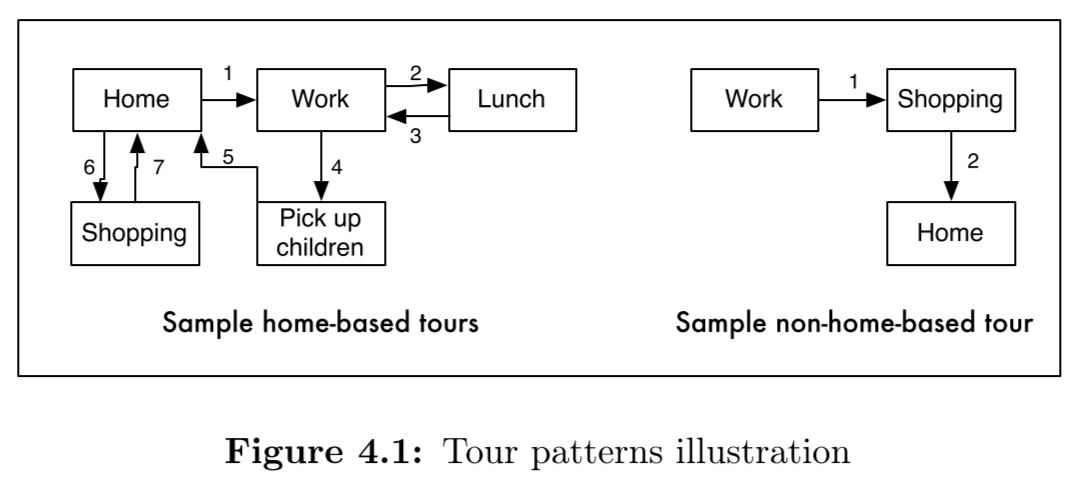

In the left part, the work tour (i.e., the primary activity of the tour is work) (trip 1 to 5) includes an intermediate stop to pick up children and a work-based sub-tour for lunch (trip 2 to 3). The example also includes a simple shopping tour (trip 6 to 7). In the right part, the person starts the day at a non-home location and returns to home at the end of the day. 

In [106]:
#Remove those who did not report trips
#IndHaveTraveldf = IndHaveTraveldf.loc[IndHaveTraveldf['HasTravel']==1]
#IndHaveTraveldf

Assigning a tour ID to a trip is simply done by first identifying the trips that are “begin trip of the day”, “end trip of the day”, “begin trip of the tour”, “end trip of a tour” and “non begin/end trip of a tour”.

In [107]:
#Sort data by Session ID and TripNr
IndHaveTraveldf= Temptrips6.sort_values(by=['SessionId', 'TripNr']).reset_index(drop=True)

#Identify the trips that are the first (1) or last(2) of the day
for i, row in IndHaveTraveldf.iterrows():
    if i == len(IndHaveTraveldf)-1: #only valid for the last row
        #if the trip number of the last row is 1, then it is the first and last trip of the day
        if IndHaveTraveldf.loc[i,'TripNr'] == 1:
            IndHaveTraveldf.loc[i,'BeginTripDay'] = 1
            IndHaveTraveldf.loc[i,'EndTripDay'] = 1
        #else, it is the last trip of the day
        else:
            IndHaveTraveldf.loc[i,'BeginTripDay'] = 0
            IndHaveTraveldf.loc[i,'EndTripDay'] = 1              
    else: #valid for any other observation (i.e., except the last one)
        #if the session ID of the row is different from the session ID of the next row
        if IndHaveTraveldf.loc[i,'SessionId'] != IndHaveTraveldf.loc[i+1,'SessionId']:
            IndHaveTraveldf.loc[i,'EndTripDay'] = 1
        elif IndHaveTraveldf.loc[i,'TripNr'] == 1:
            IndHaveTraveldf.loc[i,'BeginTripDay'] = 1
        else:
            IndHaveTraveldf.loc[i,'BeginTripDay'] = 0
            IndHaveTraveldf.loc[i,'EndTripDay'] = 0

#Fill na values for "BeginTripDay" and "EndTripDay" with zero
IndHaveTraveldf['BeginTripDay']=IndHaveTraveldf['BeginTripDay'].fillna(0)
IndHaveTraveldf['EndTripDay']=IndHaveTraveldf['EndTripDay'].fillna(0)

In [108]:
#Identify the trips that are the beginning or the end of a tour
for i, row in IndHaveTraveldf.iterrows():
    if ((IndHaveTraveldf.loc[i,'OrigPurp'] == 1)&(IndHaveTraveldf.loc[i,'DestPurp'] == 1)):
        if ((IndHaveTraveldf.loc[i,'SessionId'] == IndHaveTraveldf.loc[i-1,'SessionId'])&(IndHaveTraveldf.loc[i-1,'DestPurp'] == 1)): #If it is the first travel of a tour
            IndHaveTraveldf.loc[i,'BeginTour'] = 1
        elif ((IndHaveTraveldf.loc[i,'SessionId'] != IndHaveTraveldf.loc[i-1,'SessionId'])): #If it is the first trip of the person 
            IndHaveTraveldf.loc[i,'BeginTour'] = 1
        else:
            IndHaveTraveldf.loc[i,'EndTour'] = 1
    elif IndHaveTraveldf.loc[i,'OrigPurp'] == 1: #if the trip starts at home
        IndHaveTraveldf.loc[i,'BeginTour'] = 1
    elif IndHaveTraveldf.loc[i,'DestPurp'] == 1: #if the trip finishes at home
        IndHaveTraveldf.loc[i,'EndTour'] = 1
    else:
        IndHaveTraveldf.loc[i,'BeginTour'] = 0
        IndHaveTraveldf.loc[i,'EndTour'] = 0

IndHaveTraveldf['BeginTour'] = IndHaveTraveldf['BeginTour'].fillna(0)
IndHaveTraveldf['EndTour'] = IndHaveTraveldf['EndTour'].fillna(0)

## 7. Data check - tours

### 7.1 Identify and exclude incomplete tours based on purpose (do not start and/or end with home purpose)
According to purpose: 
1. Do not start the day at home (Origin of the first trip has no “home purpose”)
2. Do not finishes the day at home (Destination of the last trip has no “home purpose”)
3. Only performs 1 travel in the day (Trip 1 is the last of the day)

In [109]:
for i, row in IndHaveTraveldf.iterrows():
    #if the first trip does not start at home  - considering purpose
    if ((IndHaveTraveldf.loc[i,'BeginTripDay'] == 1) & (IndHaveTraveldf.loc[i,'OrigPurp'] != 1)): #if the first trip of the day does not start at home
        IndHaveTraveldf.loc[i,'IncompleteTour_Purp'] = 1
    #if the last trip does not finish at home - considering purpose
    elif ((IndHaveTraveldf.loc[i,'EndTripDay'] == 1) & (IndHaveTraveldf.loc[i,'DestPurp'] != 1)): #if the trip finishes at home
        IndHaveTraveldf.loc[i,'IncompleteTour_Purp'] = 1
    #If the end of the day trip is the first trip in the day (TripNr = 1)
    elif ((IndHaveTraveldf.loc[i,'EndTripDay'] == 1) & (IndHaveTraveldf.loc[i,'TripNr'] == 1)): #if the last trip of the day is also the first (only 1 trip)
        IndHaveTraveldf.loc[i,'IncompleteTour_Purp'] = 1
    else:
        IndHaveTraveldf.loc[i,'IncompleteTour_Purp'] = 0

TotalFlag = IndHaveTraveldf['IncompleteTour_Purp'].sum()
print (TotalFlag)

1785.0


In [110]:
#Visualizing the incomplete trips related to the incomplete tours
Lookdatadf = IndHaveTraveldf[IndHaveTraveldf['IncompleteTour_Purp']==1].copy()

In [111]:
#Visualizing the incomplete tours (PURPOSE)
Lookdatadf = IndHaveTraveldf.copy()

a=[1]
flagged = Lookdatadf.loc[Lookdatadf.IncompleteTour_Purp.isin(a), 'SessionId']
Lookdatadf=Lookdatadf[Lookdatadf['SessionId'].isin(flagged)]

In [112]:
#Remove those with incomplete tours
a=[1]
#flag those observations that are incomplete according to Session ID (i.e., if an individual - same SessionID - has
#at least 1 incomplete tour, it is flagged)
flagged = IndHaveTraveldf.loc[IndHaveTraveldf['IncompleteTour_Purp'].isin(a), 'SessionId']
#the new database is composed of all observations (according to SessionID) in the old database that are not (~) flagged
IndHaveTraveldf=IndHaveTraveldf[~IndHaveTraveldf['SessionId'].isin(flagged)]

In [113]:
IndHaveTraveldf

,SessionId,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,TripPurpGroup,OrigNTMzone,DestNTMzone,...,Flag3,SameOandD,Flag5,Flag6,NoInfoOriOrDestPurp,BeginTripDay,EndTripDay,BeginTour,EndTour,IncompleteTour_Purp
0,357024,2147171.0,1.0,1.0,46.0,0.0,46.0,40.0,849212.0,849215.0,...,0.0,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0
1,357024,2147173.0,2.0,46.0,1.0,0.0,46.0,40.0,849215.0,849212.0,...,0.0,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0
2,357024,2147174.0,3.0,1.0,43.0,0.0,43.0,40.0,849212.0,849213.0,...,0.0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0
3,357024,2147175.0,4.0,43.0,1.0,0.0,43.0,40.0,849213.0,849212.0,...,0.0,0,1,0,0.0,0.0,1.0,0.0,1.0,0.0
4,357025,2147177.0,1.0,1.0,11.0,0.0,11.0,11.0,573135.0,561345.0,...,0.0,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62923,466519,2542626.0,3.0,47.0,41.0,0.0,47.0,40.0,615163.0,615151.0,...,0.0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
62924,466519,2542627.0,4.0,41.0,1.0,0.0,41.0,40.0,615151.0,615221.0,...,0.0,0,1,0,0.0,0.0,1.0,0.0,1.0,0.0
62925,466567,2542736.0,1.0,1.0,45.0,0.0,45.0,40.0,400312.0,400213.0,...,0.0,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0
62926,466567,2542737.0,2.0,45.0,31.0,0.0,31.0,30.0,400213.0,400314.0,...,0.0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
#Number of individuals remaining in the sample
IndHaveTraveldf.SessionId.nunique()

16507

In [115]:
#Assign Tour flag
#1: begin trip of the day
#2: end trip of the day
#3: begin trip of the tour
#4: end trip of a tour
#0: not the beginning nor the end trip of a tour

IndHaveTraveldf2=IndHaveTraveldf.copy()

for i, row in IndHaveTraveldf2.iterrows():
    if IndHaveTraveldf2.loc[i,'BeginTripDay'] == 1: #If it is the first trip of the day
        IndHaveTraveldf2.loc[i,'TourFlag'] = 1
    elif IndHaveTraveldf2.loc[i,'EndTripDay'] == 1: #If it is the last trip of the day
        IndHaveTraveldf2.loc[i,'TourFlag'] = 2
    elif IndHaveTraveldf2.loc[i,'BeginTour'] == 1:
        IndHaveTraveldf2.loc[i,'TourFlag'] = 3
    elif IndHaveTraveldf2.loc[i,'EndTour'] == 1:
        IndHaveTraveldf2.loc[i,'TourFlag'] = 4
    else:
        IndHaveTraveldf2.loc[i,'TourFlag'] = 0

In [116]:
#Sort data by Session ID and TripNr
IndHaveTraveldf3= IndHaveTraveldf2.sort_values(by=['SessionId', 'TripNr']).reset_index(drop=True)

To assign Tour ID to each trip, we start numbering the first Trip of the day as Tour ID #1 and repeat this number unless the tour flag is equal 3 (begin trip of the tour).

In [117]:
#Assign TourID
for i, row in IndHaveTraveldf3.iterrows():
    if IndHaveTraveldf3.loc[i,'TourFlag'] == 1: #if it is the first trip of the day and starts at home
        IndHaveTraveldf3.loc[i,'TourID'] = 1 #assign 1 to the tour number
    elif IndHaveTraveldf3.loc[i,'TourFlag'] == 3:
        IndHaveTraveldf3.loc[i,'TourID'] = IndHaveTraveldf3.loc[i-1,'TourID'] + 1
    else: #if it is not a begin of a new tour
        IndHaveTraveldf3.loc[i,'TourID'] = IndHaveTraveldf3.loc[i-1,'TourID'] #assign the same tour number as the last row

In [118]:
#look=IndHaveTraveldf3[IndHaveTraveldf3['SessionId']==417178]
#look=look[['SessionId','TourID','TripNr','OrigPurp','DestPurp','Origin_OTM_NTM','Dest_OTM_NTM']]
#look


### 7.2 Check if a tour only has 1 trip associated (incomplete)

In [119]:
#For the same sessionID, compare OrigNTMzone of the BeginTripDay and DestNTMzone of the EndTripDay
CheckODdf = IndHaveTraveldf3.copy()

#Identify and remove incomplete tours
for i, row in CheckODdf.iterrows():
    if ((i != len(CheckODdf)-1)&(i >0)):
        #if the first trip of the tour is also the last trip of a tour (first trip of the day)
        if ((CheckODdf.loc[i+1,'TourID'] != CheckODdf.loc[i,'TourID']) & (CheckODdf.loc[i,'TripNr'] == 1)):
            CheckODdf.loc[i,'IncompleteTour_trips'] = 1
        #If the first trip of the tour is also the last trip of a tour
        elif (CheckODdf.loc[i-1,'TourID'] != CheckODdf.loc[i,'TourID']):
            if (CheckODdf.loc[i+1,'TourID'] != CheckODdf.loc[i,'TourID']):
                CheckODdf.loc[i,'IncompleteTour_trips'] = 1
            else:
                CheckODdf.loc[i,'IncompleteTour_trips'] = 0
        else:
            CheckODdf.loc[i,'IncompleteTour_trips'] = 0
    else:
        CheckODdf.loc[i,'IncompleteTour_trips'] = 0

TotalFlag = CheckODdf['IncompleteTour_trips'].sum()
print (TotalFlag)

19.0


In [120]:
#print(IndHaveTraveldf3.columns.tolist())

In [121]:
#Visualizing the incomplete tours (ZONES)
Lookdatadf = CheckODdf.copy()

a=[1]
flagged = Lookdatadf.loc[Lookdatadf.IncompleteTour_trips.isin(a), 'SessionId']
Lookdatadf=Lookdatadf[Lookdatadf['SessionId'].isin(flagged)]
Lookdatadf=Lookdatadf[['SessionId','TourID','TripNr','IncompleteTour_trips','OrigPurp','DestPurp','Origin_OTM_NTM','Dest_OTM_NTM']]
Lookdatadf

,SessionId,TourID,TripNr,IncompleteTour_trips,OrigPurp,DestPurp,Origin_OTM_NTM,Dest_OTM_NTM
3042,358809,1.0,1.0,1.0,1.0,1.0,1267.0,851771.0
3043,358809,2.0,2.0,0.0,1.0,42.0,851771.0,851721.0
3044,358809,2.0,3.0,0.0,42.0,1.0,851721.0,851771.0
6861,401129,1.0,1.0,1.0,1.0,1.0,480015.0,480012.0
6862,401129,2.0,2.0,0.0,1.0,12.0,480012.0,480014.0
...,...,...,...,...,...,...,...,...
54436,433502,3.0,4.0,0.0,1.0,23.0,2669.0,2692.0
54437,433502,3.0,5.0,0.0,23.0,42.0,2692.0,2658.0
54438,433502,3.0,6.0,0.0,42.0,1.0,2658.0,2669.0
54439,433502,4.0,7.0,0.0,1.0,23.0,2669.0,2692.0


In [122]:
#Remove those with incomplete tours
a=[1]
#flag those observations that are incomplete according to Session ID (i.e., if an individual - same SessionID - has
#at least 1 incomplete tour, it is flagged)
flagged = CheckODdf.loc[CheckODdf['IncompleteTour_trips'].isin(a), 'SessionId']
#the new database is composed of all observations (according to SessionID) in the old database that are not (~) flagged
CheckODdf1=CheckODdf[~CheckODdf['SessionId'].isin(flagged)]
CheckODdf1

,SessionId,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,TripPurpGroup,OrigNTMzone,DestNTMzone,...,Flag6,NoInfoOriOrDestPurp,BeginTripDay,EndTripDay,BeginTour,EndTour,IncompleteTour_Purp,TourFlag,TourID,IncompleteTour_trips
0,357024,2147171.0,1.0,1.0,46.0,0.0,46.0,40.0,849212.0,849215.0,...,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,357024,2147173.0,2.0,46.0,1.0,0.0,46.0,40.0,849215.0,849212.0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,0.0
2,357024,2147174.0,3.0,1.0,43.0,0.0,43.0,40.0,849212.0,849213.0,...,1,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0
3,357024,2147175.0,4.0,43.0,1.0,0.0,43.0,40.0,849213.0,849212.0,...,0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0
4,357025,2147177.0,1.0,1.0,11.0,0.0,11.0,11.0,573135.0,561345.0,...,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58639,466519,2542626.0,3.0,47.0,41.0,0.0,47.0,40.0,615163.0,615151.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
58640,466519,2542627.0,4.0,41.0,1.0,0.0,41.0,40.0,615151.0,615221.0,...,0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0
58641,466567,2542736.0,1.0,1.0,45.0,0.0,45.0,40.0,400312.0,400213.0,...,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
58642,466567,2542737.0,2.0,45.0,31.0,0.0,31.0,30.0,400213.0,400314.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 7.3 Check if the first trip starts in the same location as the end of the last trip (zones) - incomplete tour

In [123]:
#Get the location only for the origin and destination
CheckODdf1['OriginFirstTrip'] = CheckODdf1['Origin_OTM_NTM']*CheckODdf1['BeginTripDay']
CheckODdf1['DestLastTrip'] = CheckODdf1['Dest_OTM_NTM']*CheckODdf1['EndTripDay']

#Group according to SessionId and sum columns, so we get the origin of the first trip and the destination of the last trip of the same individual in the same line for easier comparison
CheckODdf2 = CheckODdf1.groupby(by=['SessionId']).sum().reset_index()
CheckODdf2

#Check whether there are individuals with origin of the first trip of the day different from the destination of the last trip of the day
for i, row in CheckODdf2.iterrows():
    if (CheckODdf2.loc[i,'OriginFirstTrip'] != CheckODdf2.loc[i,'DestLastTrip']):
        CheckODdf2.loc[i,'NotClosedDay'] = 1 
    else: 
        CheckODdf2.loc[i,'NotClosedDay'] = 0

TotalFlag = CheckODdf2['NotClosedDay'].sum()
print (TotalFlag)

/tmp/ipykernel_1816975/3144300573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CheckODdf1['OriginFirstTrip'] = CheckODdf1['Origin_OTM_NTM']*CheckODdf1['BeginTripDay']
/tmp/ipykernel_1816975/3144300573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CheckODdf1['DestLastTrip'] = CheckODdf1['Dest_OTM_NTM']*CheckODdf1['EndTripDay']


32.0


In [124]:
#get only relevant columns
CheckODdf2=CheckODdf2[['SessionId', 'NotClosedDay']]

#Merge to get all trips of all individuals
CheckODdf2=CheckODdf2.merge(IndHaveTraveldf3, on='SessionId', how='left').fillna(0)

In [125]:
#Visualizing the incomplete tours (ZONES)
Lookdatadf = CheckODdf2.copy()

a=[1]
flagged = Lookdatadf.loc[Lookdatadf.NotClosedDay.isin(a), 'SessionId']
Lookdatadf=Lookdatadf[Lookdatadf['SessionId'].isin(flagged)]
Lookdatadf=Lookdatadf[['SessionId','TourID','TripNr','NotClosedDay','OrigPurp','DestPurp','Origin_OTM_NTM','Dest_OTM_NTM']]
Lookdatadf

,SessionId,TourID,TripNr,NotClosedDay,OrigPurp,DestPurp,Origin_OTM_NTM,Dest_OTM_NTM
2569,358475,1.0,1.0,1.0,1.0,31.0,2226.0,102151.0
2570,358475,1.0,2.0,1.0,31.0,1.0,102151.0,361.0
2571,358475,2.0,3.0,1.0,1.0,47.0,361.0,1608.0
2572,358475,2.0,4.0,1.0,47.0,31.0,1608.0,1652.0
2573,358475,2.0,5.0,1.0,31.0,1.0,1652.0,361.0
...,...,...,...,...,...,...,...,...
54598,433611,1.0,2.0,1.0,49.0,1.0,630246.0,630215.0
56416,434689,1.0,1.0,1.0,1.0,12.0,1392.0,1829.0
56417,434689,1.0,2.0,1.0,12.0,31.0,1829.0,1829.0
56418,434689,1.0,3.0,1.0,31.0,23.0,1829.0,1823.0


In [126]:
#Remove those with incomplete tours
a=[0]
#flag those observations that are incomplete
flagged = CheckODdf2.loc[~CheckODdf2['NotClosedDay'].isin(a), 'SessionId'] 
#Remove those individuals with Activity schedule that does not start and end at the same location
CheckODdf3=CheckODdf2[~CheckODdf2['SessionId'].isin(flagged)]
CheckODdf3

,SessionId,NotClosedDay,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,TripPurpGroup,OrigNTMzone,...,Flag5,Flag6,NoInfoOriOrDestPurp,BeginTripDay,EndTripDay,BeginTour,EndTour,IncompleteTour_Purp,TourFlag,TourID
0,357024,0.0,2147171.0,1.0,1.0,46.0,0.0,46.0,40.0,849212.0,...,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,357024,0.0,2147173.0,2.0,46.0,1.0,0.0,46.0,40.0,849215.0,...,1,0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0
2,357024,0.0,2147174.0,3.0,1.0,43.0,0.0,43.0,40.0,849212.0,...,0,1,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0
3,357024,0.0,2147175.0,4.0,43.0,1.0,0.0,43.0,40.0,849213.0,...,1,0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0
4,357025,0.0,2147177.0,1.0,1.0,11.0,0.0,11.0,11.0,573135.0,...,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58557,466519,0.0,2542626.0,3.0,47.0,41.0,0.0,47.0,40.0,615163.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58558,466519,0.0,2542627.0,4.0,41.0,1.0,0.0,41.0,40.0,615151.0,...,1,0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0
58559,466567,0.0,2542736.0,1.0,1.0,45.0,0.0,45.0,40.0,400312.0,...,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
58560,466567,0.0,2542737.0,2.0,45.0,31.0,0.0,31.0,30.0,400213.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 7.4 Check if start and end of the tour are at the same location (zones)

For the same sessionID, compare OrigNTMzone of the BeginTour and DestNTMzone of the EndTour per tour

In [127]:
#Get the location only for the origin and destination
CheckODdf3['OriginBeginTour'] = CheckODdf3['Origin_OTM_NTM']*CheckODdf3['BeginTour']
CheckODdf3['DestEndTour'] = CheckODdf3['Dest_OTM_NTM']*CheckODdf3['EndTour']

#Group according to SessionId and TourID and sum columns
CheckODdf4 = CheckODdf3.groupby(by=['SessionId','TourID']).sum().reset_index()
CheckODdf4

#Check whether there are individuals with origin trip of the first trip in the day different from the destination of the last trip in the day
for i, row in CheckODdf4.iterrows():
    if ((CheckODdf4.loc[i,'OriginBeginTour'] != CheckODdf4.loc[i,'DestEndTour'])):
        CheckODdf4.loc[i,'IncompleteTour_Zones'] = 1 
    else: 
        CheckODdf4.loc[i,'IncompleteTour_Zones'] = 0

TotalFlag = CheckODdf4['IncompleteTour_Zones'].sum()
print (TotalFlag)

/tmp/ipykernel_1816975/947948728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CheckODdf3['OriginBeginTour'] = CheckODdf3['Origin_OTM_NTM']*CheckODdf3['BeginTour']
/tmp/ipykernel_1816975/947948728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CheckODdf3['DestEndTour'] = CheckODdf3['Dest_OTM_NTM']*CheckODdf3['EndTour']


43.0


In [128]:
#Visualize what is being marked as incomplete tours
#get only relevant columns
CheckODdf4=CheckODdf4[['SessionId','TourID','IncompleteTour_Zones']]

#Merge to get all trips of all individuals
CheckODdf5=CheckODdf4.merge(IndHaveTraveldf3, on=['SessionId','TourID'], how='left').fillna(0)

a=[0]
flagged = CheckODdf5.loc[CheckODdf5.IncompleteTour_Zones.isin(a), 'SessionId']
CheckODdf5=CheckODdf5[CheckODdf5['SessionId'].isin(flagged)]
#CheckODdf5=CheckODdf5[['SessionId','TourID','TripNr','IncompleteTour_Zones','OrigPurp','DestPurp','Origin_OTM_NTM','Dest_OTM_NTM']]
CheckODdf5=CheckODdf5.reset_index()

In [129]:
#Replace values of variables indicating the beginning and ending of each tour
for i, row in CheckODdf5.iterrows():
    if (i==0): #First line
        CheckODdf5.loc[i,'BeginTour']=1
        CheckODdf5.loc[i,'EndTour']=0 
    elif (i == len(CheckODdf5)-1): #Last line
        CheckODdf5.loc[i,'BeginTour']=0
        CheckODdf5.loc[i,'EndTour']=1
    elif (CheckODdf5.loc[i,'SessionId'] != CheckODdf5.loc[i-1,'SessionId']):
        CheckODdf5.loc[i,'BeginTour']=1
        CheckODdf5.loc[i,'EndTour']=0        
    elif (CheckODdf5.loc[i,'TourID'] != CheckODdf5.loc[i-1,'TourID']):
        CheckODdf5.loc[i,'BeginTour']=1
        CheckODdf5.loc[i,'EndTour']=0
    elif (CheckODdf5.loc[i,'TourID'] != CheckODdf5.loc[i+1,'TourID']):
        CheckODdf5.loc[i,'BeginTour']=0
        CheckODdf5.loc[i,'EndTour']=1
    elif (CheckODdf5.loc[i,'SessionId'] != CheckODdf5.loc[i+1,'SessionId']):
        CheckODdf5.loc[i,'BeginTour']=0
        CheckODdf5.loc[i,'EndTour']=1
    else:
        CheckODdf5.loc[i,'BeginTour']=0
        CheckODdf5.loc[i,'EndTour']=0

In [130]:
CheckODdf5

,level_0,SessionId,TourID,IncompleteTour_Zones,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,SameOandD,Flag5,Flag6,NoInfoOriOrDestPurp,BeginTripDay,EndTripDay,BeginTour,EndTour,IncompleteTour_Purp,TourFlag
0,0,357024,1.0,0.0,2147171.0,1.0,1.0,46.0,0.0,46.0,...,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,357024,1.0,0.0,2147173.0,2.0,46.0,1.0,0.0,46.0,...,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
2,2,357024,2.0,0.0,2147174.0,3.0,1.0,43.0,0.0,43.0,...,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,3.0
3,3,357024,2.0,0.0,2147175.0,4.0,43.0,1.0,0.0,43.0,...,0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
4,4,357025,1.0,0.0,2147177.0,1.0,1.0,11.0,0.0,11.0,...,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58360,58430,466519,1.0,0.0,2542626.0,3.0,47.0,41.0,0.0,47.0,...,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58361,58431,466519,1.0,0.0,2542627.0,4.0,41.0,1.0,0.0,41.0,...,0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
58362,58432,466567,1.0,0.0,2542736.0,1.0,1.0,45.0,0.0,45.0,...,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
58363,58433,466567,1.0,0.0,2542737.0,2.0,45.0,31.0,0.0,31.0,...,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
#Number of individuals remaining in the sample
CheckODdf5.SessionId.nunique()

16439

In [132]:
#Number of tours remaining  in the sample
ntours=CheckODdf5[['BeginTour','EndTour']]
ntours.sum()

BeginTour    24520.0
EndTour      24520.0
dtype: float64

In [133]:
CheckODdf5

,level_0,SessionId,TourID,IncompleteTour_Zones,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,SameOandD,Flag5,Flag6,NoInfoOriOrDestPurp,BeginTripDay,EndTripDay,BeginTour,EndTour,IncompleteTour_Purp,TourFlag
0,0,357024,1.0,0.0,2147171.0,1.0,1.0,46.0,0.0,46.0,...,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,357024,1.0,0.0,2147173.0,2.0,46.0,1.0,0.0,46.0,...,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
2,2,357024,2.0,0.0,2147174.0,3.0,1.0,43.0,0.0,43.0,...,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,3.0
3,3,357024,2.0,0.0,2147175.0,4.0,43.0,1.0,0.0,43.0,...,0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
4,4,357025,1.0,0.0,2147177.0,1.0,1.0,11.0,0.0,11.0,...,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58360,58430,466519,1.0,0.0,2542626.0,3.0,47.0,41.0,0.0,47.0,...,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58361,58431,466519,1.0,0.0,2542627.0,4.0,41.0,1.0,0.0,41.0,...,0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
58362,58432,466567,1.0,0.0,2542736.0,1.0,1.0,45.0,0.0,45.0,...,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
58363,58433,466567,1.0,0.0,2542737.0,2.0,45.0,31.0,0.0,31.0,...,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
#CheckODdf5.to_csv('IndHaveTraveldf3.csv',index=False)

In [135]:
#Get valid IDs, Trip Tous
#ValidSessionIDs=CheckODdf5[['SessionId']]

### 7.5 Identify and remove commercial tours (Purposes 61, 62 and 64)

In [136]:
#Reset index to be able to iterate over rows
IndHaveTraveldf3=CheckODdf5.copy().reset_index(drop=True)

In [137]:
#Identify commercial tours

#61 --> Commercial transport of goods, postman, paper boy
#62 --> Commercial transport of persons
#64 --> Other commercial traffic (police, road work, etc.)

#Check whether there are individuals with origin trip of the first trip in the day different from the destination of the last trip in the day
for i, row in IndHaveTraveldf3.iterrows():
    if ((IndHaveTraveldf3.loc[i,'DestPurp'] == 61)|(IndHaveTraveldf3.loc[i,'DestPurp'] == 62)|(IndHaveTraveldf3.loc[i,'DestPurp'] == 64)):
        IndHaveTraveldf3.loc[i,'Commecial_tour'] = 1 
    else: 
        IndHaveTraveldf3.loc[i,'Commecial_tour'] = 0

TotalFlag = IndHaveTraveldf3['Commecial_tour'].sum()
print (TotalFlag)

53.0


In [138]:
#Remove commercial tours
#Create a dataset with information on commercial tours
ComercialToursdf=IndHaveTraveldf3[['SessionId','TourID','Commecial_tour']]
ComercialToursdf=ComercialToursdf.groupby(by=['SessionId','TourID']).sum()
ComercialToursdf

#Merge dataset created with dataset containing all the information about the tours
IndHaveTraveldf3=IndHaveTraveldf3.drop(columns=['Commecial_tour'])
mergeddf=IndHaveTraveldf3.merge(ComercialToursdf, on=['SessionId', 'TourID'], how='left').fillna(0)
mergeddf['Commecial_tour']=mergeddf['Commecial_tour'].apply(lambda x: 1 if x >0 else 0)
mergeddf['Commecial_tour'].sum()

IndHaveTraveldf3=mergeddf[mergeddf['Commecial_tour']==0]
IndHaveTraveldf3.reset_index(drop=True)

,level_0,SessionId,TourID,IncompleteTour_Zones,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,Flag5,Flag6,NoInfoOriOrDestPurp,BeginTripDay,EndTripDay,BeginTour,EndTour,IncompleteTour_Purp,TourFlag,Commecial_tour
0,0,357024,1.0,0.0,2147171.0,1.0,1.0,46.0,0.0,46.0,...,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
1,1,357024,1.0,0.0,2147173.0,2.0,46.0,1.0,0.0,46.0,...,1,0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0
2,2,357024,2.0,0.0,2147174.0,3.0,1.0,43.0,0.0,43.0,...,0,1,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0
3,3,357024,2.0,0.0,2147175.0,4.0,43.0,1.0,0.0,43.0,...,1,0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0
4,4,357025,1.0,0.0,2147177.0,1.0,1.0,11.0,0.0,11.0,...,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58253,58430,466519,1.0,0.0,2542626.0,3.0,47.0,41.0,0.0,47.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
58254,58431,466519,1.0,0.0,2542627.0,4.0,41.0,1.0,0.0,41.0,...,1,0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0
58255,58432,466567,1.0,0.0,2542736.0,1.0,1.0,45.0,0.0,45.0,...,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
58256,58433,466567,1.0,0.0,2542737.0,2.0,45.0,31.0,0.0,31.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### 7.6 Identify and remove educational tours without a fixed location (Purpose 39)
We decided to not include these tours because differently from work, we do not estimate mode-destination models for educational tours that have an unsual location as the destination

In [139]:
#Identify tours without a fixed location
#39: Education that does not take place at the school/education institution, e.g. school trips, excursions, study trips 
#(include those learning to drive, any excursions in a educational setting)

for i, row in IndHaveTraveldf3.iterrows():
    if (IndHaveTraveldf3.loc[i,'DestPurp'] == 39):
        IndHaveTraveldf3.loc[i,'EduOut_tour'] = 1 
    else: 
        IndHaveTraveldf3.loc[i,'EduOut_tour'] = 0

TotalFlag = IndHaveTraveldf3['EduOut_tour'].sum()
print (TotalFlag)

#Number of people
ppEduOutTourdf=IndHaveTraveldf3[IndHaveTraveldf3['EduOut_tour']==1]
ppEduOutTourdf['SessionId'].nunique()

/tmp/ipykernel_1816975/1353560081.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IndHaveTraveldf3.loc[i,'EduOut_tour'] = 0


100.0


91

In [140]:
#Remove educational tours without a fixed location
#Create a dataset with information on commercial tours
ppEduOutTourdf=IndHaveTraveldf3[['SessionId','TourID','EduOut_tour']]
ppEduOutTourdf=ppEduOutTourdf.groupby(by=['SessionId','TourID']).sum()
ppEduOutTourdf

#Merge dataset created with dataset containing all the information about the tours
IndHaveTraveldf3=IndHaveTraveldf3.drop(columns=['EduOut_tour'])
mergeddf=IndHaveTraveldf3.merge(ppEduOutTourdf, on=['SessionId', 'TourID'], how='left').fillna(0)
mergeddf['EduOut_tour']=mergeddf['EduOut_tour'].apply(lambda x: 1 if x >0 else 0)
mergeddf['EduOut_tour'].sum()

IndHaveTraveldf3=mergeddf[mergeddf['EduOut_tour']==0]
IndHaveTraveldf3=IndHaveTraveldf3.reset_index(drop=True)

In [141]:
IndHaveTraveldf3

,level_0,SessionId,TourID,IncompleteTour_Zones,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,Flag6,NoInfoOriOrDestPurp,BeginTripDay,EndTripDay,BeginTour,EndTour,IncompleteTour_Purp,TourFlag,Commecial_tour,EduOut_tour
0,0,357024,1.0,0.0,2147171.0,1.0,1.0,46.0,0.0,46.0,...,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0
1,1,357024,1.0,0.0,2147173.0,2.0,46.0,1.0,0.0,46.0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0,0
2,2,357024,2.0,0.0,2147174.0,3.0,1.0,43.0,0.0,43.0,...,1,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0,0
3,3,357024,2.0,0.0,2147175.0,4.0,43.0,1.0,0.0,43.0,...,0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0,0
4,4,357025,1.0,0.0,2147177.0,1.0,1.0,11.0,0.0,11.0,...,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57946,58430,466519,1.0,0.0,2542626.0,3.0,47.0,41.0,0.0,47.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
57947,58431,466519,1.0,0.0,2542627.0,4.0,41.0,1.0,0.0,41.0,...,0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0,0
57948,58432,466567,1.0,0.0,2542736.0,1.0,1.0,45.0,0.0,45.0,...,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0
57949,58433,466567,1.0,0.0,2542737.0,2.0,45.0,31.0,0.0,31.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


### 7.7 Identify and flag tours that have activities lasting "zero minutes"
i.e., the case when the travel itself is the activity, including, for example, the dog or running for sport (usually leisure round trips)

In [142]:
for i, row in IndHaveTraveldf3.iterrows():
    if (i == len(IndHaveTraveldf3)-1): #if it is the last row
        IndHaveTraveldf3.loc[i,'Act_ZeroMinute'] = 0
    elif IndHaveTraveldf3.loc[i,'TourID'] != IndHaveTraveldf3.loc[i+1,'TourID']: #if it is the last trip of the tour
        IndHaveTraveldf3.loc[i,'Act_ZeroMinute'] = 0
    elif IndHaveTraveldf3.loc[i,'SessionId'] != IndHaveTraveldf3.loc[i+1,'SessionId']: #if it is the last trip of the tour
        IndHaveTraveldf3.loc[i,'Act_ZeroMinute'] = 0
    elif (IndHaveTraveldf3.loc[i,'DurationAct(min)'] == 0):    
        IndHaveTraveldf3.loc[i,'Act_ZeroMinute'] = 1
    else:
        IndHaveTraveldf3.loc[i,'Act_ZeroMinute'] = 0

In [143]:
#IndHaveTraveldf3.to_csv('CheckActiZero.csv')

### 7.8 Identify non-home-based tours - Check if the purpose at the start and end of the tour are home

In [144]:
#Convert Origin and purpose categories into 6 main categories

#Categories
#0--> Home
#1--> Work
#2--> Education
#3--> Personal activities
#4--> Shopping
#5--> Leisure
#6--> Escort

#TU variable - OrigPurp (need to consider the origin as well, in order to be able to classify the trips that end at home)
#TU variable - DestPurp
#IndHaveTraveldf3['PurpOrig_cat']=IndHaveTraveldf3['OrigPurp'].replace({1:0,11:1,12:2,13:5,14:2,20:3,21:6,22:6,23:3,25:5,31:4,32:3,33:3,38:3,39:2,41:5,42:5,43:5,44:5,45:5,46:5,47:5,49:5,50:1,51:1,52:1,53:1,54:1,61:1,62:1,64:1})
#IndHaveTraveldf3['PurpDest_cat']=IndHaveTraveldf3['DestPurp'].replace({1:0,11:1,12:2,13:5,14:2,20:3,21:6,22:6,23:3,25:5,31:4,32:3,33:3,38:3,39:2,41:5,42:5,43:5,44:5,45:5,46:5,47:5,49:5,50:1,51:1,52:1,53:1,54:1,61:1,62:1,64:1})
#IndHaveTraveldf3

In [145]:
#If we would like to adopt 7 main categories, instead of 6
#Differentiates work from business, as it is easier to give priority to the main work location and then afterwards change business to work purpose

#Categories
#0--> Home
#1--> Work
#2--> Business
#3--> Education
#4--> Personal activities
#5--> Shopping
#6--> Leisure
#7--> Escort


#TU variable - OrigPurp (need to consider the origin as well, in order to be able to classify the trips that end at home)
#TU variable - DestPurp
IndHaveTraveldf3['PurpOrig_cat']=IndHaveTraveldf3['OrigPurp'].replace({1:0,11:1,12:3,13:6,14:3,20:4,21:7,22:7,23:4,25:6,31:5,32:4,33:4,38:4,39:3,41:6,42:6,43:6,44:6,45:6,46:6,47:6,49:6,50:2,51:2,52:2,53:2,54:2,61:2,62:2,64:2})
IndHaveTraveldf3['PurpDest_cat']=IndHaveTraveldf3['DestPurp'].replace({1:0,11:1,12:3,13:6,14:3,20:4,21:7,22:7,23:4,25:6,31:5,32:4,33:4,38:4,39:3,41:6,42:6,43:6,44:6,45:6,46:6,47:6,49:6,50:2,51:2,52:2,53:2,54:2,61:2,62:2,64:2})
IndHaveTraveldf3

,level_0,SessionId,TourID,IncompleteTour_Zones,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,EndTripDay,BeginTour,EndTour,IncompleteTour_Purp,TourFlag,Commecial_tour,EduOut_tour,Act_ZeroMinute,PurpOrig_cat,PurpDest_cat
0,0,357024,1.0,0.0,2147171.0,1.0,1.0,46.0,0.0,46.0,...,0.0,1.0,0.0,0.0,1.0,0,0,1.0,0.0,6.0
1,1,357024,1.0,0.0,2147173.0,2.0,46.0,1.0,0.0,46.0,...,0.0,0.0,1.0,0.0,4.0,0,0,0.0,6.0,0.0
2,2,357024,2.0,0.0,2147174.0,3.0,1.0,43.0,0.0,43.0,...,0.0,1.0,0.0,0.0,3.0,0,0,0.0,0.0,6.0
3,3,357024,2.0,0.0,2147175.0,4.0,43.0,1.0,0.0,43.0,...,1.0,0.0,1.0,0.0,2.0,0,0,0.0,6.0,0.0
4,4,357025,1.0,0.0,2147177.0,1.0,1.0,11.0,0.0,11.0,...,0.0,1.0,0.0,0.0,1.0,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57946,58430,466519,1.0,0.0,2542626.0,3.0,47.0,41.0,0.0,47.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,6.0,6.0
57947,58431,466519,1.0,0.0,2542627.0,4.0,41.0,1.0,0.0,41.0,...,1.0,0.0,1.0,0.0,2.0,0,0,0.0,6.0,0.0
57948,58432,466567,1.0,0.0,2542736.0,1.0,1.0,45.0,0.0,45.0,...,0.0,1.0,0.0,0.0,1.0,0,0,1.0,0.0,6.0
57949,58433,466567,1.0,0.0,2542737.0,2.0,45.0,31.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,6.0,5.0


In [146]:
#Identify home-home trips
for i, row in IndHaveTraveldf3.iterrows():
    if ((IndHaveTraveldf3.loc[i,'DestPurp']==1)&(IndHaveTraveldf3.loc[i,'OrigPurp']==1)):
        IndHaveTraveldf3.loc[i,'Trip_HomeHome']=1
    else:
        IndHaveTraveldf3.loc[i,'Trip_HomeHome']=0

In [147]:
#if the activity starts and ends at home, change the purpose destination to "personal activities" and create a dummy for home-home
#(some of these start and end at different NTMzones, although are home-home) 
for i, row in IndHaveTraveldf3.iterrows():
    if ((IndHaveTraveldf3.loc[i,'PurpDest_cat']==0)&(IndHaveTraveldf3.loc[i,'PurpOrig_cat']==0)):
        if (IndHaveTraveldf3.loc[i,'SessionId']!=IndHaveTraveldf3.loc[i+1,'SessionId']): #if it is a home-home trip and it is the last one of the tour
            IndHaveTraveldf3.loc[i,'PurpOrig_cat']=4
        else:
            IndHaveTraveldf3.loc[i,'PurpDest_cat']=4
    else:
        IndHaveTraveldf3.loc[i,'PurpDest_cat']=IndHaveTraveldf3.loc[i,'PurpDest_cat']
        IndHaveTraveldf3.loc[i,'PurpOrig_cat']=IndHaveTraveldf3.loc[i,'PurpOrig_cat']

In [148]:
IndHaveTraveldf3.SessionId.nunique()

16374

In [149]:
#Number of tours remaining  in the sample
ntours=IndHaveTraveldf3[['BeginTour','EndTour']]
ntours.sum()

BeginTour    24409.0
EndTour      24409.0
dtype: float64

In [150]:
#Identify non-home-based tours
#For the same sessionID, compare Purpose at the BeginTour and Purpose at the EndTour per tour
CheckODdf7 = IndHaveTraveldf3.copy()

#Get the location only for the origin and destination
CheckODdf7['PurpBeginTour'] = CheckODdf7['PurpOrig_cat']*CheckODdf7['BeginTour']
CheckODdf7['PurpEndTour'] = CheckODdf7['PurpDest_cat']*CheckODdf7['EndTour']

#Group according to SessionId and TourID and sum columns
CheckODdf8 = CheckODdf7.groupby(by=['SessionId','TourID']).sum().reset_index()
CheckODdf8

#Check whether there are individuals with origin trip of the first trip in the day different from the destination of the last 
#trip in the day
for i, row in CheckODdf8.iterrows():
    if (((CheckODdf8.loc[i,'BeginTour'] == 1) & (CheckODdf8.loc[i,'PurpBeginTour'] !=0)) | ((CheckODdf8.loc[i,'EndTour'] == 1) & (CheckODdf8.loc[i,'PurpEndTour'] !=0))):
        CheckODdf8.loc[i,'IncompleteTour_Purp'] = 1 
    else: 
        CheckODdf8.loc[i,'IncompleteTour_Purp'] = 0

TotalFlag = CheckODdf8['IncompleteTour_Purp'].sum()
print (TotalFlag)

0.0


### 7.9 Correct TourID and TripNr since we excluded tours instead of people in the case of commercial tours and educational tours without a fixed work location

In [151]:
IndHaveTraveldf3= IndHaveTraveldf3.sort_values(by=['SessionId', 'TourID']).reset_index(drop=True)
IndHaveTraveldf3

,level_0,SessionId,TourID,IncompleteTour_Zones,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,BeginTour,EndTour,IncompleteTour_Purp,TourFlag,Commecial_tour,EduOut_tour,Act_ZeroMinute,PurpOrig_cat,PurpDest_cat,Trip_HomeHome
0,0,357024,1.0,0.0,2147171.0,1.0,1.0,46.0,0.0,46.0,...,1.0,0.0,0.0,1.0,0,0,1.0,0.0,6.0,0.0
1,1,357024,1.0,0.0,2147173.0,2.0,46.0,1.0,0.0,46.0,...,0.0,1.0,0.0,4.0,0,0,0.0,6.0,0.0,0.0
2,2,357024,2.0,0.0,2147174.0,3.0,1.0,43.0,0.0,43.0,...,1.0,0.0,0.0,3.0,0,0,0.0,0.0,6.0,0.0
3,3,357024,2.0,0.0,2147175.0,4.0,43.0,1.0,0.0,43.0,...,0.0,1.0,0.0,2.0,0,0,0.0,6.0,0.0,0.0
4,4,357025,1.0,0.0,2147177.0,1.0,1.0,11.0,0.0,11.0,...,1.0,0.0,0.0,1.0,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57946,58430,466519,1.0,0.0,2542626.0,3.0,47.0,41.0,0.0,47.0,...,0.0,0.0,0.0,0.0,0,0,0.0,6.0,6.0,0.0
57947,58431,466519,1.0,0.0,2542627.0,4.0,41.0,1.0,0.0,41.0,...,0.0,1.0,0.0,2.0,0,0,0.0,6.0,0.0,0.0
57948,58432,466567,1.0,0.0,2542736.0,1.0,1.0,45.0,0.0,45.0,...,1.0,0.0,0.0,1.0,0,0,1.0,0.0,6.0,0.0
57949,58433,466567,1.0,0.0,2542737.0,2.0,45.0,31.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0,0,0.0,6.0,5.0,0.0


In [152]:
#Assign TourID
for i, row in IndHaveTraveldf3.iterrows():
    if (i==0): #if it is the fisrt row
        IndHaveTraveldf3.loc[i,'TourID'] = 1
    elif IndHaveTraveldf3.loc[i,'SessionId'] != IndHaveTraveldf3.loc[i-1,'SessionId']:
        IndHaveTraveldf3.loc[i,'TourID'] = 1
    elif (IndHaveTraveldf3.loc[i-1,'PurpDest_cat'] == 0): #if the last tour ended at home
        IndHaveTraveldf3.loc[i,'TourID'] = (IndHaveTraveldf3.loc[i-1,'TourID'] + 1)
    else: #if it is not a begin of a new tour
        IndHaveTraveldf3.loc[i,'TourID'] = IndHaveTraveldf3.loc[i-1,'TourID'] #assign the same tour number as the last row
IndHaveTraveldf3=IndHaveTraveldf3.drop(['level_0'], axis=1)

In [153]:
#Assign TripNr
for i, row in IndHaveTraveldf3.iterrows():
    if (i==0): #if it is the fisrt row
        IndHaveTraveldf3.loc[i,'TripNr'] = 1
    elif (IndHaveTraveldf3.loc[i,'SessionId'] == IndHaveTraveldf3.loc[i-1,'SessionId']):
        IndHaveTraveldf3.loc[i,'TripNr'] = IndHaveTraveldf3.loc[i-1,'TripNr'] + 1
    elif (IndHaveTraveldf3.loc[i,'SessionId'] != IndHaveTraveldf3.loc[i-1,'SessionId']):
        IndHaveTraveldf3.loc[i,'TripNr'] = 1
    else: 
        IndHaveTraveldf3.loc[i,'TripNr'] = 99999

In [154]:
IndHaveTraveldf3.head(11090)

,SessionId,TourID,IncompleteTour_Zones,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,TripPurpGroup,...,BeginTour,EndTour,IncompleteTour_Purp,TourFlag,Commecial_tour,EduOut_tour,Act_ZeroMinute,PurpOrig_cat,PurpDest_cat,Trip_HomeHome
0,357024,1.0,0.0,2147171.0,1.0,1.0,46.0,0.0,46.0,40.0,...,1.0,0.0,0.0,1.0,0,0,1.0,0.0,6.0,0.0
1,357024,1.0,0.0,2147173.0,2.0,46.0,1.0,0.0,46.0,40.0,...,0.0,1.0,0.0,4.0,0,0,0.0,6.0,0.0,0.0
2,357024,2.0,0.0,2147174.0,3.0,1.0,43.0,0.0,43.0,40.0,...,1.0,0.0,0.0,3.0,0,0,0.0,0.0,6.0,0.0
3,357024,2.0,0.0,2147175.0,4.0,43.0,1.0,0.0,43.0,40.0,...,0.0,1.0,0.0,2.0,0,0,0.0,6.0,0.0,0.0
4,357025,1.0,0.0,2147177.0,1.0,1.0,11.0,0.0,11.0,11.0,...,1.0,0.0,0.0,1.0,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11085,404252,1.0,0.0,2411905.0,1.0,1.0,13.0,0.0,13.0,40.0,...,1.0,0.0,0.0,1.0,0,0,0.0,0.0,6.0,0.0
11086,404252,1.0,0.0,2411906.0,2.0,13.0,1.0,0.0,13.0,40.0,...,0.0,1.0,0.0,2.0,0,0,0.0,6.0,0.0,0.0
11087,404253,1.0,0.0,2411912.0,1.0,1.0,41.0,0.0,41.0,40.0,...,1.0,0.0,0.0,3.0,0,0,0.0,0.0,6.0,0.0
11088,404253,1.0,0.0,2411913.0,2.0,41.0,45.0,0.0,45.0,40.0,...,0.0,0.0,0.0,0.0,0,0,0.0,6.0,6.0,0.0


In [155]:
look=IndHaveTraveldf3[IndHaveTraveldf3['SessionId']==404253]
look

,SessionId,TourID,IncompleteTour_Zones,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,TripPurpGroup,...,BeginTour,EndTour,IncompleteTour_Purp,TourFlag,Commecial_tour,EduOut_tour,Act_ZeroMinute,PurpOrig_cat,PurpDest_cat,Trip_HomeHome
11087,404253,1.0,0.0,2411912.0,1.0,1.0,41.0,0.0,41.0,40.0,...,1.0,0.0,0.0,3.0,0,0,0.0,0.0,6.0,0.0
11088,404253,1.0,0.0,2411913.0,2.0,41.0,45.0,0.0,45.0,40.0,...,0.0,0.0,0.0,0.0,0,0,0.0,6.0,6.0,0.0
11089,404253,1.0,0.0,2411914.0,3.0,45.0,41.0,0.0,41.0,40.0,...,0.0,0.0,0.0,0.0,0,0,0.0,6.0,6.0,0.0
11090,404253,1.0,0.0,2411915.0,4.0,41.0,1.0,0.0,41.0,40.0,...,0.0,1.0,0.0,2.0,0,0,0.0,6.0,0.0,0.0


### 7.10 Check whether there are tours with only 1 trip associated and remove those individuals

After correcting the TourID and TripNr

In [156]:
#For the same sessionID, compare OrigNTMzone of the BeginTripDay and DestNTMzone of the EndTripDay
CheckODdf = IndHaveTraveldf3.copy()

#Identify and remove incomplete tours
for i, row in CheckODdf.iterrows():
    if ((i != len(CheckODdf)-1)&(i >0)):
        #if the first trip of the tour is also the last trip of a tour (first trip of the day)
        if ((CheckODdf.loc[i+1,'TourID'] != CheckODdf.loc[i,'TourID']) & (CheckODdf.loc[i,'TripNr'] == 1)):
            CheckODdf.loc[i,'IncompleteTour_trips'] = 1
        #If the first trip of the tour is also the last trip of a tour
        elif (CheckODdf.loc[i-1,'TourID'] != CheckODdf.loc[i,'TourID']):
            if (CheckODdf.loc[i+1,'TourID'] != CheckODdf.loc[i,'TourID']):
                CheckODdf.loc[i,'IncompleteTour_trips'] = 1
            else:
                CheckODdf.loc[i,'IncompleteTour_trips'] = 0
        else:
            CheckODdf.loc[i,'IncompleteTour_trips'] = 0
    else:
        CheckODdf.loc[i,'IncompleteTour_trips'] = 0

TotalFlag = CheckODdf['IncompleteTour_trips'].sum()
print (TotalFlag)

3.0


In [157]:
#Visualizing the incomplete tours (ZONES)
Lookdatadf = CheckODdf.copy()

a=[1]
flagged = Lookdatadf.loc[Lookdatadf.IncompleteTour_trips.isin(a), 'SessionId']
Lookdatadf=Lookdatadf[Lookdatadf['SessionId'].isin(flagged)]
Lookdatadf=Lookdatadf[['SessionId','TourID','TripNr','IncompleteTour_trips','OrigPurp','DestPurp','Origin_OTM_NTM','Dest_OTM_NTM']]
Lookdatadf

,SessionId,TourID,TripNr,IncompleteTour_trips,OrigPurp,DestPurp,Origin_OTM_NTM,Dest_OTM_NTM
29443,417178,1.0,1.0,0.0,1.0,42.0,3639.0,3651.0
29444,417178,1.0,2.0,0.0,42.0,31.0,3651.0,3656.0
29445,417178,1.0,3.0,0.0,31.0,1.0,3656.0,3639.0
29446,417178,2.0,4.0,0.0,1.0,41.0,3639.0,3642.0
29447,417178,2.0,5.0,0.0,41.0,1.0,3642.0,3639.0
29448,417178,3.0,6.0,0.0,1.0,46.0,3639.0,260080.0
29449,417178,3.0,7.0,0.0,46.0,41.0,260080.0,3642.0
29450,417178,3.0,8.0,0.0,41.0,45.0,3642.0,3642.0
29451,417178,3.0,9.0,0.0,45.0,1.0,3642.0,3642.0
29452,417178,4.0,10.0,1.0,1.0,1.0,3642.0,3639.0


In [158]:
#Remove only the problematic tours, keeping the other tours of the individual
IndHaveTraveldf3=CheckODdf[CheckODdf['IncompleteTour_trips']==0]
IndHaveTraveldf3=IndHaveTraveldf3.reset_index(drop=True)
IndHaveTraveldf3

,SessionId,TourID,IncompleteTour_Zones,TurId,TripNr,OrigPurp,DestPurp,DestEscortPurp,TripPurp,TripPurpGroup,...,EndTour,IncompleteTour_Purp,TourFlag,Commecial_tour,EduOut_tour,Act_ZeroMinute,PurpOrig_cat,PurpDest_cat,Trip_HomeHome,IncompleteTour_trips
0,357024,1.0,0.0,2147171.0,1.0,1.0,46.0,0.0,46.0,40.0,...,0.0,0.0,1.0,0,0,1.0,0.0,6.0,0.0,0.0
1,357024,1.0,0.0,2147173.0,2.0,46.0,1.0,0.0,46.0,40.0,...,1.0,0.0,4.0,0,0,0.0,6.0,0.0,0.0,0.0
2,357024,2.0,0.0,2147174.0,3.0,1.0,43.0,0.0,43.0,40.0,...,0.0,0.0,3.0,0,0,0.0,0.0,6.0,0.0,0.0
3,357024,2.0,0.0,2147175.0,4.0,43.0,1.0,0.0,43.0,40.0,...,1.0,0.0,2.0,0,0,0.0,6.0,0.0,0.0,0.0
4,357025,1.0,0.0,2147177.0,1.0,1.0,11.0,0.0,11.0,11.0,...,0.0,0.0,1.0,0,0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57943,466519,1.0,0.0,2542626.0,3.0,47.0,41.0,0.0,47.0,40.0,...,0.0,0.0,0.0,0,0,0.0,6.0,6.0,0.0,0.0
57944,466519,1.0,0.0,2542627.0,4.0,41.0,1.0,0.0,41.0,40.0,...,1.0,0.0,2.0,0,0,0.0,6.0,0.0,0.0,0.0
57945,466567,1.0,0.0,2542736.0,1.0,1.0,45.0,0.0,45.0,40.0,...,0.0,0.0,1.0,0,0,1.0,0.0,6.0,0.0,0.0
57946,466567,1.0,0.0,2542737.0,2.0,45.0,31.0,0.0,31.0,30.0,...,0.0,0.0,0.0,0,0,0.0,6.0,5.0,0.0,0.0


In [159]:
#Remove those with incomplete tours
#a=[1]
#flag those observations that are incomplete according to Session ID (i.e., if an individual - same SessionID - has
#at least 1 incomplete tour, it is flagged)
#flagged = CheckODdf.loc[CheckODdf['IncompleteTour_trips'].isin(a), 'SessionId']
#the new database is composed of all observations (according to SessionID) in the old database that are not (~) flagged
#IndHaveTraveldf3=CheckODdf[~CheckODdf['SessionId'].isin(flagged)]
#IndHaveTraveldf3=IndHaveTraveldf3.reset_index(drop=True)

## 8. Identification of the primary activity of tours

### 8.1 Assign priority of activities

In [160]:
#The purpose hierarchy/ranking intentionally gives preference to mandatory activities over discretionary activities

#Priorities for students:
#0--> Home                   --> 6
#1--> Work                   --> 2
#2--> Business               --> 2 #Is put together with work tours
#3--> Education              --> 1
#4--> Personal activities    --> 5
#5--> Shopping               --> 4
#6--> Leisure                --> 5
#7--> Escort                 --> 5

#Priorities for all others:
#0--> Home                   --> 6
#1--> Work                   --> 1
#2--> Business               --> 1 #Is put together with work tours
#3--> Education              --> 3
#4--> Personal activities    --> 5
#5--> Shopping               --> 4
#6--> Leisure                --> 5
#7--> Escort                 --> 5

for i, row in IndHaveTraveldf3.iterrows():
    if IndHaveTraveldf3.loc[i,'AnyTypeofStudent'] == 1: #if the person is a student
        IndHaveTraveldf3['PrimaryAct_Priority_cat'] = IndHaveTraveldf3['PurpDest_cat'].replace({0:6,1:2,2:2,3:1,4:5,5:4,6:5,7:5})
    else: #If the person is not a student
        IndHaveTraveldf3['PrimaryAct_Priority_cat'] = IndHaveTraveldf3['PurpDest_cat'].replace({0:6,1:1,2:1,3:3,4:5,5:4,6:5,7:5})

### 8.2 Identify the primary activity of the tour according to the <font color='blue'>priority <font color='white'>of the activity performed

In [161]:
#Identify primary activities according to priority (lower number = higher priority)
Primary_Activity_Prio=IndHaveTraveldf3.loc[IndHaveTraveldf3.reset_index().groupby(['SessionId','TourID'])['PrimaryAct_Priority_cat'].idxmin()]
Primary_Activity_Prio=Primary_Activity_Prio.rename(columns={"PrimaryAct_Priority_cat": "PrimaryAct_Priority"})
Primary_Activity_Prio=Primary_Activity_Prio[['SessionId','TourID','PrimaryAct_Priority']]

In [162]:
#merge
mergeddf=IndHaveTraveldf3.merge(Primary_Activity_Prio, on=['SessionId', 'TourID'], how='left').fillna(0)

In [163]:
#Compare the priority of activities (PrimaryAct_Priority_cat) with the Activity with higher priority category
for i, row in mergeddf.iterrows():
    if mergeddf.loc[i,'PrimaryAct_Priority'] == mergeddf.loc[i,'PrimaryAct_Priority_cat']: #if the activity with higher priority is the same as the activity priority category
        mergeddf.loc[i,'PrimaryActivity'] = 1
    else: #If the person is not a student
        mergeddf.loc[i,'PrimaryActivity'] = 0

In [164]:
#Visualize observations that have home-home trips
x=mergeddf[mergeddf['SessionId']==359069]
x=x[['SessionId','TourID','TripNr','OrigPurp','DestPurp','PurpDest_cat','Origin_OTM_NTM','Dest_OTM_NTM','PrimaryAct_Priority_cat','PrimaryAct_Priority','PrimaryActivity']]
x

,SessionId,TourID,TripNr,OrigPurp,DestPurp,PurpDest_cat,Origin_OTM_NTM,Dest_OTM_NTM,PrimaryAct_Priority_cat,PrimaryAct_Priority,PrimaryActivity
3481,359069,1.0,1.0,1.0,11.0,1.0,311.0,876.0,1.0,1.0,1.0
3482,359069,1.0,2.0,11.0,1.0,0.0,876.0,311.0,6.0,1.0,0.0
3483,359069,2.0,3.0,1.0,1.0,4.0,311.0,162.0,5.0,5.0,1.0
3484,359069,2.0,4.0,1.0,1.0,0.0,162.0,311.0,6.0,5.0,0.0


### 8.3 Identify the primary activity of the tour according to the <font color='blue'>duration <font color='white'>of the activities performed

In [165]:
#Keep only the rows that are related to "higher priority trips" (at this point we may still have more than 1 primary activity per tour)
Primary_Activity_Prio_merged=mergeddf[mergeddf['PrimaryActivity']==1]

#Remove rows that have destination to home (because although it can be the destination where the person spent most of the time, we are interested in the out of home activities)
Primary_Activity_Duration = Primary_Activity_Prio_merged[Primary_Activity_Prio_merged['PurpDest_cat'] != 0].reset_index(drop=True)

In [166]:
#Identify primary activities according to max duration considering only the trips that are associated to the highest priority
Primary_Activity_Duration2=Primary_Activity_Duration.loc[Primary_Activity_Duration.reset_index().groupby(['SessionId','TourID'])['DurationAct(min)'].idxmax()]

#Create a dummy for Primary activity according to duration (will become dummy after merging)
Primary_Activity_Duration2['Primary_Activity_AccordingDuration']=1

### 8.4 Define the primary activity of the tour according to the priority and duration of the activities performed

In [167]:
#get only the relevant info/colunms (we are not interested in TripNr in this case, because we want to identify the lower priority number)
Primary_Activity_Prio_merged = mergeddf[['SessionId','TourID','TripNr','PrimaryActivity']] #get only the relevant info/colunms

#get only the relevant info/colunms
Primary_Activity_Duration = Primary_Activity_Duration2[['SessionId','TourID','TripNr','Primary_Activity_AccordingDuration']] 


In [168]:
#Merge datasets
# All trips - IndHaveTraveldf3
# Only trips which the destination can be the primary activity according to activity priority - Primary_Activity_Prio
# Only trips which the destination can be the primary activity according to duration - Primary_Activity_Duration
PrimaryActdf=IndHaveTraveldf3.merge(Primary_Activity_Prio_merged, on=['SessionId', 'TourID','TripNr'],how='left').fillna(0)
PrimaryActdf2=Primary_Activity_Duration.merge(PrimaryActdf, on=['SessionId', 'TourID','TripNr'], how='right').fillna(0)

In [169]:
#PrimaryActdf2['PrimaryAct_Priority']=PrimaryActdf2['PrimaryAct_Priority'].apply(lambda x:1 if x!=0 else 0)
#If there are more than 1 activity with high priority, then the primary activity is considered the one at which the most time was spent

#Highest priority and longest duration
PrimaryActivitydf=PrimaryActdf2.copy()
for i, row in PrimaryActivitydf.iterrows():
    if ((PrimaryActivitydf.loc[i,'Primary_Activity_AccordingDuration'] == 1)&(PrimaryActivitydf.loc[i,'PrimaryActivity']==1)):
        PrimaryActivitydf.loc[i,'Primary_Activity_Tour']=1
    else:
        PrimaryActivitydf.loc[i,'Primary_Activity_Tour']=0

In [170]:
#Check that all tours have exactly 1 primary activity assigned
#Count tours (SessionID,TourID) and compare with the sum of activities marked as the primary activity of a tour (Primary_Activity_Tour)
PrimaryActivitydfCount=PrimaryActivitydf.groupby(by=['SessionId','TourID']).sum().reset_index() #Group by SessionID,TourID
PrimaryActivitydfCount.sum()

SessionId                             1.007697e+10
TourID                                3.459900e+04
TripNr                                1.589740e+05
Primary_Activity_AccordingDuration    2.440900e+04
IncompleteTour_Zones                  3.900000e+01
                                          ...     
Trip_HomeHome                         1.000000e+01
IncompleteTour_trips                  0.000000e+00
PrimaryAct_Priority_cat               2.682700e+05
PrimaryActivity                       2.743900e+04
Primary_Activity_Tour                 2.440900e+04
Length: 83, dtype: float64

In [171]:
#Associate what is the primary purpose of the trip

#Categories
#0--> Home
#1--> Work
#2--> Business
#3--> Education
#4--> Personal activities
#5--> Shopping
#6--> Leisure
#7--> Escort

PrimaryActivitydf=PrimaryActivitydf.copy()

#Some trips have no purpose associated
#PrimaryActivitydf['PurpDest_cat']=PrimaryActivitydf['PurpDest_cat'].fillna(99999)

PrimaryActivitydf['PrimAct_PurpOrig_cat']=PrimaryActivitydf['PurpOrig_cat']*PrimaryActivitydf['Primary_Activity_Tour']
PrimaryActivitydf['PrimAct_PurpDest_cat']=PrimaryActivitydf['PurpDest_cat']*PrimaryActivitydf['Primary_Activity_Tour']

In [172]:
PrimaryActivitydf

,SessionId,TourID,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,Act_ZeroMinute,PurpOrig_cat,PurpDest_cat,Trip_HomeHome,IncompleteTour_trips,PrimaryAct_Priority_cat,PrimaryActivity,Primary_Activity_Tour,PrimAct_PurpOrig_cat,PrimAct_PurpDest_cat
0,357024,1.0,1.0,1.0,0.0,2147171.0,1.0,46.0,0.0,46.0,...,1.0,0.0,6.0,0.0,0.0,5.0,1.0,1.0,0.0,6.0
1,357024,1.0,2.0,0.0,0.0,2147173.0,46.0,1.0,0.0,46.0,...,0.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
2,357024,2.0,3.0,1.0,0.0,2147174.0,1.0,43.0,0.0,43.0,...,0.0,0.0,6.0,0.0,0.0,5.0,1.0,1.0,0.0,6.0
3,357024,2.0,4.0,0.0,0.0,2147175.0,43.0,1.0,0.0,43.0,...,0.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
4,357025,1.0,1.0,1.0,0.0,2147177.0,1.0,11.0,0.0,11.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57943,466519,1.0,3.0,0.0,0.0,2542626.0,47.0,41.0,0.0,47.0,...,0.0,6.0,6.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
57944,466519,1.0,4.0,0.0,0.0,2542627.0,41.0,1.0,0.0,41.0,...,0.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
57945,466567,1.0,1.0,0.0,0.0,2542736.0,1.0,45.0,0.0,45.0,...,1.0,0.0,6.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
57946,466567,1.0,2.0,1.0,0.0,2542737.0,45.0,31.0,0.0,31.0,...,0.0,6.0,5.0,0.0,0.0,4.0,1.0,1.0,6.0,5.0


In [173]:
def AssignPurp(PrimAct_PurpDest_cat, category):
    if (PrimAct_PurpDest_cat == category):
        result = 1
    elif ((PrimAct_PurpDest_cat == 2) & (category == 1)):
            result = 1
    else:
            result = 0
    return result

PrimaryActivitydf['PRIM_WRKTRIP'] = PrimaryActivitydf.apply(lambda x: AssignPurp(x.PrimAct_PurpDest_cat, 1), axis=1)
PrimaryActivitydf['PRIM_EDUTRIP']=PrimaryActivitydf.apply(lambda x: AssignPurp(x.PrimAct_PurpDest_cat, 3), axis=1)
PrimaryActivitydf['PRIM_PERSONALTRIP']=PrimaryActivitydf.apply(lambda x: AssignPurp(x.PrimAct_PurpDest_cat, 4), axis=1)
PrimaryActivitydf['PRIM_SHOPTRIP']=PrimaryActivitydf.apply(lambda x: AssignPurp(x.PrimAct_PurpDest_cat, 5), axis=1)
PrimaryActivitydf['PRIM_LSRTRIP']=PrimaryActivitydf.apply(lambda x: AssignPurp(x.PrimAct_PurpDest_cat, 6), axis=1)
PrimaryActivitydf['PRIM_ESCOTRIP']=PrimaryActivitydf.apply(lambda x: AssignPurp(x.PrimAct_PurpDest_cat, 7), axis=1)
#PrimaryActivitydf['BUSINESS_TOUR']=PrimaryActivitydf.apply(lambda x: AssignPurp(x.PrimAct_PurpDest_cat, 2), axis=1)

#PrimaryActivitydf['WorkORbusiness_TRIP'] = PrimaryActivitydf['WRKTRIP'] + PrimaryActivitydf['BUSINESSTRIP']

In [174]:
#Identify business tours
PrimaryActivitydf['BUSINESS_TOUR']=PrimaryActivitydf['PrimAct_PurpDest_cat'].apply(lambda x: 1 if x==2 else 0)

In [175]:
#checkdf=PrimaryActivitydf[['SessionId','TourID','TripNr','BUSINESS_TOUR','PRIM_WRKTRIP']]
#checkdf=checkdf[checkdf['PRIM_WRKTRIP']==1]
#checkdf.sum()

In [176]:
#for col in PrimaryActivitydf:
 #   print(col)

In [177]:
#Check number of trips with activities lasting zero minutes by mode (mode classification comes from TU - we have defined the primary mode according to our criterias, that can be found in the data preparation - tour models)
x=PrimaryActivitydf[['SessionId','TourID','TripNr','DepartMSM','ArrivalMSM','DurationAct(min)','BeginTour','EndTour','PrimMode','Act_ZeroMinute']]
x=x[x['EndTour']==0]
x=x[x['Act_ZeroMinute']==1]
x['PrimMode'].value_counts()

#PrimaryActivitydf.to_csv('Check.csv',index=False)

1.0     1384
11.0     495
2.0      160
12.0      17
5.0        3
7.0        3
31.0       3
6.0        3
42.0       3
26.0       2
3.0        1
32.0       1
25.0       1
Name: PrimMode, dtype: int64

In [178]:
print(PrimaryActivitydf.columns.tolist())

['SessionId', 'TourID', 'TripNr', 'Primary_Activity_AccordingDuration', 'IncompleteTour_Zones', 'TurId', 'OrigPurp', 'DestPurp', 'DestEscortPurp', 'TripPurp', 'TripPurpGroup', 'OrigNTMzone', 'DestNTMzone', 'DepartMSM', 'ArrivalMSM', 'PrimMode', 'ModeChainType', 'GISdist', 'PrimModeDrivPass', 'CarUsageCarNo', 'CarCostShare', 'PartyorAlone', 'PartyNumu10', 'PartyNum1017', 'PartyNumAdults', 'GISdistJourneyStartP', 'SumLen', 'index', 'HasTravel', 'HomeAdrNTMzone', 'PrimOccNTMzone', 'employed', 'universityStudent', 'preschool_student', 'primaryschool_student', 'highschool_student', 'other_student', 'AnyTypeofStudent', 'retired', 'disabled', 'onLeave', 'homemaker', 'unemployed', 'trainee', 'GISdistHW', 'HomeAdrDistNearestStation', 'Origin_OTM_NTM', 'Dest_OTM_NTM', 'HomeAdr_OTM_NTM', 'Sdu_OTM_NTM', 'PrimOcc_OTM_NTM', 'DayStart_OTM_NTM', 'JStart_OTM_NTM', 'Flag1', 'DurationAct(min)', 'Flag2', 'FlagActDur', 'DurationTrip(min)', 'Flag8', 'NoInfoDepANDArrTime', 'NoInfoDepORArrTime', 'NoInfoOrigor

### 8.5 Verify socioeconomic variables of those perfoming work and education tours

Some people who are not workers performed work tours and some people who are not students performed education tours.

The rules adopted are:

Everyone but unemployed people can perform work tours

Only students, trainees and employed people can perform educational tours

#### 8.5.1 Everyone but unemployed people can perform work tours

In [179]:
#Visualizing totals for work tours
checkwork=PrimaryActivitydf[['SessionId', 'TourID','PrimOccNTMzone','employed', 'retired','disabled','onLeave','homemaker','unemployed','trainee','universityStudent', 'preschool_student', 'primaryschool_student', 'highschool_student', 'other_student', 'AnyTypeofStudent','BUSINESS_TOUR', 'PRIM_WRKTRIP', 'PRIM_EDUTRIP', 'PRIM_PERSONALTRIP', 'PRIM_SHOPTRIP', 'PRIM_LSRTRIP', 'PRIM_ESCOTRIP']]
checkwork=checkwork[checkwork['PRIM_WRKTRIP']==1]
checkwork=checkwork.sum()
checkwork

SessionId                2.933958e+09
TourID                   7.785000e+03
PrimOccNTMzone           2.936788e+09
employed                 6.543000e+03
retired                  6.900000e+01
disabled                 2.400000e+01
onLeave                  3.000000e+00
homemaker                1.200000e+01
unemployed               2.700000e+01
trainee                  6.500000e+01
universityStudent        1.600000e+02
preschool_student        0.000000e+00
primaryschool_student    5.500000e+01
highschool_student       5.000000e+00
other_student            1.500000e+02
AnyTypeofStudent         4.350000e+02
BUSINESS_TOUR            6.650000e+02
PRIM_WRKTRIP             7.113000e+03
PRIM_EDUTRIP             0.000000e+00
PRIM_PERSONALTRIP        0.000000e+00
PRIM_SHOPTRIP            0.000000e+00
PRIM_LSRTRIP             0.000000e+00
PRIM_ESCOTRIP            0.000000e+00
dtype: float64

In [180]:
#Flag individuals who are unemployed, but have work tours
checkwork=PrimaryActivitydf.copy()
for i, row in checkwork.iterrows():
    if ((checkwork.loc[i,'unemployed']==1)&(checkwork.loc[i,'PRIM_WRKTRIP']==1)):
        checkwork.loc[i,'Unemplo_worktour'] = 1 
    else: 
        checkwork.loc[i,'Unemplo_worktour'] = 0

TotalFlag = checkwork['Unemplo_worktour'].sum()
print (TotalFlag)

27.0


In [181]:
#Visualizing the work tours performed by those unemployed
Lookdatadf = checkwork.copy()

a=[1]
flagged = Lookdatadf.loc[Lookdatadf.Unemplo_worktour.isin(a), 'SessionId']
Lookdatadf=Lookdatadf[Lookdatadf['SessionId'].isin(flagged)]
Lookdatadf

,SessionId,TourID,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,PrimAct_PurpOrig_cat,PrimAct_PurpDest_cat,PRIM_WRKTRIP,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,BUSINESS_TOUR,Unemplo_worktour
636,357389,1.0,1.0,1.0,0.0,2148264.0,1.0,11.0,0.0,11.0,...,0.0,1.0,1,0,0,0,0,0,0,1.0
637,357389,1.0,2.0,0.0,0.0,2148265.0,11.0,1.0,0.0,11.0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
3209,358888,1.0,1.0,1.0,0.0,2153015.0,1.0,51.0,0.0,51.0,...,0.0,2.0,1,0,0,0,0,0,1,1.0
3210,358888,1.0,2.0,0.0,0.0,2153016.0,51.0,1.0,0.0,51.0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
3211,358888,2.0,3.0,1.0,0.0,2153017.0,1.0,42.0,0.0,42.0,...,0.0,6.0,0,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57900,456193,1.0,5.0,0.0,0.0,2514989.0,43.0,21.0,14.0,43.0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
57901,456193,1.0,6.0,0.0,0.0,2514990.0,21.0,1.0,0.0,21.0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
57902,456193,2.0,7.0,1.0,0.0,2514991.0,1.0,41.0,0.0,41.0,...,0.0,6.0,0,0,0,0,1,0,0,0.0
57903,456193,2.0,8.0,0.0,0.0,2514992.0,41.0,46.0,0.0,41.0,...,0.0,0.0,0,0,0,0,0,0,0,0.0


In [182]:
#Remove those unemployed with work tours
a=[1]
#flag those observations that are incomplete
flagged = checkwork.loc[checkwork.Unemplo_worktour.isin(a), 'SessionId']
flagged
#Remove those individuals with Activity schedule that does not start and end at the same location
PrimaryActivitydf=checkwork[~checkwork['SessionId'].isin(flagged)]
PrimaryActivitydf

,SessionId,TourID,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,PrimAct_PurpOrig_cat,PrimAct_PurpDest_cat,PRIM_WRKTRIP,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,BUSINESS_TOUR,Unemplo_worktour
0,357024,1.0,1.0,1.0,0.0,2147171.0,1.0,46.0,0.0,46.0,...,0.0,6.0,0,0,0,0,1,0,0,0.0
1,357024,1.0,2.0,0.0,0.0,2147173.0,46.0,1.0,0.0,46.0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
2,357024,2.0,3.0,1.0,0.0,2147174.0,1.0,43.0,0.0,43.0,...,0.0,6.0,0,0,0,0,1,0,0,0.0
3,357024,2.0,4.0,0.0,0.0,2147175.0,43.0,1.0,0.0,43.0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
4,357025,1.0,1.0,1.0,0.0,2147177.0,1.0,11.0,0.0,11.0,...,0.0,1.0,1,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57943,466519,1.0,3.0,0.0,0.0,2542626.0,47.0,41.0,0.0,47.0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
57944,466519,1.0,4.0,0.0,0.0,2542627.0,41.0,1.0,0.0,41.0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
57945,466567,1.0,1.0,0.0,0.0,2542736.0,1.0,45.0,0.0,45.0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
57946,466567,1.0,2.0,1.0,0.0,2542737.0,45.0,31.0,0.0,31.0,...,6.0,5.0,0,0,0,1,0,0,0,0.0


#### 8.5.2 Only students, trainees and employed people can perform educational tours

In [183]:
checkedu=PrimaryActivitydf[['SessionId', 'TourID','PrimOccNTMzone','employed', 'retired','disabled','onLeave','homemaker','unemployed','trainee','universityStudent', 'preschool_student', 'primaryschool_student', 'highschool_student', 'other_student', 'AnyTypeofStudent','BUSINESS_TOUR', 'PRIM_WRKTRIP', 'PRIM_EDUTRIP', 'PRIM_PERSONALTRIP', 'PRIM_SHOPTRIP', 'PRIM_LSRTRIP', 'PRIM_ESCOTRIP']]
checkedu=checkedu[checkedu['PRIM_EDUTRIP']==1]
checkedu=checkedu.sum()
checkedu

SessionId                1.513595e+09
TourID                   3.692000e+03
PrimOccNTMzone           1.686690e+09
employed                 3.300000e+01
retired                  1.000000e+00
disabled                 9.000000e+00
onLeave                  2.000000e+00
homemaker                6.000000e+00
unemployed               3.000000e+00
trainee                  6.100000e+01
universityStudent        3.420000e+02
preschool_student        2.200000e+01
primaryschool_student    2.242000e+03
highschool_student       2.400000e+01
other_student            9.050000e+02
AnyTypeofStudent         3.596000e+03
BUSINESS_TOUR            0.000000e+00
PRIM_WRKTRIP             0.000000e+00
PRIM_EDUTRIP             3.650000e+03
PRIM_PERSONALTRIP        0.000000e+00
PRIM_SHOPTRIP            0.000000e+00
PRIM_LSRTRIP             0.000000e+00
PRIM_ESCOTRIP            0.000000e+00
dtype: float64

In [184]:
#Flag individuals who are not students, trainees or workers, but have education tours
checkedu=PrimaryActivitydf.copy()
for i, row in checkedu.iterrows():
    if ((checkedu.loc[i,'AnyTypeofStudent']!=1)&(checkedu.loc[i,'trainee']!=1)&(checkedu.loc[i,'employed']!=1)&(checkedu.loc[i,'PRIM_EDUTRIP']==1)):
        checkedu.loc[i,'probl_edutour'] = 1 
    else: 
        checkedu.loc[i,'probl_edutour'] = 0

TotalFlag = checkedu['probl_edutour'].sum()
print (TotalFlag)

21.0


In [185]:
#Visualizing the education tours performed by those that are not students, employed or trainee
Lookdatadf = checkedu.copy()

a=[1]
flagged = Lookdatadf.loc[Lookdatadf.probl_edutour.isin(a), 'SessionId']
Lookdatadf=Lookdatadf[Lookdatadf['SessionId'].isin(flagged)]
Lookdatadf

,SessionId,TourID,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,PrimAct_PurpDest_cat,PRIM_WRKTRIP,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,BUSINESS_TOUR,Unemplo_worktour,probl_edutour
1851,358061,1.0,1.0,1.0,0.0,2150361.0,1.0,12.0,0.0,12.0,...,3.0,0,1,0,0,0,0,0,0.0,1.0
1852,358061,1.0,2.0,0.0,0.0,2150362.0,12.0,21.0,12.0,12.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
1853,358061,1.0,3.0,0.0,0.0,2150363.0,21.0,1.0,0.0,21.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
5356,400051,1.0,1.0,1.0,0.0,2400066.0,1.0,12.0,0.0,12.0,...,3.0,0,1,0,0,0,0,0,0.0,1.0
5357,400051,1.0,2.0,0.0,0.0,2400067.0,12.0,1.0,0.0,12.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53246,433038,1.0,1.0,1.0,0.0,2484726.0,1.0,12.0,0.0,12.0,...,3.0,0,1,0,0,0,0,0,0.0,1.0
53247,433038,1.0,2.0,0.0,0.0,2484727.0,12.0,43.0,0.0,12.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
53248,433038,1.0,3.0,0.0,0.0,2484731.0,43.0,1.0,0.0,43.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
55272,434366,1.0,1.0,1.0,0.0,2488032.0,1.0,12.0,0.0,12.0,...,3.0,0,1,0,0,0,0,0,0.0,1.0


In [186]:
#Remove those who are not students, employed or trainees with education tours
a=[1]
#flag those observations that are incomplete
flagged = checkedu.loc[checkedu.probl_edutour.isin(a), 'SessionId']
flagged
#Remove those individuals with Activity schedule that does not start and end at the same location
PrimaryActivitydf=checkedu[~checkedu['SessionId'].isin(flagged)]
PrimaryActivitydf

,SessionId,TourID,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,PrimAct_PurpDest_cat,PRIM_WRKTRIP,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,BUSINESS_TOUR,Unemplo_worktour,probl_edutour
0,357024,1.0,1.0,1.0,0.0,2147171.0,1.0,46.0,0.0,46.0,...,6.0,0,0,0,0,1,0,0,0.0,0.0
1,357024,1.0,2.0,0.0,0.0,2147173.0,46.0,1.0,0.0,46.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
2,357024,2.0,3.0,1.0,0.0,2147174.0,1.0,43.0,0.0,43.0,...,6.0,0,0,0,0,1,0,0,0.0,0.0
3,357024,2.0,4.0,0.0,0.0,2147175.0,43.0,1.0,0.0,43.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
4,357025,1.0,1.0,1.0,0.0,2147177.0,1.0,11.0,0.0,11.0,...,1.0,1,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57943,466519,1.0,3.0,0.0,0.0,2542626.0,47.0,41.0,0.0,47.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
57944,466519,1.0,4.0,0.0,0.0,2542627.0,41.0,1.0,0.0,41.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
57945,466567,1.0,1.0,0.0,0.0,2542736.0,1.0,45.0,0.0,45.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
57946,466567,1.0,2.0,1.0,0.0,2542737.0,45.0,31.0,0.0,31.0,...,5.0,0,0,0,1,0,0,0,0.0,0.0


In [187]:
#Select only the variables of interest
PrimAct_zones_purpdf=PrimaryActivitydf[['SessionId', 'TourID', 'TripNr','TurId','OrigNTMzone', 'DestNTMzone','Origin_OTM_NTM','Dest_OTM_NTM','PrimOccNTMzone','PrimOcc_OTM_NTM','DepartMSM','ArrivalMSM','DurationAct(min)','GISdist','SumLen','BUSINESS_TOUR','PRIM_WRKTRIP','PRIM_EDUTRIP','PRIM_PERSONALTRIP','PRIM_SHOPTRIP','PRIM_LSRTRIP','PRIM_ESCOTRIP','Act_ZeroMinute']]

In [188]:
#PrimAct_zones_purpdf[PrimAct_zones_purpdf['SessionId']==358809]

### 8.6 Removing tours happening abroad / outside Denmark in the data

In [189]:
outDenmark=PrimAct_zones_purpdf[(PrimAct_zones_purpdf['OrigNTMzone']>860370)|(PrimAct_zones_purpdf['DestNTMzone']>860370)]
outDenmark

,SessionId,TourID,TripNr,TurId,OrigNTMzone,DestNTMzone,Origin_OTM_NTM,Dest_OTM_NTM,PrimOccNTMzone,PrimOcc_OTM_NTM,...,GISdist,SumLen,BUSINESS_TOUR,PRIM_WRKTRIP,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,Act_ZeroMinute


In [190]:
outDenmark.sum()

SessionId            0.0
TourID               0.0
TripNr               0.0
TurId                0.0
OrigNTMzone          0.0
DestNTMzone          0.0
Origin_OTM_NTM       0.0
Dest_OTM_NTM         0.0
PrimOccNTMzone       0.0
PrimOcc_OTM_NTM      0.0
DepartMSM            0.0
ArrivalMSM           0.0
DurationAct(min)     0.0
GISdist              0.0
SumLen               0.0
BUSINESS_TOUR        0.0
PRIM_WRKTRIP         0.0
PRIM_EDUTRIP         0.0
PRIM_PERSONALTRIP    0.0
PRIM_SHOPTRIP        0.0
PRIM_LSRTRIP         0.0
PRIM_ESCOTRIP        0.0
Act_ZeroMinute       0.0
dtype: float64

In [191]:
outDenmark['SessionId'].nunique()

0

### 8.7 Check final number of tours by purpose

In [192]:
#Check number of tours by purpose
Checktours=PrimAct_zones_purpdf[['PRIM_WRKTRIP', 'PRIM_EDUTRIP', 'PRIM_PERSONALTRIP', 'PRIM_SHOPTRIP', 'PRIM_LSRTRIP', 'PRIM_ESCOTRIP', 'BUSINESS_TOUR']]
Checktours.sum()

PRIM_WRKTRIP         7086
PRIM_EDUTRIP         3629
PRIM_PERSONALTRIP    1168
PRIM_SHOPTRIP        4286
PRIM_LSRTRIP         7011
PRIM_ESCOTRIP        1156
BUSINESS_TOUR         651
dtype: int64

In [193]:
test=PrimAct_zones_purpdf[['SessionId','TourID','PRIM_WRKTRIP', 'PRIM_EDUTRIP', 'PRIM_PERSONALTRIP', 'PRIM_SHOPTRIP', 'PRIM_LSRTRIP', 'PRIM_ESCOTRIP', 'BUSINESS_TOUR']]
test=test.groupby(by=['SessionId','TourID']).sum().reset_index()
test['check']=test['PRIM_WRKTRIP']+test['PRIM_EDUTRIP']+test['PRIM_PERSONALTRIP']+test['PRIM_SHOPTRIP']+test['PRIM_LSRTRIP']+test['PRIM_ESCOTRIP']
test=test[test['check']==0]
test

,SessionId,TourID,PRIM_WRKTRIP,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,BUSINESS_TOUR,check


In [194]:
#visualizeproblematictours=PrimAct_zones_purpdf[((PrimAct_zones_purpdf['SessionId']==417178)|(PrimAct_zones_purpdf['SessionId']==419597)|(PrimAct_zones_purpdf['SessionId']==432031))]
#visualizeproblematictours

## 9. Work-based sub-tour detection

Only those unemployed cannot have work-based sub-tours (so not only workers, but also students, retired people, etc. can have a WB sub-tour) - unemployed people with any type of work tour (or sub-tour) was already excluded

Education WBST can only be performed by students, employed or trainees

#### 9.1 Get information about the tours that have work as primary activity

In [195]:
Workbasedsubtoursdf=PrimAct_zones_purpdf.copy()
Workbasedsubtoursdf=Workbasedsubtoursdf[Workbasedsubtoursdf['PRIM_WRKTRIP']>=1]

In [196]:
#Get the SessionID and TourID related to work tours (where work is the primary activity)
Workbasedsubtoursdf=Workbasedsubtoursdf[['SessionId','TourID']]
Workbasedsubtoursdf

,SessionId,TourID
4,357025,1.0
7,357026,1.0
39,357050,1.0
62,357060,1.0
64,357061,1.0
...,...,...
57874,455889,1.0
57891,456013,1.0
57911,462863,1.0
57917,463592,1.0


In [197]:
#Merge datasets according to SessionID and TourID to get all the info about the Work tours
WorkToursdf=Workbasedsubtoursdf.merge(PrimaryActivitydf, on=['SessionId', 'TourID'],how='left').fillna(0)
WorkToursdf

,SessionId,TourID,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,PrimAct_PurpDest_cat,PRIM_WRKTRIP,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,BUSINESS_TOUR,Unemplo_worktour,probl_edutour
0,357025,1.0,1.0,1.0,0.0,2147177.0,1.0,11.0,0.0,11.0,...,1.0,1,0,0,0,0,0,0,0.0,0.0
1,357025,1.0,2.0,0.0,0.0,2147178.0,11.0,1.0,0.0,11.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
2,357026,1.0,1.0,0.0,0.0,2147179.0,1.0,21.0,14.0,21.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
3,357026,1.0,2.0,1.0,0.0,2147180.0,21.0,11.0,0.0,11.0,...,1.0,1,0,0,0,0,0,0,0.0,0.0
4,357026,1.0,3.0,0.0,0.0,2147181.0,11.0,1.0,0.0,11.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18507,465796,1.0,5.0,0.0,0.0,2540795.0,49.0,41.0,0.0,49.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
18508,465796,1.0,6.0,0.0,0.0,2540798.0,41.0,45.0,0.0,41.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
18509,465796,1.0,7.0,0.0,0.0,2540799.0,45.0,41.0,0.0,45.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
18510,465796,1.0,8.0,0.0,0.0,2540800.0,41.0,23.0,0.0,41.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0


In [198]:
#print(WorkToursdf.columns.tolist())

In [199]:
#Check the total (number of rows of Workbasedsubtoursdf should be equal to this total)
Checktotaldf=WorkToursdf.groupby(['SessionId', 'TourID']).ngroups
Checktotaldf

7086

#### 9.2 Get the home location and the location of the primary activity in each work tour

In [200]:
WorkToursdf.head(5822)

,SessionId,TourID,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,PrimAct_PurpDest_cat,PRIM_WRKTRIP,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,BUSINESS_TOUR,Unemplo_worktour,probl_edutour
0,357025,1.0,1.0,1.0,0.0,2147177.0,1.0,11.0,0.0,11.0,...,1.0,1,0,0,0,0,0,0,0.0,0.0
1,357025,1.0,2.0,0.0,0.0,2147178.0,11.0,1.0,0.0,11.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
2,357026,1.0,1.0,0.0,0.0,2147179.0,1.0,21.0,14.0,21.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
3,357026,1.0,2.0,1.0,0.0,2147180.0,21.0,11.0,0.0,11.0,...,1.0,1,0,0,0,0,0,0,0.0,0.0
4,357026,1.0,3.0,0.0,0.0,2147181.0,11.0,1.0,0.0,11.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,408045,1.0,3.0,0.0,0.0,2422379.0,31.0,1.0,0.0,31.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
5818,408046,1.0,1.0,1.0,0.0,2422380.0,1.0,11.0,0.0,11.0,...,1.0,1,0,0,0,0,0,0,0.0,0.0
5819,408046,1.0,2.0,0.0,0.0,2422381.0,11.0,1.0,0.0,11.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
5820,408047,1.0,1.0,1.0,0.0,2422386.0,1.0,11.0,0.0,11.0,...,1.0,1,0,0,0,0,0,0,0.0,0.0


In [201]:
#WorkToursdf

In [202]:
LocationWorkToursdf=WorkToursdf.copy()

#Get home location
for i, row in LocationWorkToursdf.iterrows():
    if LocationWorkToursdf.loc[i,'TripNr'] == 1:
        LocationWorkToursdf.loc[i,'FromZoneID'] = LocationWorkToursdf.loc[i,'OrigNTMzone']  
    elif (LocationWorkToursdf.loc[i,'SessionId'] != LocationWorkToursdf.loc[i-1,'SessionId']):
        LocationWorkToursdf.loc[i,'FromZoneID'] = LocationWorkToursdf.loc[i,'OrigNTMzone']
    elif LocationWorkToursdf.loc[i,'TourID'] != LocationWorkToursdf.loc[i-1,'TourID']:
        LocationWorkToursdf.loc[i,'FromZoneID'] = LocationWorkToursdf.loc[i,'OrigNTMzone']
    elif (i==len(LocationWorkToursdf)-1): #if it is the last row
        LocationWorkToursdf.loc[i,'FromZoneID'] = 0
    elif (LocationWorkToursdf.loc[i,'TourID'] ==2)&(LocationWorkToursdf.loc[i,'SessionId'] == LocationWorkToursdf.loc[i+1,'SessionId'])&(LocationWorkToursdf.loc[i,'SessionId'] != LocationWorkToursdf.loc[i-1,'SessionId']) :
        LocationWorkToursdf.loc[i,'FromZoneID'] = LocationWorkToursdf.loc[i,'OrigNTMzone']
    else:
        LocationWorkToursdf.loc[i,'FromZoneID'] = 0

#Get work tour location
LocationWorkToursdf['ToZoneID']=LocationWorkToursdf['DestNTMzone']*LocationWorkToursdf['PRIM_WRKTRIP']

In [203]:
x=LocationWorkToursdf[LocationWorkToursdf['SessionId']==465796]
x=x[['SessionId','TourID','TripNr','Primary_Activity_AccordingDuration','OrigPurp','DestPurp','HomeAdrNTMzone','OrigNTMzone','DestNTMzone','FromZoneID','ToZoneID']]
x

,SessionId,TourID,TripNr,Primary_Activity_AccordingDuration,OrigPurp,DestPurp,HomeAdrNTMzone,OrigNTMzone,DestNTMzone,FromZoneID,ToZoneID
18503,465796,1.0,1.0,0.0,1.0,11.0,102324.0,102324.0,102336.0,102324.0,0.0
18504,465796,1.0,2.0,0.0,11.0,51.0,102324.0,102336.0,390164.0,0.0,0.0
18505,465796,1.0,3.0,1.0,51.0,11.0,102324.0,390164.0,102336.0,0.0,102336.0
18506,465796,1.0,4.0,0.0,11.0,49.0,102324.0,102336.0,159092.0,0.0,0.0
18507,465796,1.0,5.0,0.0,49.0,41.0,102324.0,159092.0,157122.0,0.0,0.0
18508,465796,1.0,6.0,0.0,41.0,45.0,102324.0,157122.0,157145.0,0.0,0.0
18509,465796,1.0,7.0,0.0,45.0,41.0,102324.0,157145.0,157122.0,0.0,0.0
18510,465796,1.0,8.0,0.0,41.0,23.0,102324.0,157122.0,157142.0,0.0,0.0
18511,465796,1.0,9.0,0.0,23.0,1.0,102324.0,157142.0,102324.0,0.0,0.0


#### 9.3 Verify whether the person is going to usual work location or not

In [204]:
print(LocationWorkToursdf.columns.to_list())

['SessionId', 'TourID', 'TripNr', 'Primary_Activity_AccordingDuration', 'IncompleteTour_Zones', 'TurId', 'OrigPurp', 'DestPurp', 'DestEscortPurp', 'TripPurp', 'TripPurpGroup', 'OrigNTMzone', 'DestNTMzone', 'DepartMSM', 'ArrivalMSM', 'PrimMode', 'ModeChainType', 'GISdist', 'PrimModeDrivPass', 'CarUsageCarNo', 'CarCostShare', 'PartyorAlone', 'PartyNumu10', 'PartyNum1017', 'PartyNumAdults', 'GISdistJourneyStartP', 'SumLen', 'index', 'HasTravel', 'HomeAdrNTMzone', 'PrimOccNTMzone', 'employed', 'universityStudent', 'preschool_student', 'primaryschool_student', 'highschool_student', 'other_student', 'AnyTypeofStudent', 'retired', 'disabled', 'onLeave', 'homemaker', 'unemployed', 'trainee', 'GISdistHW', 'HomeAdrDistNearestStation', 'Origin_OTM_NTM', 'Dest_OTM_NTM', 'HomeAdr_OTM_NTM', 'Sdu_OTM_NTM', 'PrimOcc_OTM_NTM', 'DayStart_OTM_NTM', 'JStart_OTM_NTM', 'Flag1', 'DurationAct(min)', 'Flag2', 'FlagActDur', 'DurationTrip(min)', 'Flag8', 'NoInfoDepANDArrTime', 'NoInfoDepORArrTime', 'NoInfoOrigor

In [205]:
#As we are modeling using the level 2 of LTM as zoning system and TU data , we need to convert the zoning system to this zoning system, before analysing whether according to this level of aggregation, the person is travelling or
#not to the usual work location

#Converting TU data (from LTM3 zoning to LTM2 zoning)
#Floordiv divides each value in the DataFrame with a specified value, and returns the integer (in our case, we want to substitute the last number by zero).
LocationWorkToursdf['ToZoneID_level2']=((LocationWorkToursdf['ToZoneID'].floordiv(10))*10).astype(int)
LocationWorkToursdf['PrimOccNTMzone_level2']=((LocationWorkToursdf['PrimOccNTMzone'].floordiv(10))*10).astype(int)


for i, row in LocationWorkToursdf.iterrows():
    if ((LocationWorkToursdf.loc[i,'PrimOccNTMzone_level2'] == LocationWorkToursdf.loc[i,'ToZoneID_level2'])&(LocationWorkToursdf.loc[i,'PRIM_WRKTRIP'] ==1)):
        LocationWorkToursdf.loc[i,'USUALLOC'] = 1
    else:
        LocationWorkToursdf.loc[i,'USUALLOC'] = 0
LocationWorkToursdf

,SessionId,TourID,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,PRIM_LSRTRIP,PRIM_ESCOTRIP,BUSINESS_TOUR,Unemplo_worktour,probl_edutour,FromZoneID,ToZoneID,ToZoneID_level2,PrimOccNTMzone_level2,USUALLOC
0,357025,1.0,1.0,1.0,0.0,2147177.0,1.0,11.0,0.0,11.0,...,0,0,0,0.0,0.0,573135.0,561345.0,561340,561340,1.0
1,357025,1.0,2.0,0.0,0.0,2147178.0,11.0,1.0,0.0,11.0,...,0,0,0,0.0,0.0,0.0,0.0,0,561340,0.0
2,357026,1.0,1.0,0.0,0.0,2147179.0,1.0,21.0,14.0,21.0,...,0,0,0,0.0,0.0,103291.0,0.0,0,147120,0.0
3,357026,1.0,2.0,1.0,0.0,2147180.0,21.0,11.0,0.0,11.0,...,0,0,0,0.0,0.0,0.0,147121.0,147120,147120,1.0
4,357026,1.0,3.0,0.0,0.0,2147181.0,11.0,1.0,0.0,11.0,...,0,0,0,0.0,0.0,0.0,0.0,0,147120,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18507,465796,1.0,5.0,0.0,0.0,2540795.0,49.0,41.0,0.0,49.0,...,0,0,0,0.0,0.0,0.0,0.0,0,102330,0.0
18508,465796,1.0,6.0,0.0,0.0,2540798.0,41.0,45.0,0.0,41.0,...,0,0,0,0.0,0.0,0.0,0.0,0,102330,0.0
18509,465796,1.0,7.0,0.0,0.0,2540799.0,45.0,41.0,0.0,45.0,...,0,0,0,0.0,0.0,0.0,0.0,0,102330,0.0
18510,465796,1.0,8.0,0.0,0.0,2540800.0,41.0,23.0,0.0,41.0,...,0,0,0,0.0,0.0,0.0,0.0,0,102330,0.0


#### 9.4 Get info on primary work activity location

In [206]:
#Identify the NTM zone of the work trip related to the primary activity (possible begins and ends of a WB sub-tour)
PrimaryAct_zones2=LocationWorkToursdf[LocationWorkToursdf['Primary_Activity_Tour']==1]

#As the primary activity is defined as the activity with higher priority or the one that lasted longer, the destination zone is the one associated with the 
#primary activity
PrimaryAct_zones2['PrimActZone']=PrimaryAct_zones2['DestNTMzone']

#Get the SessionID, TourID and Zone of the Primary Activity related to work tours
PrimaryAct_zones2=PrimaryAct_zones2[['SessionId','TourID','PrimActZone']]

/tmp/ipykernel_1816975/1052811956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PrimaryAct_zones2['PrimActZone']=PrimaryAct_zones2['DestNTMzone']


In [207]:
#Merge datasets to get all info
#dataset with info on Work tours --> LocationWorkToursdf
#dataset with info on the zone of the primary activity --> PrimaryAct_zones2

#Merge datasets according to SessionID and TourID to get all the info about the Work tours
WorkToursdf2=LocationWorkToursdf.merge(PrimaryAct_zones2, on=['SessionId', 'TourID'],how='left').fillna(0)
WorkToursdf2

,SessionId,TourID,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,PRIM_ESCOTRIP,BUSINESS_TOUR,Unemplo_worktour,probl_edutour,FromZoneID,ToZoneID,ToZoneID_level2,PrimOccNTMzone_level2,USUALLOC,PrimActZone
0,357025,1.0,1.0,1.0,0.0,2147177.0,1.0,11.0,0.0,11.0,...,0,0,0.0,0.0,573135.0,561345.0,561340,561340,1.0,561345.0
1,357025,1.0,2.0,0.0,0.0,2147178.0,11.0,1.0,0.0,11.0,...,0,0,0.0,0.0,0.0,0.0,0,561340,0.0,561345.0
2,357026,1.0,1.0,0.0,0.0,2147179.0,1.0,21.0,14.0,21.0,...,0,0,0.0,0.0,103291.0,0.0,0,147120,0.0,147121.0
3,357026,1.0,2.0,1.0,0.0,2147180.0,21.0,11.0,0.0,11.0,...,0,0,0.0,0.0,0.0,147121.0,147120,147120,1.0,147121.0
4,357026,1.0,3.0,0.0,0.0,2147181.0,11.0,1.0,0.0,11.0,...,0,0,0.0,0.0,0.0,0.0,0,147120,0.0,147121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18507,465796,1.0,5.0,0.0,0.0,2540795.0,49.0,41.0,0.0,49.0,...,0,0,0.0,0.0,0.0,0.0,0,102330,0.0,102336.0
18508,465796,1.0,6.0,0.0,0.0,2540798.0,41.0,45.0,0.0,41.0,...,0,0,0.0,0.0,0.0,0.0,0,102330,0.0,102336.0
18509,465796,1.0,7.0,0.0,0.0,2540799.0,45.0,41.0,0.0,45.0,...,0,0,0.0,0.0,0.0,0.0,0,102330,0.0,102336.0
18510,465796,1.0,8.0,0.0,0.0,2540800.0,41.0,23.0,0.0,41.0,...,0,0,0.0,0.0,0.0,0.0,0,102330,0.0,102336.0


In [208]:
WorkToursdf2.to_csv('checkWBST2.csv',index=False)

#### 9.5 WB Sub-tour identification

To identify the WBST, we observe whether the person is going to and from the location of the primary activity. Thus, it may be the case that the first WBST starts before the primary work activity of the tour itself takes places, i.e., anything after the first travel for work purpose to the place where the main activity will be perfomed can be classified as a WBST. (This is so because the primary activity is defined as the activity with higher priority that has lasted longer, so it may be the case that there are several work activities and travels inside the tour that were not classified as primary activity, but have work purpose and just lasts for less than the primary activity duration).

See the figure below for an ilustration of such a case:

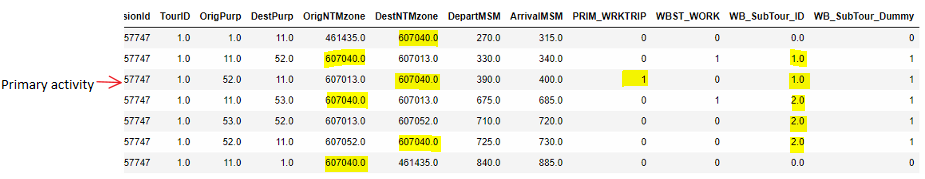

In [209]:
#Identify possible beginning of the WB sub-tour - 1/2
#Assigning WB Sub-tours flag:
#1: begin trip of a WB SubTour
#2: end trip of a WB SubTour
#0: not the beginning nor the end trip of a WB SubTour


#PurpOrig_cat or PurpDest_cat categories (work and business are considered as work)
#0--> Home
#1--> Work
#2--> Business
#3--> Education
#4--> Personal activities
#5--> Shopping
#6--> Leisure
#7--> Escort

for i, row in WorkToursdf2.iterrows():
    if ((WorkToursdf2.loc[i,'BeginTour'] == 1)|(WorkToursdf2.loc[i,'EndTour'] == 1)): #if it is the first or last trip of the tour
        WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 0
    elif (((WorkToursdf2.loc[i,'PurpOrig_cat'] == 1)|(WorkToursdf2.loc[i,'PurpOrig_cat'] == 2))&(WorkToursdf2.loc[i,'OrigNTMzone'] == WorkToursdf2.loc[i,'PrimActZone'])): #if the origin purpose category is work and the origin
        WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1 #it is the beginning of the WB sub-tour
    elif (((WorkToursdf2.loc[i-1,'WB_SubTour_Flag'] == 1)&(WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i-1,'SessionId']))&(((WorkToursdf2.loc[i,'PurpDest_cat'] != 1)&(WorkToursdf2.loc[i,'PurpDest_cat'] != 2)&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i-1,'TourID']))|(WorkToursdf2.loc[i,'DestNTMzone'] != WorkToursdf2.loc[i,'PrimActZone']))):
        WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 0
    elif (((WorkToursdf2.loc[i,'PurpDest_cat'] == 1)|(WorkToursdf2.loc[i,'PurpDest_cat'] == 2))&(WorkToursdf2.loc[i,'DestNTMzone'] == WorkToursdf2.loc[i,'PrimActZone'])&(((WorkToursdf2.loc[i-1,'WB_SubTour_Flag'] == 1)&(WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i-1,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i-1,'TourID']))|((WorkToursdf2.loc[i-2,'WB_SubTour_Flag'] == 1)&(WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i-2,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i-2,'TourID'])))):
        WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 2 #it is the end of the WB sub-tour
    else:
        WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 0

In [210]:
look=WorkToursdf2[WorkToursdf2['SessionId']==357050]
look

,SessionId,TourID,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,BUSINESS_TOUR,Unemplo_worktour,probl_edutour,FromZoneID,ToZoneID,ToZoneID_level2,PrimOccNTMzone_level2,USUALLOC,PrimActZone,WB_SubTour_Flag
5,357050,1.0,1.0,1.0,0.0,2147243.0,1.0,53.0,0.0,53.0,...,1,0.0,0.0,102543.0,102332.0,102330,169050,0.0,102332.0,0.0
6,357050,1.0,2.0,0.0,0.0,2147245.0,53.0,11.0,0.0,53.0,...,0,0.0,0.0,0.0,0.0,0,169050,0.0,102332.0,1.0
7,357050,1.0,3.0,0.0,0.0,2147246.0,11.0,53.0,0.0,53.0,...,0,0.0,0.0,0.0,0.0,0,169050,0.0,102332.0,0.0
8,357050,1.0,4.0,0.0,0.0,2147248.0,53.0,53.0,0.0,53.0,...,0,0.0,0.0,0.0,0.0,0,169050,0.0,102332.0,0.0
9,357050,1.0,5.0,0.0,0.0,2147250.0,53.0,11.0,0.0,53.0,...,0,0.0,0.0,0.0,0.0,0,169050,0.0,102332.0,0.0
10,357050,1.0,6.0,0.0,0.0,2147251.0,11.0,1.0,0.0,11.0,...,0,0.0,0.0,0.0,0.0,0,169050,0.0,102332.0,0.0


In [211]:
#Identify the begin of the WB sub-tour - 2/2

#verify the maximum number of trips that a tour can have
checkmaxntrips=WorkToursdf2[['SessionId','PRIM_WRKTRIP']]
checkmaxntrips['countcol']=1
checkmaxntrips=checkmaxntrips.groupby(['SessionId']).sum()
checkmaxntrips.max()

#SessionIdlastRow=WorkToursdf2.loc[len(WorkToursdf2)-1,'SessionId']
#SessionIdlastRow

#Correct identification of start and end of WB subtours
for i, row in WorkToursdf2.iterrows():
    if ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 0)|(WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 2)):
        WorkToursdf2.loc[i,'WB_SubTour_Flag'] = WorkToursdf2.loc[i,'WB_SubTour_Flag']
    elif (((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&(WorkToursdf2.loc[i-1,'WB_SubTour_Flag'] == 1))&(WorkToursdf2.loc[i,'SessionId'] == WorkToursdf2.loc[i-1,'SessionId'])):
        WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 0
    elif ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&((WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i+1,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i+1,'TourID'])&(WorkToursdf2.loc[i+1,'WB_SubTour_Flag']==2))):
        WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1
    elif ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&((WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i+2,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i+2,'TourID'])&(WorkToursdf2.loc[i+2,'WB_SubTour_Flag']==2))):
        WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1
    elif ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&((WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i+3,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i+3,'TourID'])&(WorkToursdf2.loc[i+3,'WB_SubTour_Flag']==2))):
        WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1
    elif ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&((WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i+4,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i+4,'TourID'])&(WorkToursdf2.loc[i+4,'WB_SubTour_Flag']==2))):
        WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1
    elif ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&((WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i+5,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i+5,'TourID'])&(WorkToursdf2.loc[i+5,'WB_SubTour_Flag']==2))):
        WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1
    elif (WorkToursdf2.loc[i,'SessionId']!=WorkToursdf2.loc[len(WorkToursdf2)-1,'SessionId']):
        if ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&((WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i+6,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i+6,'TourID'])&(WorkToursdf2.loc[i+6,'WB_SubTour_Flag']==2))):
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1
        else:
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 0
    elif (WorkToursdf2.loc[i,'SessionId']!=WorkToursdf2.loc[len(WorkToursdf2)-1,'SessionId']):
        if ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&((WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i+7,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i+7,'TourID'])&(WorkToursdf2.loc[i+7,'WB_SubTour_Flag']==2))):
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1
        else:
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 0
    elif (WorkToursdf2.loc[i,'SessionId']!=WorkToursdf2.loc[len(WorkToursdf2)-1,'SessionId']):
        if ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&((WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i+8,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i+8,'TourID'])&(WorkToursdf2.loc[i+8,'WB_SubTour_Flag']==2))):
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1
        else:
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 0
    elif (WorkToursdf2.loc[i,'SessionId']!=WorkToursdf2.loc[len(WorkToursdf2)-1,'SessionId']):
        if ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&((WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i+9,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i+9,'TourID'])&(WorkToursdf2.loc[i+9,'WB_SubTour_Flag']==2))):
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1
        else:
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 0
    elif (WorkToursdf2.loc[i,'SessionId']!=WorkToursdf2.loc[len(WorkToursdf2)-1,'SessionId']):
        if ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&((WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i+10,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i+10,'TourID'])&(WorkToursdf2.loc[i+10,'WB_SubTour_Flag']==2))):
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1
        else:
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 0
    elif (WorkToursdf2.loc[i,'SessionId']!=WorkToursdf2.loc[len(WorkToursdf2)-1,'SessionId']):
        if ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&((WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i+11,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i+11,'TourID'])&(WorkToursdf2.loc[i+11,'WB_SubTour_Flag']==2))):
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1
        else:
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 0
    elif (WorkToursdf2.loc[i,'SessionId']!=WorkToursdf2.loc[len(WorkToursdf2)-1,'SessionId']):
        if ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&((WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i+12,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i+12,'TourID'])&(WorkToursdf2.loc[i+12,'WB_SubTour_Flag']==2))):
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1
        else:
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 0
    elif (WorkToursdf2.loc[i,'SessionId']!=WorkToursdf2.loc[len(WorkToursdf2)-1,'SessionId']):
        if ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&((WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i+13,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i+13,'TourID'])&(WorkToursdf2.loc[i+13,'WB_SubTour_Flag']==2))):
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1
        else:
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 0
    elif (WorkToursdf2.loc[i,'SessionId']!=WorkToursdf2.loc[len(WorkToursdf2)-1,'SessionId']):
        if ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&((WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i+14,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i+14,'TourID'])&(WorkToursdf2.loc[i+14,'WB_SubTour_Flag']==2))):
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1
        else:
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 0
    elif (WorkToursdf2.loc[i,'SessionId']!=WorkToursdf2.loc[len(WorkToursdf2)-1,'SessionId']):
        if ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&((WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i+15,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i+15,'TourID'])&(WorkToursdf2.loc[i+15,'WB_SubTour_Flag']==2))):
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1
        else:
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 0
    elif (WorkToursdf2.loc[i,'SessionId']!=WorkToursdf2.loc[len(WorkToursdf2)-1,'SessionId']):
        if ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)&((WorkToursdf2.loc[i,'SessionId']==WorkToursdf2.loc[i+16,'SessionId'])&(WorkToursdf2.loc[i,'TourID']==WorkToursdf2.loc[i+16,'TourID'])&(WorkToursdf2.loc[i+16,'WB_SubTour_Flag']==2))):
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 1
        else:
            WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 0
    else:
        WorkToursdf2.loc[i,'WB_SubTour_Flag'] = 0

/tmp/ipykernel_1816975/392036428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkmaxntrips['countcol']=1


In [212]:
#Assign ID to WB sub-tours and create a dummy variable for WB ST trips
for i, row in WorkToursdf2.iterrows():
    if ((WorkToursdf2.loc[i,'BeginTour'] == 1)|(WorkToursdf2.loc[i,'EndTour'] == 1)):
        WorkToursdf2.loc[i,'WB_SubTour_ID'] = 0
    elif ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1)):
        WorkToursdf2.loc[i,'WB_SubTour_ID'] = WorkToursdf2.loc[i-1,'WB_SubTour_ID'] + 1
    elif ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 2)):
        WorkToursdf2.loc[i,'WB_SubTour_ID'] = WorkToursdf2.loc[i-1,'WB_SubTour_ID']
    elif ((WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 0)&(WorkToursdf2.loc[i-1,'WB_SubTour_Flag'] != 2)):
        WorkToursdf2.loc[i,'WB_SubTour_ID'] = WorkToursdf2.loc[i-1,'WB_SubTour_ID']
    else:
        WorkToursdf2.loc[i,'WB_SubTour_ID'] = 0

#### 9.6 Check whether there is any WBST that does not starts and end at the same location

In [213]:
WorkToursdf2

,SessionId,TourID,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,Unemplo_worktour,probl_edutour,FromZoneID,ToZoneID,ToZoneID_level2,PrimOccNTMzone_level2,USUALLOC,PrimActZone,WB_SubTour_Flag,WB_SubTour_ID
0,357025,1.0,1.0,1.0,0.0,2147177.0,1.0,11.0,0.0,11.0,...,0.0,0.0,573135.0,561345.0,561340,561340,1.0,561345.0,0.0,0.0
1,357025,1.0,2.0,0.0,0.0,2147178.0,11.0,1.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0,561340,0.0,561345.0,0.0,0.0
2,357026,1.0,1.0,0.0,0.0,2147179.0,1.0,21.0,14.0,21.0,...,0.0,0.0,103291.0,0.0,0,147120,0.0,147121.0,0.0,0.0
3,357026,1.0,2.0,1.0,0.0,2147180.0,21.0,11.0,0.0,11.0,...,0.0,0.0,0.0,147121.0,147120,147120,1.0,147121.0,0.0,0.0
4,357026,1.0,3.0,0.0,0.0,2147181.0,11.0,1.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0,147120,0.0,147121.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18507,465796,1.0,5.0,0.0,0.0,2540795.0,49.0,41.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0,102330,0.0,102336.0,0.0,0.0
18508,465796,1.0,6.0,0.0,0.0,2540798.0,41.0,45.0,0.0,41.0,...,0.0,0.0,0.0,0.0,0,102330,0.0,102336.0,0.0,0.0
18509,465796,1.0,7.0,0.0,0.0,2540799.0,45.0,41.0,0.0,45.0,...,0.0,0.0,0.0,0.0,0,102330,0.0,102336.0,0.0,0.0
18510,465796,1.0,8.0,0.0,0.0,2540800.0,41.0,23.0,0.0,41.0,...,0.0,0.0,0.0,0.0,0,102330,0.0,102336.0,0.0,0.0


In [214]:
#Check whether the WBST starts and end at the same location
Check=WorkToursdf2.copy()

#Get the location only for the origin and destination
Check['OriginBeginWBST'] = WorkToursdf2['Origin_OTM_NTM']*(WorkToursdf2['WB_SubTour_Flag']==1)
Check['DestEndWBST'] = WorkToursdf2['Dest_OTM_NTM']*(WorkToursdf2['WB_SubTour_Flag']==2)

#Group according to SessionId, TourID and WB_SubTour_ID and sum columns
Check=Check[['SessionId','TourID','TripNr','WB_SubTour_ID','OriginBeginWBST','DestEndWBST']]
Check = Check.groupby(by=['SessionId','TourID','WB_SubTour_ID']).sum().reset_index()

#Check whether there are individuals with origin trip of the first trip in the WBST has a different from the destination 
#from the last trip in the WBST 

for i, row in Check.iterrows():
    if ((Check.loc[i,'OriginBeginWBST'] != Check.loc[i,'DestEndWBST'])):
        Check.loc[i,'WBST_location_problem'] = 1 
    else: 
        Check.loc[i,'WBST_location_problem'] = 0

TotalFlag = Check['WBST_location_problem'].sum()
print (TotalFlag)

0.0


In [215]:
WorkToursdf2['WB_SubTour_Dummy'] = WorkToursdf2['WB_SubTour_ID'].apply(lambda x: 1 if x > 0 else 0)

In [216]:
#Checking the total number of WB sub-tours (total of 1 or 2 values) and whether there are problems with the identification 
#(i.e., number of 1 and 2 values is different)
test=WorkToursdf2[['SessionId','TourID','WB_SubTour_Flag']]
test=test['WB_SubTour_Flag'].value_counts()
test

0.0    18122
1.0      195
2.0      195
Name: WB_SubTour_Flag, dtype: int64

#### 9.7 Identify WB sub-tours with more than 1 activity/stop (i.e, primary activity + secondary stop)
We decided to identify the primary activity of these WB sub-tours and ignore the intermediate stop (i.e., not estimating the intermediate stop for WB sub-tour model), as we will not estimate intermediate stop models for WB sub-tours

In [217]:
for i, row in WorkToursdf2.iterrows():
    if (WorkToursdf2.loc[i,'WB_SubTour_Flag'] == 1):
        if (WorkToursdf2.loc[i+1,'WB_SubTour_Flag'] == 0):
            WorkToursdf2.loc[i,'SubTour_Morethan1stop'] = 1
        else:
            WorkToursdf2.loc[i,'SubTour_Morethan1stop'] = 0
    else:
            WorkToursdf2.loc[i,'SubTour_Morethan1stop'] = 0
WorkToursdf2
WorkToursdf2['SubTour_Morethan1stop'].sum()

21.0

In [218]:
#WorkToursdf2.to_csv('Check.csv',index=False)

#### 9.8 Identify the primary activity of WB sub-tours

According to activity priority

In [219]:
WorkToursdf2['WBST_Primaryactivity']=WorkToursdf2['WB_SubTour_Flag'].apply(lambda x: 1 if x==1 else 0)

#Correct the primary activity of those who have more than 1 activity/stop
for i, row in WorkToursdf2.iterrows():
    if (WorkToursdf2.loc[i,'WBST_Primaryactivity'] == 1):
        if (WorkToursdf2.loc[i+1,'WB_SubTour_Flag'] == 0):
            WorkToursdf2.loc[i,'WBST_Primaryactivity'] = 1
            WorkToursdf2.loc[i+1,'WBST_Primaryactivity'] = 1
        else:
            WorkToursdf2.loc[i,'WBST_Primaryactivity'] = WorkToursdf2.loc[i,'WBST_Primaryactivity']
    else:
        WorkToursdf2.loc[i,'WBST_Primaryactivity'] = WorkToursdf2.loc[i,'WBST_Primaryactivity']

#Purpose priority assignment
#0--> Home
#1--> Work
#2--> Business
#3--> Education
#4--> Personal activities
#5--> Shopping
#6--> Leisure
#7--> Escort

WorkToursdf2['WBSub_PrimAct_PurpDest_cat']=WorkToursdf2['PurpDest_cat']*WorkToursdf2['WBST_Primaryactivity']    
WorkToursdf2

,SessionId,TourID,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,ToZoneID_level2,PrimOccNTMzone_level2,USUALLOC,PrimActZone,WB_SubTour_Flag,WB_SubTour_ID,WB_SubTour_Dummy,SubTour_Morethan1stop,WBST_Primaryactivity,WBSub_PrimAct_PurpDest_cat
0,357025,1.0,1.0,1.0,0.0,2147177.0,1.0,11.0,0.0,11.0,...,561340,561340,1.0,561345.0,0.0,0.0,0,0.0,0,0.0
1,357025,1.0,2.0,0.0,0.0,2147178.0,11.0,1.0,0.0,11.0,...,0,561340,0.0,561345.0,0.0,0.0,0,0.0,0,0.0
2,357026,1.0,1.0,0.0,0.0,2147179.0,1.0,21.0,14.0,21.0,...,0,147120,0.0,147121.0,0.0,0.0,0,0.0,0,0.0
3,357026,1.0,2.0,1.0,0.0,2147180.0,21.0,11.0,0.0,11.0,...,147120,147120,1.0,147121.0,0.0,0.0,0,0.0,0,0.0
4,357026,1.0,3.0,0.0,0.0,2147181.0,11.0,1.0,0.0,11.0,...,0,147120,0.0,147121.0,0.0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18507,465796,1.0,5.0,0.0,0.0,2540795.0,49.0,41.0,0.0,49.0,...,0,102330,0.0,102336.0,0.0,0.0,0,0.0,0,0.0
18508,465796,1.0,6.0,0.0,0.0,2540798.0,41.0,45.0,0.0,41.0,...,0,102330,0.0,102336.0,0.0,0.0,0,0.0,0,0.0
18509,465796,1.0,7.0,0.0,0.0,2540799.0,45.0,41.0,0.0,45.0,...,0,102330,0.0,102336.0,0.0,0.0,0,0.0,0,0.0
18510,465796,1.0,8.0,0.0,0.0,2540800.0,41.0,23.0,0.0,41.0,...,0,102330,0.0,102336.0,0.0,0.0,0,0.0,0,0.0


In [220]:
#Identify primary activities according to priority (lower number = higher priority)
WBST_Primary_Activity_Prio=WorkToursdf2.loc[WorkToursdf2.groupby(['SessionId','TourID','WB_SubTour_ID','WBST_Primaryactivity'])['WBSub_PrimAct_PurpDest_cat'].idxmin()]
WBST_Primary_Activity_Prio=WBST_Primary_Activity_Prio.rename(columns={"WBSub_PrimAct_PurpDest_cat": "WBST_PrimaryAct_Priority"})
WBST_Primary_Activity_Prio=WBST_Primary_Activity_Prio[['SessionId','TourID','WB_SubTour_ID','WBST_PrimaryAct_Priority']]
WBST_Primary_Activity_Prio=WBST_Primary_Activity_Prio[(WBST_Primary_Activity_Prio['WB_SubTour_ID']!=0)&(WBST_Primary_Activity_Prio['WBST_PrimaryAct_Priority']!=0)]
WBST_Primary_Activity_Prio

#merge
WorkToursdf3=WBST_Primary_Activity_Prio.merge(WorkToursdf2, on=['SessionId', 'TourID','WB_SubTour_ID'], how='right').fillna(0)
WorkToursdf3

,SessionId,TourID,WB_SubTour_ID,WBST_PrimaryAct_Priority,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,...,ToZoneID,ToZoneID_level2,PrimOccNTMzone_level2,USUALLOC,PrimActZone,WB_SubTour_Flag,WB_SubTour_Dummy,SubTour_Morethan1stop,WBST_Primaryactivity,WBSub_PrimAct_PurpDest_cat
0,357025,1.0,0.0,0.0,1.0,1.0,0.0,2147177.0,1.0,11.0,...,561345.0,561340,561340,1.0,561345.0,0.0,0,0.0,0,0.0
1,357025,1.0,0.0,0.0,2.0,0.0,0.0,2147178.0,11.0,1.0,...,0.0,0,561340,0.0,561345.0,0.0,0,0.0,0,0.0
2,357026,1.0,0.0,0.0,1.0,0.0,0.0,2147179.0,1.0,21.0,...,0.0,0,147120,0.0,147121.0,0.0,0,0.0,0,0.0
3,357026,1.0,0.0,0.0,2.0,1.0,0.0,2147180.0,21.0,11.0,...,147121.0,147120,147120,1.0,147121.0,0.0,0,0.0,0,0.0
4,357026,1.0,0.0,0.0,3.0,0.0,0.0,2147181.0,11.0,1.0,...,0.0,0,147120,0.0,147121.0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18507,465796,1.0,0.0,0.0,5.0,0.0,0.0,2540795.0,49.0,41.0,...,0.0,0,102330,0.0,102336.0,0.0,0,0.0,0,0.0
18508,465796,1.0,0.0,0.0,6.0,0.0,0.0,2540798.0,41.0,45.0,...,0.0,0,102330,0.0,102336.0,0.0,0,0.0,0,0.0
18509,465796,1.0,0.0,0.0,7.0,0.0,0.0,2540799.0,45.0,41.0,...,0.0,0,102330,0.0,102336.0,0.0,0,0.0,0,0.0
18510,465796,1.0,0.0,0.0,8.0,0.0,0.0,2540800.0,41.0,23.0,...,0.0,0,102330,0.0,102336.0,0.0,0,0.0,0,0.0


In [221]:
#Compare the priority of activities (PrimaryAct_Priority_cat) with the Activity with higher priority category
for i, row in WorkToursdf3.iterrows():
    if (WorkToursdf3.loc[i,'WB_SubTour_ID']!=0):
        if WorkToursdf3.loc[i,'WBSub_PrimAct_PurpDest_cat'] == WorkToursdf3.loc[i,'WBST_PrimaryAct_Priority']: #if the activity with higher priority is the same as the activity priority category
            WorkToursdf3.loc[i,'WBST_PrimaryActivity'] = 1
        else:
            WorkToursdf3.loc[i,'WBST_PrimaryActivity'] = 0
    else:
            WorkToursdf3.loc[i,'WBST_PrimaryActivity'] = 0
            
WorkToursdf3

,SessionId,TourID,WB_SubTour_ID,WBST_PrimaryAct_Priority,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,...,ToZoneID_level2,PrimOccNTMzone_level2,USUALLOC,PrimActZone,WB_SubTour_Flag,WB_SubTour_Dummy,SubTour_Morethan1stop,WBST_Primaryactivity,WBSub_PrimAct_PurpDest_cat,WBST_PrimaryActivity
0,357025,1.0,0.0,0.0,1.0,1.0,0.0,2147177.0,1.0,11.0,...,561340,561340,1.0,561345.0,0.0,0,0.0,0,0.0,0.0
1,357025,1.0,0.0,0.0,2.0,0.0,0.0,2147178.0,11.0,1.0,...,0,561340,0.0,561345.0,0.0,0,0.0,0,0.0,0.0
2,357026,1.0,0.0,0.0,1.0,0.0,0.0,2147179.0,1.0,21.0,...,0,147120,0.0,147121.0,0.0,0,0.0,0,0.0,0.0
3,357026,1.0,0.0,0.0,2.0,1.0,0.0,2147180.0,21.0,11.0,...,147120,147120,1.0,147121.0,0.0,0,0.0,0,0.0,0.0
4,357026,1.0,0.0,0.0,3.0,0.0,0.0,2147181.0,11.0,1.0,...,0,147120,0.0,147121.0,0.0,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18507,465796,1.0,0.0,0.0,5.0,0.0,0.0,2540795.0,49.0,41.0,...,0,102330,0.0,102336.0,0.0,0,0.0,0,0.0,0.0
18508,465796,1.0,0.0,0.0,6.0,0.0,0.0,2540798.0,41.0,45.0,...,0,102330,0.0,102336.0,0.0,0,0.0,0,0.0,0.0
18509,465796,1.0,0.0,0.0,7.0,0.0,0.0,2540799.0,45.0,41.0,...,0,102330,0.0,102336.0,0.0,0,0.0,0,0.0,0.0
18510,465796,1.0,0.0,0.0,8.0,0.0,0.0,2540800.0,41.0,23.0,...,0,102330,0.0,102336.0,0.0,0,0.0,0,0.0,0.0


In [222]:
#See how many WBST tours got an primary activity assigned (if the value is higher than the number of WB sub-tours, 
#we need to consider duration as well, as it will mean that in some cases, more than 1 primary activity was assigned to the tour)
test=WorkToursdf3['WBST_PrimaryActivity'].value_counts()
test

0.0    18303
1.0      209
Name: WBST_PrimaryActivity, dtype: int64

According to activity duration

In [223]:
#Keep only the rows that are related to "higher priority trips" (at this point we may still have more than 1 primary activity per tour)
WBST_PrimAct_duration=WorkToursdf3[WorkToursdf3['WBST_PrimaryActivity']==1].reset_index()
WBST_PrimAct_duration

,level_0,SessionId,TourID,WB_SubTour_ID,WBST_PrimaryAct_Priority,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,...,ToZoneID_level2,PrimOccNTMzone_level2,USUALLOC,PrimActZone,WB_SubTour_Flag,WB_SubTour_Dummy,SubTour_Morethan1stop,WBST_Primaryactivity,WBSub_PrimAct_PurpDest_cat,WBST_PrimaryActivity
0,193,357381,1.0,1.0,6.0,2.0,0.0,0.0,2148224.0,11.0,...,0,390160,0.0,390161.0,1.0,1,0.0,1,6.0,1.0
1,305,357557,1.0,1.0,2.0,2.0,0.0,0.0,2148795.0,11.0,...,0,707060,0.0,707062.0,1.0,1,0.0,1,2.0,1.0
2,365,357622,1.0,1.0,5.0,2.0,0.0,0.0,2148980.0,11.0,...,0,169050,0.0,169055.0,1.0,1,0.0,1,5.0,1.0
3,410,357747,1.0,1.0,2.0,2.0,0.0,0.0,2149289.0,11.0,...,0,103120,0.0,607040.0,1.0,1,0.0,1,2.0,1.0
4,412,357747,1.0,2.0,2.0,4.0,0.0,0.0,2149291.0,11.0,...,0,103120,0.0,607040.0,1.0,1,1.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,18335,435714,1.0,1.0,5.0,2.0,0.0,0.0,2491427.0,11.0,...,0,265310,0.0,265315.0,1.0,1,0.0,1,5.0,1.0
205,18427,436556,1.0,1.0,5.0,2.0,0.0,0.0,2493331.0,11.0,...,0,153020,0.0,153028.0,1.0,1,0.0,1,5.0,1.0
206,18480,455887,1.0,1.0,5.0,4.0,0.0,0.0,2514180.0,51.0,...,0,265250,0.0,163014.0,1.0,1,1.0,1,5.0,1.0
207,18481,455887,1.0,1.0,5.0,5.0,0.0,0.0,2514181.0,31.0,...,0,265250,0.0,163014.0,0.0,1,0.0,1,5.0,1.0


In [224]:
#Identify primary activities according to max duration considering only the trips that are associated to the highest priority
WBST_PrimAct_duration2=WBST_PrimAct_duration.loc[WBST_PrimAct_duration.groupby(['SessionId','TourID','WB_SubTour_ID'])['DurationAct(min)'].idxmax()]
WBST_PrimAct_duration2=WBST_PrimAct_duration2.rename(columns={"DurationAct(min)": "WBST_Max_DurationAct"})
WBST_PrimAct_duration2=WBST_PrimAct_duration2[['SessionId','TourID','WB_SubTour_ID','WBST_Max_DurationAct']]

#merge
WorkToursdf4=WBST_PrimAct_duration2.merge(WorkToursdf3, on=['SessionId', 'TourID','WB_SubTour_ID'], how='right').fillna(0)
WorkToursdf4

,SessionId,TourID,WB_SubTour_ID,WBST_Max_DurationAct,WBST_PrimaryAct_Priority,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,...,ToZoneID_level2,PrimOccNTMzone_level2,USUALLOC,PrimActZone,WB_SubTour_Flag,WB_SubTour_Dummy,SubTour_Morethan1stop,WBST_Primaryactivity,WBSub_PrimAct_PurpDest_cat,WBST_PrimaryActivity
0,357025,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2147177.0,1.0,...,561340,561340,1.0,561345.0,0.0,0,0.0,0,0.0,0.0
1,357025,1.0,0.0,0.0,0.0,2.0,0.0,0.0,2147178.0,11.0,...,0,561340,0.0,561345.0,0.0,0,0.0,0,0.0,0.0
2,357026,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2147179.0,1.0,...,0,147120,0.0,147121.0,0.0,0,0.0,0,0.0,0.0
3,357026,1.0,0.0,0.0,0.0,2.0,1.0,0.0,2147180.0,21.0,...,147120,147120,1.0,147121.0,0.0,0,0.0,0,0.0,0.0
4,357026,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2147181.0,11.0,...,0,147120,0.0,147121.0,0.0,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18507,465796,1.0,0.0,0.0,0.0,5.0,0.0,0.0,2540795.0,49.0,...,0,102330,0.0,102336.0,0.0,0,0.0,0,0.0,0.0
18508,465796,1.0,0.0,0.0,0.0,6.0,0.0,0.0,2540798.0,41.0,...,0,102330,0.0,102336.0,0.0,0,0.0,0,0.0,0.0
18509,465796,1.0,0.0,0.0,0.0,7.0,0.0,0.0,2540799.0,45.0,...,0,102330,0.0,102336.0,0.0,0,0.0,0,0.0,0.0
18510,465796,1.0,0.0,0.0,0.0,8.0,0.0,0.0,2540800.0,41.0,...,0,102330,0.0,102336.0,0.0,0,0.0,0,0.0,0.0


In [225]:
#Compare the priority of activities (PrimaryAct_Priority_cat) with the Activity with higher priority category
for i, row in WorkToursdf4.iterrows():
    if (WorkToursdf4.loc[i,'WB_SubTour_ID']!=0):
        if ((WorkToursdf4.loc[i,'WBST_PrimaryActivity'] == 1)&(WorkToursdf4.loc[i,'WBST_Max_DurationAct'] == WorkToursdf4.loc[i,'DurationAct(min)'])): 
            WorkToursdf4.loc[i,'WBST_PrimaryActivity'] = 1
        else:
            WorkToursdf4.loc[i,'WBST_PrimaryActivity'] = 0
    else:
            WorkToursdf4.loc[i,'WBST_PrimaryActivity'] = 0

            
#Correct those WB sub-tours where 2 activities with exactly the highest priority and longest duration happen
for i, row in WorkToursdf4.iterrows():
    if (i != len(WorkToursdf4)-1): #Except for the last row
        if (((WorkToursdf4.loc[i,'WBST_PrimaryActivity']==1)&(WorkToursdf4.loc[i+1,'WBST_PrimaryActivity']==1))&(WorkToursdf4.loc[i,'SessionId'] == WorkToursdf4.loc[i+1,'SessionId'])):
            WorkToursdf4.loc[i,'WBST_PrimaryActivity'] = 1
            WorkToursdf4.loc[i+1,'WBST_PrimaryActivity'] = 0
        else:
            WorkToursdf4.loc[i,'WBST_PrimaryActivity'] = WorkToursdf4.loc[i,'WBST_PrimaryActivity']

WorkToursdf4

,SessionId,TourID,WB_SubTour_ID,WBST_Max_DurationAct,WBST_PrimaryAct_Priority,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,...,ToZoneID_level2,PrimOccNTMzone_level2,USUALLOC,PrimActZone,WB_SubTour_Flag,WB_SubTour_Dummy,SubTour_Morethan1stop,WBST_Primaryactivity,WBSub_PrimAct_PurpDest_cat,WBST_PrimaryActivity
0,357025,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2147177.0,1.0,...,561340,561340,1.0,561345.0,0.0,0,0.0,0,0.0,0.0
1,357025,1.0,0.0,0.0,0.0,2.0,0.0,0.0,2147178.0,11.0,...,0,561340,0.0,561345.0,0.0,0,0.0,0,0.0,0.0
2,357026,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2147179.0,1.0,...,0,147120,0.0,147121.0,0.0,0,0.0,0,0.0,0.0
3,357026,1.0,0.0,0.0,0.0,2.0,1.0,0.0,2147180.0,21.0,...,147120,147120,1.0,147121.0,0.0,0,0.0,0,0.0,0.0
4,357026,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2147181.0,11.0,...,0,147120,0.0,147121.0,0.0,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18507,465796,1.0,0.0,0.0,0.0,5.0,0.0,0.0,2540795.0,49.0,...,0,102330,0.0,102336.0,0.0,0,0.0,0,0.0,0.0
18508,465796,1.0,0.0,0.0,0.0,6.0,0.0,0.0,2540798.0,41.0,...,0,102330,0.0,102336.0,0.0,0,0.0,0,0.0,0.0
18509,465796,1.0,0.0,0.0,0.0,7.0,0.0,0.0,2540799.0,45.0,...,0,102330,0.0,102336.0,0.0,0,0.0,0,0.0,0.0
18510,465796,1.0,0.0,0.0,0.0,8.0,0.0,0.0,2540800.0,41.0,...,0,102330,0.0,102336.0,0.0,0,0.0,0,0.0,0.0


In [226]:
#See how many WBST tours got an primary activity assigned (the value should be the same as the total number of WBST)
test=WorkToursdf4['WBST_PrimaryActivity'].sum()
test

195.0

#### 9.9 Visualize the number of WB sub-tours by purpose (including business as a separate category)

In [227]:
#Get the purpose of the Primary activity of the WBST (should ignore the purpose 0 = home)
WorkToursdf4['WBST_PrimAct_Purpose']= WorkToursdf4['WBST_PrimaryActivity']*WorkToursdf4['WBSub_PrimAct_PurpDest_cat']
WorkToursdf4['WBST_PrimAct_Purpose'].value_counts()

#Purpose priority assignment
#0--> Home
#1--> Work
#2--> Business
#3--> Education
#4--> Personal activities
#5--> Shopping
#6--> Leisure
#7--> Escort

0.0    18317
2.0      114
4.0       24
6.0       23
5.0       20
1.0        9
7.0        4
3.0        1
Name: WBST_PrimAct_Purpose, dtype: int64

In [228]:
def AssignPurp(WBST_PrimAct_PurpDest_cat, category):
    if (WBST_PrimAct_PurpDest_cat == category):
        result = 1
    elif ((WBST_PrimAct_PurpDest_cat == 2) & (category == 1)):
            result = 1
    else:
            result = 0
    return result

WorkToursdf4['WBST_WORK'] = WorkToursdf4.apply(lambda x: AssignPurp(x.WBST_PrimAct_Purpose, 1), axis=1)
WorkToursdf4['WBST_EDU']=WorkToursdf4.apply(lambda x: AssignPurp(x.WBST_PrimAct_Purpose, 3), axis=1)
WorkToursdf4['WBST_PERSONAL']=WorkToursdf4.apply(lambda x: AssignPurp(x.WBST_PrimAct_Purpose, 4), axis=1)
WorkToursdf4['WBST_SHOP']=WorkToursdf4.apply(lambda x: AssignPurp(x.WBST_PrimAct_Purpose, 5), axis=1)
WorkToursdf4['WBST_LEISURE']=WorkToursdf4.apply(lambda x: AssignPurp(x.WBST_PrimAct_Purpose, 6), axis=1)
WorkToursdf4['WBST_ESCORT']=WorkToursdf4.apply(lambda x: AssignPurp(x.WBST_PrimAct_Purpose, 7), axis=1)
WorkToursdf4['BUSINESS_WBST']=WorkToursdf4.apply(lambda x: AssignPurp(x.WBST_PrimAct_Purpose, 2), axis=1)

#### 9.11 Visualize total of WBST by purpose (Business is just a dummy refering to the number of work tours that refer to business)

In [229]:
lookdatadf=WorkToursdf4[['WBST_WORK','WBST_EDU','WBST_PERSONAL','WBST_SHOP','WBST_LEISURE','WBST_ESCORT','BUSINESS_WBST']]
lookdatadf.sum()

WBST_WORK        123
WBST_EDU           1
WBST_PERSONAL     24
WBST_SHOP         20
WBST_LEISURE      23
WBST_ESCORT        4
BUSINESS_WBST    114
dtype: int64

#### 9.12 Check whether any WB sub-tour work activity lasts longer than the work primary activity

If a work based subtour has a longer work activity, it is not considered as a subtour, but it is the main tour and 
the other work stops are just stops

In [230]:
WorkToursdf4['Primary_Activity_Tour'].value_counts()

0.0    11426
1.0     7086
Name: Primary_Activity_Tour, dtype: int64

In [231]:
#WorkToursdf4.columns.to_list()

In [232]:
#Identify duration of work activities and duration of WB Sub-tours with work purpose
for i, row in WorkToursdf4.iterrows():
    WorkToursdf4.loc[i,'PrimAct_Duration'] = WorkToursdf4.loc[i,'Primary_Activity_Tour']*WorkToursdf4.loc[i,'DurationAct(min)']
    WorkToursdf4.loc[i,'WBST_PrimAct_Duration'] = WorkToursdf4.loc[i,'WBST_PrimaryActivity']*WorkToursdf4.loc[i,'DurationAct(min)']
WorkToursdf4

,SessionId,TourID,WB_SubTour_ID,WBST_Max_DurationAct,WBST_PrimaryAct_Priority,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,...,WBST_PrimAct_Purpose,WBST_WORK,WBST_EDU,WBST_PERSONAL,WBST_SHOP,WBST_LEISURE,WBST_ESCORT,BUSINESS_WBST,PrimAct_Duration,WBST_PrimAct_Duration
0,357025,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2147177.0,1.0,...,0.0,0,0,0,0,0,0,0,615.0,0.0
1,357025,1.0,0.0,0.0,0.0,2.0,0.0,0.0,2147178.0,11.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
2,357026,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2147179.0,1.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
3,357026,1.0,0.0,0.0,0.0,2.0,1.0,0.0,2147180.0,21.0,...,0.0,0,0,0,0,0,0,0,505.0,0.0
4,357026,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2147181.0,11.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18507,465796,1.0,0.0,0.0,0.0,5.0,0.0,0.0,2540795.0,49.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
18508,465796,1.0,0.0,0.0,0.0,6.0,0.0,0.0,2540798.0,41.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
18509,465796,1.0,0.0,0.0,0.0,7.0,0.0,0.0,2540799.0,45.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
18510,465796,1.0,0.0,0.0,0.0,8.0,0.0,0.0,2540800.0,41.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0


In [233]:
#Get info on the duration of the primary activity of each work tour
PrimaryActivitydurationdf=WorkToursdf4.loc[WorkToursdf4.groupby(['SessionId','TourID'])['PrimAct_Duration'].idxmax()]
PrimaryActivitydurationdf=PrimaryActivitydurationdf[['SessionId','TourID','PrimAct_Duration']]

In [234]:
#Get info on the duration of each WB sub-tour with work as purpose
#Create a dataset with information on WB sub-tours
WBST_Primarydurationdf=WorkToursdf4[['SessionId','TourID','WB_SubTour_ID','WBST_WORK','WBST_PrimAct_Duration']]
WBST_Primarydurationdf=WBST_Primarydurationdf.loc[WBST_Primarydurationdf.groupby(by=['SessionId','TourID','WB_SubTour_ID'])['WBST_PrimAct_Duration'].idxmax()]

In [235]:
#Merge dataset created with dataset containing all the information about the tours
WBST_Primarydurationdf=WBST_Primarydurationdf.merge(PrimaryActivitydurationdf, on=['SessionId', 'TourID'], how='left').fillna(0)

#Select only WB Sub-tours that have work as primary activity of the WB sub-tour
WBST_Primarydurationdf=WBST_Primarydurationdf[WBST_Primarydurationdf['WBST_WORK']>0]
WBST_Primarydurationdf

#Check if any WB sub-tour has a WB sub-tour primary activity that lasts longer than the primary work activity
WBST_Primarydurationdf['CheckWBST_duration']=WBST_Primarydurationdf['PrimAct_Duration']-WBST_Primarydurationdf['WBST_PrimAct_Duration']
WBST_Primarydurationdf=WBST_Primarydurationdf[WBST_Primarydurationdf['CheckWBST_duration']<0]
WBST_Primarydurationdf

,SessionId,TourID,WB_SubTour_ID,WBST_WORK,WBST_PrimAct_Duration,PrimAct_Duration,CheckWBST_duration


#### 9.13 Check socioeconomics

Unemployed people cannot have a work-based sub-tour

In [236]:
CheckWBST=WorkToursdf4[['SessionId','employed','AnyTypeofStudent','trainee','universityStudent','preschool_student','primaryschool_student','highschool_student','other_student','retired', 'disabled', 'onLeave', 'homemaker', 'unemployed','WB_SubTour_Dummy']]
CheckWBST=CheckWBST[CheckWBST['WB_SubTour_Dummy']==1]
CheckWBST=CheckWBST[CheckWBST['employed']!=1]
#CheckStudents=CheckStudents[CheckStudents['AnyTypeofStudent']==1]
CheckWBST.sum()

SessionId                2574402.0
employed                       0.0
AnyTypeofStudent               6.0
trainee                        4.0
universityStudent              2.0
preschool_student              0.0
primaryschool_student          0.0
highschool_student             0.0
other_student                  0.0
retired                        0.0
disabled                       0.0
onLeave                        0.0
homemaker                      0.0
unemployed                     0.0
WB_SubTour_Dummy               6.0
dtype: float64

Education WBSTs can only be performed by students, employed or trainees

In [237]:
CheckWBST=WorkToursdf4[['SessionId','WBST_EDU','employed','AnyTypeofStudent','trainee','universityStudent','preschool_student','primaryschool_student','highschool_student','other_student','retired', 'disabled', 'onLeave', 'homemaker', 'unemployed','WB_SubTour_Dummy']]
CheckWBST=CheckWBST[CheckWBST['WBST_EDU']==1]
CheckWBST

,SessionId,WBST_EDU,employed,AnyTypeofStudent,trainee,universityStudent,preschool_student,primaryschool_student,highschool_student,other_student,retired,disabled,onLeave,homemaker,unemployed,WB_SubTour_Dummy
8875,414723,1,1,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,1


#### 9.14 Export database with information on work tours and WBST 

In [238]:
WorkToursdf4.columns.to_list()

['SessionId',
 'TourID',
 'WB_SubTour_ID',
 'WBST_Max_DurationAct',
 'WBST_PrimaryAct_Priority',
 'TripNr',
 'Primary_Activity_AccordingDuration',
 'IncompleteTour_Zones',
 'TurId',
 'OrigPurp',
 'DestPurp',
 'DestEscortPurp',
 'TripPurp',
 'TripPurpGroup',
 'OrigNTMzone',
 'DestNTMzone',
 'DepartMSM',
 'ArrivalMSM',
 'PrimMode',
 'ModeChainType',
 'GISdist',
 'PrimModeDrivPass',
 'CarUsageCarNo',
 'CarCostShare',
 'PartyorAlone',
 'PartyNumu10',
 'PartyNum1017',
 'PartyNumAdults',
 'GISdistJourneyStartP',
 'SumLen',
 'index',
 'HasTravel',
 'HomeAdrNTMzone',
 'PrimOccNTMzone',
 'employed',
 'universityStudent',
 'preschool_student',
 'primaryschool_student',
 'highschool_student',
 'other_student',
 'AnyTypeofStudent',
 'retired',
 'disabled',
 'onLeave',
 'homemaker',
 'unemployed',
 'trainee',
 'GISdistHW',
 'HomeAdrDistNearestStation',
 'Origin_OTM_NTM',
 'Dest_OTM_NTM',
 'HomeAdr_OTM_NTM',
 'Sdu_OTM_NTM',
 'PrimOcc_OTM_NTM',
 'DayStart_OTM_NTM',
 'JStart_OTM_NTM',
 'Flag1',
 'Dura

In [239]:
WBSTdf=WorkToursdf4[['SessionId','TourID','WB_SubTour_ID','TripNr','TurId','FromZoneID', 'ToZoneID', 'USUALLOC','OrigPurp','DestPurp','OrigNTMzone', 'DestNTMzone', 'DepartMSM', 'ArrivalMSM', 'PrimMode', 'GISdistHW','CarUsageCarNo', 'CarCostShare', 'PartyorAlone', 'PartyNumu10', 'PartyNum1017', 'PartyNumAdults','HomeAdrNTMzone', 'PrimOccNTMzone','employed', 'universityStudent', 'preschool_student', 'primaryschool_student', 'highschool_student', 'other_student', 'AnyTypeofStudent', 'retired', 'disabled', 'onLeave', 'homemaker', 'unemployed', 'trainee','Origin_OTM_NTM', 'Dest_OTM_NTM', 'HomeAdr_OTM_NTM', 'Sdu_OTM_NTM', 'PrimOcc_OTM_NTM','BeginTripDay', 'EndTripDay', 'BeginTour', 'EndTour','PurpOrig_cat', 'PurpDest_cat','PRIM_WRKTRIP', 'PRIM_EDUTRIP', 'PRIM_PERSONALTRIP', 'PRIM_SHOPTRIP', 'PRIM_LSRTRIP', 'PRIM_ESCOTRIP', 'BUSINESS_TOUR', 'PrimActZone', 'WB_SubTour_Dummy','WBST_WORK', 'WBST_EDU', 'WBST_PERSONAL', 'WBST_SHOP', 'WBST_LEISURE', 'WBST_ESCORT', 'BUSINESS_WBST', 'WBST_PrimAct_Duration','SubTour_Morethan1stop']]

#Create a new variable to be able to redefined the primary activity only for the purpose of getting the real times
WBSTdf['Pseudo_PrimaryActivity']=WBSTdf['PRIM_WRKTRIP']

WBSTdf=WBSTdf.reset_index(drop=True)
for i, row in WBSTdf.iterrows():
    if ((WBSTdf.loc[i,'PRIM_WRKTRIP']==1)&(WBSTdf.loc[i,'WB_SubTour_Dummy']==1)):
        WBSTdf.loc[i,'Pseudo_PrimaryActivity']=0
    elif ((WBSTdf.loc[i,'PRIM_WRKTRIP']==1)&(WBSTdf.loc[i,'WB_SubTour_Dummy']==0)):
        WBSTdf.loc[i,'Pseudo_PrimaryActivity']=1
    else:
        WBSTdf.loc[i,'Pseudo_PrimaryActivity']=WBSTdf.loc[i,'Pseudo_PrimaryActivity']

        
for i, row in WBSTdf.iterrows():
    if (i != len(WBSTdf)-1):
        if ((WBSTdf.loc[i,'WB_SubTour_Dummy']==0)&(WBSTdf.loc[i+1,'WB_SubTour_Dummy']==1)):
            WBSTdf.loc[i,'Pseudo_PrimaryActivity']=1
        elif (i == 0):
            WBSTdf.loc[i,'Pseudo_PrimaryActivity']=WBSTdf.loc[i,'Pseudo_PrimaryActivity']
        elif ((WBSTdf.loc[i,'WB_SubTour_Dummy']==0)&(WBSTdf.loc[i-1,'WB_SubTour_Dummy']==1)):
            WBSTdf.loc[i,'Pseudo_PrimaryActivity']=0
    else:
            WBSTdf.loc[i,'Pseudo_PrimaryActivity']=WBSTdf.loc[i,'Pseudo_PrimaryActivity']

WBSTdf.to_csv('WorktoursAndSubToursdf.csv')

/tmp/ipykernel_1816975/665998984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WBSTdf['Pseudo_PrimaryActivity']=WBSTdf['PRIM_WRKTRIP']


In [240]:
WBSTdf.columns.to_list()

['SessionId',
 'TourID',
 'WB_SubTour_ID',
 'TripNr',
 'TurId',
 'FromZoneID',
 'ToZoneID',
 'USUALLOC',
 'OrigPurp',
 'DestPurp',
 'OrigNTMzone',
 'DestNTMzone',
 'DepartMSM',
 'ArrivalMSM',
 'PrimMode',
 'GISdistHW',
 'CarUsageCarNo',
 'CarCostShare',
 'PartyorAlone',
 'PartyNumu10',
 'PartyNum1017',
 'PartyNumAdults',
 'HomeAdrNTMzone',
 'PrimOccNTMzone',
 'employed',
 'universityStudent',
 'preschool_student',
 'primaryschool_student',
 'highschool_student',
 'other_student',
 'AnyTypeofStudent',
 'retired',
 'disabled',
 'onLeave',
 'homemaker',
 'unemployed',
 'trainee',
 'Origin_OTM_NTM',
 'Dest_OTM_NTM',
 'HomeAdr_OTM_NTM',
 'Sdu_OTM_NTM',
 'PrimOcc_OTM_NTM',
 'BeginTripDay',
 'EndTripDay',
 'BeginTour',
 'EndTour',
 'PurpOrig_cat',
 'PurpDest_cat',
 'PRIM_WRKTRIP',
 'PRIM_EDUTRIP',
 'PRIM_PERSONALTRIP',
 'PRIM_SHOPTRIP',
 'PRIM_LSRTRIP',
 'PRIM_ESCOTRIP',
 'BUSINESS_TOUR',
 'PrimActZone',
 'WB_SubTour_Dummy',
 'WBST_WORK',
 'WBST_EDU',
 'WBST_PERSONAL',
 'WBST_SHOP',
 'WBST_LE

In [241]:
# Get info on departure time from home
HomeDepTime=WBSTdf[['SessionId','TourID','OrigPurp','ArrivalMSM']].copy()
for i, row in HomeDepTime.iterrows():
    if HomeDepTime.loc[i,'OrigPurp']==1:
        HomeDepTime.loc[i,'DepTime_FromHome']=HomeDepTime.loc[i,'ArrivalMSM']
    else:
        HomeDepTime.loc[i,'DepTime_FromHome']=0

HomeDepTime=HomeDepTime.drop(columns=['OrigPurp','ArrivalMSM'])

HomeDepTime=HomeDepTime.groupby(by=['SessionId','TourID'], dropna=False).sum()
HomeDepTime

,,DepTime_FromHome
SessionId,TourID,
357025,1.0,360.0
357026,1.0,425.0
357050,1.0,480.0
357060,1.0,468.0
357061,1.0,522.0
...,...,...
455889,1.0,521.0
456013,1.0,604.0
462863,1.0,420.0


In [242]:
#Merge to get info on Departure time from Primary activity
WBSTdf=WBSTdf.merge(HomeDepTime, on=['SessionId', 'TourID'], how='left')
WBSTdf

,SessionId,TourID,WB_SubTour_ID,TripNr,TurId,FromZoneID,ToZoneID,USUALLOC,OrigPurp,DestPurp,...,WBST_EDU,WBST_PERSONAL,WBST_SHOP,WBST_LEISURE,WBST_ESCORT,BUSINESS_WBST,WBST_PrimAct_Duration,SubTour_Morethan1stop,Pseudo_PrimaryActivity,DepTime_FromHome
0,357025,1.0,0.0,1.0,2147177.0,573135.0,561345.0,1.0,1.0,11.0,...,0,0,0,0,0,0,0.0,0.0,1,360.0
1,357025,1.0,0.0,2.0,2147178.0,0.0,0.0,0.0,11.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,360.0
2,357026,1.0,0.0,1.0,2147179.0,103291.0,0.0,0.0,1.0,21.0,...,0,0,0,0,0,0,0.0,0.0,0,425.0
3,357026,1.0,0.0,2.0,2147180.0,0.0,147121.0,1.0,21.0,11.0,...,0,0,0,0,0,0,0.0,0.0,1,425.0
4,357026,1.0,0.0,3.0,2147181.0,0.0,0.0,0.0,11.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18507,465796,1.0,0.0,5.0,2540795.0,0.0,0.0,0.0,49.0,41.0,...,0,0,0,0,0,0,0.0,0.0,0,470.0
18508,465796,1.0,0.0,6.0,2540798.0,0.0,0.0,0.0,41.0,45.0,...,0,0,0,0,0,0,0.0,0.0,0,470.0
18509,465796,1.0,0.0,7.0,2540799.0,0.0,0.0,0.0,45.0,41.0,...,0,0,0,0,0,0,0.0,0.0,0,470.0
18510,465796,1.0,0.0,8.0,2540800.0,0.0,0.0,0.0,41.0,23.0,...,0,0,0,0,0,0,0.0,0.0,0,470.0


In [243]:
Check=WBSTdf[WBSTdf['SessionId']==405250]
Check

,SessionId,TourID,WB_SubTour_ID,TripNr,TurId,FromZoneID,ToZoneID,USUALLOC,OrigPurp,DestPurp,...,WBST_EDU,WBST_PERSONAL,WBST_SHOP,WBST_LEISURE,WBST_ESCORT,BUSINESS_WBST,WBST_PrimAct_Duration,SubTour_Morethan1stop,Pseudo_PrimaryActivity,DepTime_FromHome
4141,405250,1.0,0.0,1.0,2414715.0,250084.0,0.0,0.0,1.0,11.0,...,0,0,0,0,0,0,0.0,0.0,1,320.0
4142,405250,1.0,1.0,2.0,2414716.0,0.0,0.0,0.0,11.0,11.0,...,0,0,0,0,0,0,2.0,1.0,0,320.0
4143,405250,1.0,1.0,3.0,2414717.0,0.0,0.0,0.0,11.0,53.0,...,0,0,0,0,0,0,0.0,0.0,0,320.0
4144,405250,1.0,1.0,4.0,2414718.0,0.0,0.0,0.0,53.0,11.0,...,0,0,0,0,0,0,0.0,0.0,0,320.0
4145,405250,1.0,0.0,5.0,2414719.0,0.0,190035.0,1.0,11.0,11.0,...,0,0,0,0,0,0,0.0,0.0,0,320.0
4146,405250,1.0,0.0,6.0,2414720.0,0.0,0.0,0.0,11.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,320.0


In [244]:
#Check that only 1 "Pseudo_PrimaryActivity" was assigned to each tour
Check=WBSTdf.groupby(by=['SessionId','TourID']).sum()
#Check=Check[['SessionId','TourID','Pseudo_PrimaryActivity']]
Check.describe()

,WB_SubTour_ID,TripNr,TurId,FromZoneID,ToZoneID,USUALLOC,OrigPurp,DestPurp,OrigNTMzone,DestNTMzone,...,WBST_EDU,WBST_PERSONAL,WBST_SHOP,WBST_LEISURE,WBST_ESCORT,BUSINESS_WBST,WBST_PrimAct_Duration,SubTour_Morethan1stop,Pseudo_PrimaryActivity,DepTime_FromHome
count,7086.000000,7086.000000,7.086000e+03,7086.000000,7086.000000,7086.000000,7086.000000,7086.000000,7.086000e+03,7.086000e+03,...,7086.000000,7086.000000,7086.000000,7086.000000,7086.000000,7086.000000,7086.000000,7086.000000,7086.0,7086.000000
mean,0.064917,5.775473,6.317939e+06,429539.343918,421938.316116,0.837990,33.995766,33.995766,1.112756e+06,1.112758e+06,...,0.000141,0.003387,0.002822,0.003246,0.000564,0.016088,1.566751,0.002964,1.0,1297.647051
std,0.488128,5.215467,2.449445e+06,260238.433106,267534.749042,0.368486,34.961755,34.961755,8.568825e+05,8.568808e+05,...,0.011880,0.058103,0.053056,0.056884,0.029095,0.143633,13.456839,0.054362,0.0,580.842008
min,0.000000,3.000000,4.294355e+06,102121.000000,102100.000000,0.000000,12.000000,12.000000,2.042430e+05,2.042430e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,374.000000
25%,0.000000,3.000000,4.862770e+06,169021.000000,159085.000000,1.000000,12.000000,12.000000,4.200635e+05,4.200635e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,904.500000
50%,0.000000,3.000000,4.948672e+06,376163.000000,376143.000000,1.000000,12.000000,12.000000,9.225285e+05,9.225285e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1074.000000
75%,0.000000,6.000000,7.333938e+06,706249.500000,707081.750000,1.000000,53.000000,53.000000,1.520228e+06,1.520228e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1548.000000
max,14.000000,136.000000,3.437169e+07,860365.000000,860364.000000,1.000000,458.000000,458.000000,6.812959e+06,6.812959e+06,...,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,300.000000,1.000000,1.0,7152.000000


#### 9.15 Organize information by work tours and export database with information on work tours

In [245]:
#WBSTdf.columns.to_list()

In [246]:
#Get info that is the same according to Session and TourID
FixedInfodf=WBSTdf[['SessionId','TourID','PrimOccNTMzone','GISdistHW','DepTime_FromHome']]
FixedInfodf=FixedInfodf.groupby(by=['SessionId','TourID']).mean().reset_index()

In [247]:
#Get info that needs to be combined according to SessionId and TourID
SpecificTourInfo=WBSTdf[['SessionId','TourID','PRIM_WRKTRIP','BUSINESS_TOUR','USUALLOC','FromZoneID','ToZoneID']]
SpecificTourInfo=SpecificTourInfo.groupby(by=['SessionId','TourID']).sum().reset_index()

In [248]:
#Merge datasets to get info about work tours
LocationWorkToursdf=SpecificTourInfo.merge(FixedInfodf, on=['SessionId', 'TourID'], how='left')
LocationWorkToursdf=LocationWorkToursdf.rename({'PrimActZone': 'ToZoneID'}, axis='columns')
LocationWorkToursdf.sum()

SessionId           2.922935e+09
TourID              7.755000e+03
PRIM_WRKTRIP        7.086000e+03
BUSINESS_TOUR       6.510000e+02
USUALLOC            5.938000e+03
FromZoneID          3.043716e+09
ToZoneID            2.989855e+09
PrimOccNTMzone      2.936788e+09
GISdistHW           1.016649e+05
DepTime_FromHome    3.558665e+06
dtype: float64

In [249]:
#Add information on corrected start and end time of the primary activity of the work tour
#Work activities before and after subtours should be merged and considered as a single activity

#Select only relevant variables
CorrectTimedf=WBSTdf[['SessionId','TourID','FromZoneID','ToZoneID','DepartMSM', 'ArrivalMSM','PRIM_WRKTRIP','WB_SubTour_Dummy','Pseudo_PrimaryActivity']]
CorrectTimedf

,SessionId,TourID,FromZoneID,ToZoneID,DepartMSM,ArrivalMSM,PRIM_WRKTRIP,WB_SubTour_Dummy,Pseudo_PrimaryActivity
0,357025,1.0,573135.0,561345.0,340.0,360.0,1,0,1
1,357025,1.0,0.0,0.0,975.0,995.0,0,0,0
2,357026,1.0,103291.0,0.0,420.0,425.0,0,0,0
3,357026,1.0,0.0,147121.0,430.0,455.0,1,0,1
4,357026,1.0,0.0,0.0,960.0,1005.0,0,0,0
...,...,...,...,...,...,...,...,...,...
18507,465796,1.0,0.0,0.0,1140.0,1160.0,0,0,0
18508,465796,1.0,0.0,0.0,1200.0,1250.0,0,0,0
18509,465796,1.0,0.0,0.0,1250.0,1300.0,0,0,0
18510,465796,1.0,0.0,0.0,1310.0,1315.0,0,0,0


In [250]:
CorrectTimedf[['ArrivalMSM','DepartMSM','Pseudo_PrimaryActivity']].describe()
#test=CorrectTimedf[CorrectTimedf['ArrivalMSM']>1620]
test=CorrectTimedf[((CorrectTimedf['SessionId']==405250)|(CorrectTimedf['SessionId']==405341)|(CorrectTimedf['SessionId']==412958)|(CorrectTimedf['SessionId']==432798))]

test

,SessionId,TourID,FromZoneID,ToZoneID,DepartMSM,ArrivalMSM,PRIM_WRKTRIP,WB_SubTour_Dummy,Pseudo_PrimaryActivity
4141,405250,1.0,250084.0,0.0,285.0,320.0,0,0,1
4142,405250,1.0,0.0,0.0,645.0,648.0,0,1,0
4143,405250,1.0,0.0,0.0,650.0,658.0,0,1,0
4144,405250,1.0,0.0,0.0,685.0,695.0,0,1,0
4145,405250,1.0,0.0,190035.0,705.0,706.0,1,0,0
4146,405250,1.0,0.0,0.0,1245.0,1280.0,0,0,0
4227,405341,1.0,147231.0,102221.0,510.0,536.0,1,0,1
4228,405341,1.0,0.0,0.0,1060.0,1075.0,0,0,0
4229,405341,1.0,0.0,0.0,1140.0,1142.0,0,0,0
4230,405341,1.0,0.0,0.0,1260.0,1280.0,0,0,0


In [251]:
#Exclude WBST of the dataset, so we get only correct activity duration of work tours
CorrectTimedf=CorrectTimedf[CorrectTimedf['WB_SubTour_Dummy']==0]

#Arrival time
CorrectTimedf['PrimAct_ArrivalTime']=CorrectTimedf['ArrivalMSM']*CorrectTimedf['Pseudo_PrimaryActivity']

#Departure time
CorrectTimedf=CorrectTimedf.reset_index(drop=True)
for i, row in CorrectTimedf.iterrows():
    if (i != len(CorrectTimedf)-1):
        CorrectTimedf.loc[i,'PrimAct_DepartTime']=CorrectTimedf.loc[i+1,'DepartMSM']*CorrectTimedf.loc[i,'Pseudo_PrimaryActivity']
    else:
        CorrectTimedf.loc[i,'PrimAct_DepartTime']=CorrectTimedf.loc[i,'DepartMSM']*CorrectTimedf.loc[i,'Pseudo_PrimaryActivity']

/tmp/ipykernel_1816975/396447262.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CorrectTimedf['PrimAct_ArrivalTime']=CorrectTimedf['ArrivalMSM']*CorrectTimedf['Pseudo_PrimaryActivity']


In [252]:
CorrectTimedf[['ArrivalMSM','DepartMSM','Pseudo_PrimaryActivity']].describe()

,ArrivalMSM,DepartMSM,Pseudo_PrimaryActivity
count,18101.000000,18101.000000,18101.000000
mean,770.170377,746.679741,0.391470
std,282.913657,283.616522,0.488093
min,185.000000,180.000000,0.000000
25%,475.000000,450.000000,0.000000
50%,852.000000,840.000000,0.000000
75%,990.000000,960.000000,1.000000
max,1630.000000,1615.000000,1.000000


In [253]:
#Select only relevant variables
CorrectTimeTourdf=CorrectTimedf[['SessionId','TourID','PrimAct_ArrivalTime','PrimAct_DepartTime']]
CorrectTimeTourdf=CorrectTimeTourdf.groupby(by=['SessionId','TourID']).sum().reset_index()
CorrectTimeTourdf

,SessionId,TourID,PrimAct_ArrivalTime,PrimAct_DepartTime
0,357025,1.0,360.0,975.0
1,357026,1.0,455.0,960.0
2,357050,1.0,480.0,610.0
3,357060,1.0,468.0,1020.0
4,357061,1.0,522.0,990.0
...,...,...,...,...
7081,455889,1.0,590.0,780.0
7082,456013,1.0,604.0,960.0
7083,462863,1.0,460.0,945.0
7084,463592,1.0,505.0,780.0


In [254]:
#Merge to get 
LocationWorkToursdf=LocationWorkToursdf.merge(CorrectTimeTourdf, on=['SessionId', 'TourID'], how='left')
LocationWorkToursdf

,SessionId,TourID,PRIM_WRKTRIP,BUSINESS_TOUR,USUALLOC,FromZoneID,ToZoneID,PrimOccNTMzone,GISdistHW,DepTime_FromHome,PrimAct_ArrivalTime,PrimAct_DepartTime
0,357025,1.0,1,0,1.0,573135.0,561345.0,561345.0,11.700000,360.0,360.0,975.0
1,357026,1.0,1,0,1.0,103291.0,147121.0,147121.0,6.000000,425.0,455.0,960.0
2,357050,1.0,1,1,0.0,102543.0,102332.0,169052.0,20.299999,480.0,480.0,610.0
3,357060,1.0,1,0,1.0,102771.0,157121.0,157121.0,11.700000,468.0,468.0,1020.0
4,357061,1.0,1,0,1.0,157131.0,102222.0,102222.0,7.900000,522.0,522.0,990.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7081,455889,1.0,1,1,0.0,102554.0,165022.0,265212.0,23.400000,521.0,590.0,780.0
7082,456013,1.0,1,0,1.0,410072.0,630124.0,630124.0,16.200001,604.0,604.0,960.0
7083,462863,1.0,1,1,0.0,103172.0,185204.0,185153.0,4.800000,420.0,460.0,945.0
7084,463592,1.0,1,0,1.0,390112.0,751443.0,751443.0,170.100006,384.0,505.0,780.0


In [255]:
LocationWorkToursdf.to_csv('Allworktours.csv',index=False)

#### 9.16 Organize information of tours for another purposes

In [256]:
#PrimAct_zones_purpdf.columns.to_list()

In [257]:
LocationOtherToursdf=PrimAct_zones_purpdf[((PrimAct_zones_purpdf['PRIM_EDUTRIP']>=1)|(PrimAct_zones_purpdf['PRIM_PERSONALTRIP']>=1)|(PrimAct_zones_purpdf['PRIM_SHOPTRIP']>=1)|(PrimAct_zones_purpdf['PRIM_LSRTRIP']>=1)|(PrimAct_zones_purpdf['PRIM_ESCOTRIP']>=1))]

In [258]:
#Get the SessionID and TourID related to the tours
LocationOtherToursdf=LocationOtherToursdf[['SessionId','TourID']]
LocationOtherToursdf

,SessionId,TourID
0,357024,1.0
2,357024,2.0
9,357031,1.0
11,357033,1.0
13,357035,1.0
...,...,...
57935,465890,1.0
57937,465890,2.0
57939,466103,1.0
57941,466519,1.0


In [259]:
#Merge datasets according to SessionID and TourID to get all the info about the tours
LocationOtherToursdf=LocationOtherToursdf.merge(PrimaryActivitydf, on=['SessionId', 'TourID'],how='left').fillna(0)
LocationOtherToursdf=LocationOtherToursdf[['SessionId','TourID','TripNr','OrigNTMzone','DestNTMzone','DepartMSM','ArrivalMSM','OrigPurp','PRIM_EDUTRIP','PRIM_PERSONALTRIP','PRIM_SHOPTRIP','PRIM_LSRTRIP','PRIM_ESCOTRIP']]
LocationOtherToursdf.reset_index(drop=True)

,SessionId,TourID,TripNr,OrigNTMzone,DestNTMzone,DepartMSM,ArrivalMSM,OrigPurp,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP
0,357024,1.0,1.0,849212.0,849215.0,810.0,825.0,1.0,0,0,0,1,0
1,357024,1.0,2.0,849215.0,849212.0,825.0,840.0,46.0,0,0,0,0,0
2,357024,2.0,3.0,849212.0,849213.0,960.0,965.0,1.0,0,0,0,1,0
3,357024,2.0,4.0,849213.0,849212.0,980.0,985.0,43.0,0,0,0,0,0
4,357031,1.0,1.0,851712.0,851712.0,1110.0,1113.0,1.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39253,466519,1.0,3.0,615163.0,615151.0,950.0,965.0,47.0,0,0,0,0,0
39254,466519,1.0,4.0,615151.0,615221.0,1050.0,1080.0,41.0,0,0,0,0,0
39255,466567,1.0,1.0,400312.0,400213.0,660.0,815.0,1.0,0,0,0,0,0
39256,466567,1.0,2.0,400213.0,400314.0,815.0,970.0,45.0,0,0,1,0,0


In [260]:
# Get info on departure time from home
HomeDepTime=LocationOtherToursdf[['SessionId','TourID','OrigPurp','ArrivalMSM']].copy()
for i, row in HomeDepTime.iterrows():
    if HomeDepTime.loc[i,'OrigPurp']==1:
        HomeDepTime.loc[i,'DepTime_FromHome']=HomeDepTime.loc[i,'ArrivalMSM']
    else:
        HomeDepTime.loc[i,'DepTime_FromHome']=0

HomeDepTime=HomeDepTime.drop(columns=['OrigPurp','ArrivalMSM'])

HomeDepTime=HomeDepTime.groupby(by=['SessionId','TourID'], dropna=False).sum()
HomeDepTime

DepTime_FromHome
SessionId TourID                  
357024    1.0                825.0
          2.0                965.0
357031    1.0               1113.0
357033    1.0                663.0
357035    1.0                935.0
...                            ...
465890    1.0                514.0
          2.0               1062.0
466103    1.0                740.0
466519    1.0                475.0
466567    1.0                815.0

[17250 rows x 1 columns]

In [261]:
#Get home location
for i, row in LocationOtherToursdf.iterrows():
    if LocationOtherToursdf.loc[i,'TripNr'] == 1:
        LocationOtherToursdf.loc[i,'FromZoneID'] = LocationOtherToursdf.loc[i,'OrigNTMzone']  
    elif (LocationOtherToursdf.loc[i,'SessionId'] != LocationOtherToursdf.loc[i-1,'SessionId']):
        LocationOtherToursdf.loc[i,'FromZoneID'] = LocationOtherToursdf.loc[i,'OrigNTMzone']
    elif LocationOtherToursdf.loc[i,'TourID'] != LocationOtherToursdf.loc[i-1,'TourID']:
        LocationOtherToursdf.loc[i,'FromZoneID'] = LocationOtherToursdf.loc[i,'OrigNTMzone']
    elif (i==len(LocationOtherToursdf)-1): #if it is the last row
        LocationOtherToursdf.loc[i,'FromZoneID'] = 0
    elif (LocationOtherToursdf.loc[i,'TourID'] ==2)&(LocationOtherToursdf.loc[i,'SessionId'] == LocationOtherToursdf.loc[i+1,'SessionId'])&(LocationOtherToursdf.loc[i,'SessionId'] != LocationOtherToursdf.loc[i-1,'SessionId']) :
        LocationOtherToursdf.loc[i,'FromZoneID'] = LocationOtherToursdf.loc[i,'OrigNTMzone']
    else:
        LocationOtherToursdf.loc[i,'FromZoneID'] = 0

#Get work tour location
LocationOtherToursdf['ToZoneID']=LocationOtherToursdf['DestNTMzone']*LocationOtherToursdf['PRIM_EDUTRIP']+LocationOtherToursdf['DestNTMzone']*LocationOtherToursdf['PRIM_PERSONALTRIP']+LocationOtherToursdf['DestNTMzone']*LocationOtherToursdf['PRIM_SHOPTRIP']+LocationOtherToursdf['DestNTMzone']*LocationOtherToursdf['PRIM_LSRTRIP']+LocationOtherToursdf['DestNTMzone']*LocationOtherToursdf['PRIM_ESCOTRIP']
LocationOtherToursdf

,SessionId,TourID,TripNr,OrigNTMzone,DestNTMzone,DepartMSM,ArrivalMSM,OrigPurp,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,FromZoneID,ToZoneID
0,357024,1.0,1.0,849212.0,849215.0,810.0,825.0,1.0,0,0,0,1,0,849212.0,849215.0
1,357024,1.0,2.0,849215.0,849212.0,825.0,840.0,46.0,0,0,0,0,0,0.0,0.0
2,357024,2.0,3.0,849212.0,849213.0,960.0,965.0,1.0,0,0,0,1,0,849212.0,849213.0
3,357024,2.0,4.0,849213.0,849212.0,980.0,985.0,43.0,0,0,0,0,0,0.0,0.0
4,357031,1.0,1.0,851712.0,851712.0,1110.0,1113.0,1.0,0,0,1,0,0,851712.0,851712.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39253,466519,1.0,3.0,615163.0,615151.0,950.0,965.0,47.0,0,0,0,0,0,0.0,0.0
39254,466519,1.0,4.0,615151.0,615221.0,1050.0,1080.0,41.0,0,0,0,0,0,0.0,0.0
39255,466567,1.0,1.0,400312.0,400213.0,660.0,815.0,1.0,0,0,0,0,0,400312.0,0.0
39256,466567,1.0,2.0,400213.0,400314.0,815.0,970.0,45.0,0,0,1,0,0,0.0,400314.0


In [262]:
print(LocationOtherToursdf.columns.to_list())

['SessionId', 'TourID', 'TripNr', 'OrigNTMzone', 'DestNTMzone', 'DepartMSM', 'ArrivalMSM', 'OrigPurp', 'PRIM_EDUTRIP', 'PRIM_PERSONALTRIP', 'PRIM_SHOPTRIP', 'PRIM_LSRTRIP', 'PRIM_ESCOTRIP', 'FromZoneID', 'ToZoneID']


In [263]:
#Arrival time
CorrectTimeOthertoursdf=LocationOtherToursdf.copy()
CorrectTimeOthertoursdf['PrimAct_ArrivalTime']=CorrectTimeOthertoursdf['ArrivalMSM']*(CorrectTimeOthertoursdf['PRIM_EDUTRIP']+CorrectTimeOthertoursdf['PRIM_PERSONALTRIP']+CorrectTimeOthertoursdf['PRIM_SHOPTRIP']+CorrectTimeOthertoursdf['PRIM_LSRTRIP']+CorrectTimeOthertoursdf['PRIM_ESCOTRIP'])

#Departure time
CorrectTimeOthertoursdf=CorrectTimeOthertoursdf.reset_index(drop=True)
for i, row in CorrectTimeOthertoursdf.iterrows():
    if (i != len(CorrectTimeOthertoursdf)-1):
        CorrectTimeOthertoursdf.loc[i,'PrimAct_DepartTime']=CorrectTimeOthertoursdf.loc[i+1,'DepartMSM']*(CorrectTimeOthertoursdf.loc[i,'PRIM_EDUTRIP']+CorrectTimeOthertoursdf.loc[i,'PRIM_PERSONALTRIP']+CorrectTimeOthertoursdf.loc[i,'PRIM_SHOPTRIP']+CorrectTimeOthertoursdf.loc[i,'PRIM_LSRTRIP']+CorrectTimeOthertoursdf.loc[i,'PRIM_ESCOTRIP'])
    else:
        CorrectTimeOthertoursdf.loc[i,'PrimAct_DepartTime']=CorrectTimeOthertoursdf.loc[i,'DepartMSM']*(CorrectTimeOthertoursdf.loc[i,'PRIM_EDUTRIP']+CorrectTimeOthertoursdf.loc[i,'PRIM_PERSONALTRIP']+CorrectTimeOthertoursdf.loc[i,'PRIM_SHOPTRIP']+CorrectTimeOthertoursdf.loc[i,'PRIM_LSRTRIP']+CorrectTimeOthertoursdf.loc[i,'PRIM_ESCOTRIP'])

#Select only relevant variables
CorrectTimeOthertoursdf=CorrectTimeOthertoursdf[['SessionId','TourID','FromZoneID','ToZoneID','PrimAct_ArrivalTime','PrimAct_DepartTime','PRIM_EDUTRIP','PRIM_PERSONALTRIP','PRIM_SHOPTRIP','PRIM_LSRTRIP','PRIM_ESCOTRIP']]
Othertoursdf=CorrectTimeOthertoursdf.groupby(by=['SessionId','TourID']).sum().reset_index()
Othertoursdf

,SessionId,TourID,FromZoneID,ToZoneID,PrimAct_ArrivalTime,PrimAct_DepartTime,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP
0,357024,1.0,849212.0,849215.0,825.0,825.0,0,0,0,1,0
1,357024,2.0,849212.0,849213.0,965.0,980.0,0,0,0,1,0
2,357031,1.0,851712.0,851712.0,1113.0,1140.0,0,0,1,0,0
3,357033,1.0,813231.0,813231.0,663.0,675.0,0,0,1,0,0
4,357035,1.0,461435.0,461435.0,935.0,965.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
17245,465890,1.0,173053.0,173051.0,514.0,520.0,0,0,1,0,0
17246,465890,2.0,173053.0,173010.0,1062.0,1065.0,0,0,0,1,0
17247,466103,1.0,461156.0,461433.0,740.0,755.0,0,0,1,0,0
17248,466519,1.0,615221.0,615164.0,475.0,905.0,1,0,0,0,0


In [264]:
#Concatenate datasets to get data on all tours
worktours=LocationWorkToursdf.drop(['PrimOccNTMzone','GISdistHW'], axis=1)
Othertoursdf=Othertoursdf.merge(HomeDepTime, on=['SessionId', 'TourID'], how='left')
AllPrimTours = pd.concat([Othertoursdf,worktours]).fillna(0)
AllPrimTours

,SessionId,TourID,FromZoneID,ToZoneID,PrimAct_ArrivalTime,PrimAct_DepartTime,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,DepTime_FromHome,PRIM_WRKTRIP,BUSINESS_TOUR,USUALLOC
0,357024,1.0,849212.0,849215.0,825.0,825.0,0.0,0.0,0.0,1.0,0.0,825.0,0.0,0.0,0.0
1,357024,2.0,849212.0,849213.0,965.0,980.0,0.0,0.0,0.0,1.0,0.0,965.0,0.0,0.0,0.0
2,357031,1.0,851712.0,851712.0,1113.0,1140.0,0.0,0.0,1.0,0.0,0.0,1113.0,0.0,0.0,0.0
3,357033,1.0,813231.0,813231.0,663.0,675.0,0.0,0.0,1.0,0.0,0.0,663.0,0.0,0.0,0.0
4,357035,1.0,461435.0,461435.0,935.0,965.0,0.0,0.0,0.0,1.0,0.0,935.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7081,455889,1.0,102554.0,165022.0,590.0,780.0,0.0,0.0,0.0,0.0,0.0,521.0,1.0,1.0,0.0
7082,456013,1.0,410072.0,630124.0,604.0,960.0,0.0,0.0,0.0,0.0,0.0,604.0,1.0,0.0,1.0
7083,462863,1.0,103172.0,185204.0,460.0,945.0,0.0,0.0,0.0,0.0,0.0,420.0,1.0,1.0,0.0
7084,463592,1.0,390112.0,751443.0,505.0,780.0,0.0,0.0,0.0,0.0,0.0,384.0,1.0,0.0,1.0


In [265]:
#Merge to get info on Departure time from Primary activity
AllPrimTours.to_csv('Alltours.csv',index=False)
AllPrimTours

,SessionId,TourID,FromZoneID,ToZoneID,PrimAct_ArrivalTime,PrimAct_DepartTime,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,DepTime_FromHome,PRIM_WRKTRIP,BUSINESS_TOUR,USUALLOC
0,357024,1.0,849212.0,849215.0,825.0,825.0,0.0,0.0,0.0,1.0,0.0,825.0,0.0,0.0,0.0
1,357024,2.0,849212.0,849213.0,965.0,980.0,0.0,0.0,0.0,1.0,0.0,965.0,0.0,0.0,0.0
2,357031,1.0,851712.0,851712.0,1113.0,1140.0,0.0,0.0,1.0,0.0,0.0,1113.0,0.0,0.0,0.0
3,357033,1.0,813231.0,813231.0,663.0,675.0,0.0,0.0,1.0,0.0,0.0,663.0,0.0,0.0,0.0
4,357035,1.0,461435.0,461435.0,935.0,965.0,0.0,0.0,0.0,1.0,0.0,935.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7081,455889,1.0,102554.0,165022.0,590.0,780.0,0.0,0.0,0.0,0.0,0.0,521.0,1.0,1.0,0.0
7082,456013,1.0,410072.0,630124.0,604.0,960.0,0.0,0.0,0.0,0.0,0.0,604.0,1.0,0.0,1.0
7083,462863,1.0,103172.0,185204.0,460.0,945.0,0.0,0.0,0.0,0.0,0.0,420.0,1.0,1.0,0.0
7084,463592,1.0,390112.0,751443.0,505.0,780.0,0.0,0.0,0.0,0.0,0.0,384.0,1.0,0.0,1.0


In [266]:
x=AllPrimTours[AllPrimTours['FromZoneID']==0]
x

,SessionId,TourID,FromZoneID,ToZoneID,PrimAct_ArrivalTime,PrimAct_DepartTime,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,DepTime_FromHome,PRIM_WRKTRIP,BUSINESS_TOUR,USUALLOC


### 10. Merge new dataset with information on work tours and WBST with the dataset that has info on tours for other purposes

In [267]:
#Get info on tours for other purposes
Othertoursdf=PrimAct_zones_purpdf[((PrimAct_zones_purpdf['PRIM_EDUTRIP']>=1)|(PrimAct_zones_purpdf['PRIM_PERSONALTRIP']>=1)|(PrimAct_zones_purpdf['PRIM_SHOPTRIP']>=1)|(PrimAct_zones_purpdf['PRIM_LSRTRIP']>=1)|(PrimAct_zones_purpdf['PRIM_ESCOTRIP']>=1))]
Othertoursdf

,SessionId,TourID,TripNr,TurId,OrigNTMzone,DestNTMzone,Origin_OTM_NTM,Dest_OTM_NTM,PrimOccNTMzone,PrimOcc_OTM_NTM,...,GISdist,SumLen,BUSINESS_TOUR,PRIM_WRKTRIP,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,Act_ZeroMinute
0,357024,1.0,1.0,2147171.0,849212.0,849215.0,849212.0,849215.0,0.0,0.0,...,12.29,15.00,0,0,0,0,0,1,0,1.0
2,357024,2.0,3.0,2147174.0,849212.0,849213.0,849212.0,849213.0,0.0,0.0,...,4.38,5.00,0,0,0,0,0,1,0,0.0
9,357031,1.0,1.0,2147188.0,851712.0,851712.0,851712.0,851712.0,851332.0,851332.0,...,0.25,0.30,0,0,0,0,1,0,0,0.0
11,357033,1.0,1.0,2147192.0,813231.0,813231.0,813231.0,813231.0,813133.0,813133.0,...,0.26,0.40,0,0,0,0,1,0,0,0.0
13,357035,1.0,1.0,2147195.0,461435.0,461435.0,461435.0,461435.0,461272.0,461272.0,...,0.12,0.20,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57935,465890,1.0,1.0,2541055.0,173053.0,173051.0,2234.0,2235.0,0.0,0.0,...,0.48,0.65,0,0,0,0,1,0,0,0.0
57937,465890,2.0,3.0,2541057.0,173053.0,173010.0,2234.0,2305.0,0.0,0.0,...,5.41,8.50,0,0,0,0,0,1,0,0.0
57939,466103,1.0,1.0,2541572.0,461156.0,461433.0,461156.0,461433.0,0.0,0.0,...,1.25,9.80,0,0,0,0,1,0,0,0.0
57941,466519,1.0,1.0,2542624.0,615221.0,615164.0,615221.0,615164.0,615164.0,615164.0,...,6.21,8.00,0,0,1,0,0,0,0,0.0


In [268]:
#Get the SessionID and TourID related to other tours (where other purposes than work are the primary activity)
Othertoursdf=Othertoursdf[['SessionId','TourID']]
Othertoursdf

,SessionId,TourID
0,357024,1.0
2,357024,2.0
9,357031,1.0
11,357033,1.0
13,357035,1.0
...,...,...
57935,465890,1.0
57937,465890,2.0
57939,466103,1.0
57941,466519,1.0


In [269]:
#Merge datasets according to SessionID and TourID to get all the info about the tours for other purposes than work
Othertoursdf=Othertoursdf.merge(PrimaryActivitydf, on=['SessionId', 'TourID'],how='left').fillna(0)
Othertoursdf

,SessionId,TourID,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,PrimAct_PurpDest_cat,PRIM_WRKTRIP,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,BUSINESS_TOUR,Unemplo_worktour,probl_edutour
0,357024,1.0,1.0,1.0,0.0,2147171.0,1.0,46.0,0.0,46.0,...,6.0,0,0,0,0,1,0,0,0.0,0.0
1,357024,1.0,2.0,0.0,0.0,2147173.0,46.0,1.0,0.0,46.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
2,357024,2.0,3.0,1.0,0.0,2147174.0,1.0,43.0,0.0,43.0,...,6.0,0,0,0,0,1,0,0,0.0,0.0
3,357024,2.0,4.0,0.0,0.0,2147175.0,43.0,1.0,0.0,43.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
4,357031,1.0,1.0,1.0,0.0,2147188.0,1.0,31.0,0.0,31.0,...,5.0,0,0,0,1,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39253,466519,1.0,3.0,0.0,0.0,2542626.0,47.0,41.0,0.0,47.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
39254,466519,1.0,4.0,0.0,0.0,2542627.0,41.0,1.0,0.0,41.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
39255,466567,1.0,1.0,0.0,0.0,2542736.0,1.0,45.0,0.0,45.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
39256,466567,1.0,2.0,1.0,0.0,2542737.0,45.0,31.0,0.0,31.0,...,5.0,0,0,0,1,0,0,0,0.0,0.0


In [270]:
#Get home location
for i, row in Othertoursdf.iterrows():
    if Othertoursdf.loc[i,'TripNr'] == 1:
        Othertoursdf.loc[i,'FromZoneID'] = Othertoursdf.loc[i,'OrigNTMzone']  
    elif (Othertoursdf.loc[i,'SessionId'] != Othertoursdf.loc[i-1,'SessionId']):
        Othertoursdf.loc[i,'FromZoneID'] = Othertoursdf.loc[i,'OrigNTMzone']
    elif Othertoursdf.loc[i,'TourID'] != Othertoursdf.loc[i-1,'TourID']:
        Othertoursdf.loc[i,'FromZoneID'] = Othertoursdf.loc[i,'OrigNTMzone']
    elif (i==len(Othertoursdf)-1): #if it is the last row
        Othertoursdf.loc[i,'FromZoneID'] = 0
    elif (Othertoursdf.loc[i,'TourID'] ==2)&(Othertoursdf.loc[i,'SessionId'] == Othertoursdf.loc[i+1,'SessionId'])&(Othertoursdf.loc[i,'SessionId'] != Othertoursdf.loc[i-1,'SessionId']) :
        Othertoursdf.loc[i,'FromZoneID'] = Othertoursdf.loc[i,'OrigNTMzone']
    else:
        Othertoursdf.loc[i,'FromZoneID'] = 0
    
#Get tour location
Othertoursdf['ToZoneID']=Othertoursdf['DestNTMzone']*(Othertoursdf['PRIM_EDUTRIP']+Othertoursdf['PRIM_PERSONALTRIP']+Othertoursdf['PRIM_SHOPTRIP']+Othertoursdf['PRIM_LSRTRIP']+Othertoursdf['PRIM_ESCOTRIP'])
Othertoursdf

#Get pseudo activity variable created for these purposes as well (for these purposes, the variable has the same value as the 
#variables "PRIM_XXXTRIP"
Othertoursdf['Pseudo_PrimaryActivity']=Othertoursdf['PRIM_EDUTRIP']+Othertoursdf['PRIM_PERSONALTRIP']+Othertoursdf['PRIM_SHOPTRIP']+Othertoursdf['PRIM_LSRTRIP']+Othertoursdf['PRIM_ESCOTRIP']
Othertoursdf

,SessionId,TourID,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,BUSINESS_TOUR,Unemplo_worktour,probl_edutour,FromZoneID,ToZoneID,Pseudo_PrimaryActivity
0,357024,1.0,1.0,1.0,0.0,2147171.0,1.0,46.0,0.0,46.0,...,0,0,1,0,0,0.0,0.0,849212.0,849215.0,1
1,357024,1.0,2.0,0.0,0.0,2147173.0,46.0,1.0,0.0,46.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
2,357024,2.0,3.0,1.0,0.0,2147174.0,1.0,43.0,0.0,43.0,...,0,0,1,0,0,0.0,0.0,849212.0,849213.0,1
3,357024,2.0,4.0,0.0,0.0,2147175.0,43.0,1.0,0.0,43.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
4,357031,1.0,1.0,1.0,0.0,2147188.0,1.0,31.0,0.0,31.0,...,0,1,0,0,0,0.0,0.0,851712.0,851712.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39253,466519,1.0,3.0,0.0,0.0,2542626.0,47.0,41.0,0.0,47.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
39254,466519,1.0,4.0,0.0,0.0,2542627.0,41.0,1.0,0.0,41.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
39255,466567,1.0,1.0,0.0,0.0,2542736.0,1.0,45.0,0.0,45.0,...,0,0,0,0,0,0.0,0.0,400312.0,0.0,0
39256,466567,1.0,2.0,1.0,0.0,2542737.0,45.0,31.0,0.0,31.0,...,0,1,0,0,0,0.0,0.0,0.0,400314.0,1


In [271]:
#Identify the NTM zone of the trip related to the primary activity
Othertoursdf_zones=Othertoursdf[Othertoursdf['Primary_Activity_Tour']==1]

#As the primary activity is defined as the activity with higher priority or the one that lasted longer, the destination zone is the one associated with the primary activity
Othertoursdf_zones['PrimActZone']=Othertoursdf_zones['DestNTMzone']

#Get the SessionID, TourID and Zone of the Primary Activity related to work tours
Othertoursdf_zones=Othertoursdf_zones[['SessionId','TourID','PrimActZone']]

/tmp/ipykernel_1816975/2375114771.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Othertoursdf_zones['PrimActZone']=Othertoursdf_zones['DestNTMzone']


In [272]:
#Merge datasets according to SessionID and TourID to get all the info about the tours for other purposes than work
Othertoursdf=Othertoursdf.merge(Othertoursdf_zones, on=['SessionId', 'TourID'],how='left').fillna(0)
Othertoursdf

,SessionId,TourID,TripNr,Primary_Activity_AccordingDuration,IncompleteTour_Zones,TurId,OrigPurp,DestPurp,DestEscortPurp,TripPurp,...,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,BUSINESS_TOUR,Unemplo_worktour,probl_edutour,FromZoneID,ToZoneID,Pseudo_PrimaryActivity,PrimActZone
0,357024,1.0,1.0,1.0,0.0,2147171.0,1.0,46.0,0.0,46.0,...,0,1,0,0,0.0,0.0,849212.0,849215.0,1,849215.0
1,357024,1.0,2.0,0.0,0.0,2147173.0,46.0,1.0,0.0,46.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,849215.0
2,357024,2.0,3.0,1.0,0.0,2147174.0,1.0,43.0,0.0,43.0,...,0,1,0,0,0.0,0.0,849212.0,849213.0,1,849213.0
3,357024,2.0,4.0,0.0,0.0,2147175.0,43.0,1.0,0.0,43.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,849213.0
4,357031,1.0,1.0,1.0,0.0,2147188.0,1.0,31.0,0.0,31.0,...,1,0,0,0,0.0,0.0,851712.0,851712.0,1,851712.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39253,466519,1.0,3.0,0.0,0.0,2542626.0,47.0,41.0,0.0,47.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,615164.0
39254,466519,1.0,4.0,0.0,0.0,2542627.0,41.0,1.0,0.0,41.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,615164.0
39255,466567,1.0,1.0,0.0,0.0,2542736.0,1.0,45.0,0.0,45.0,...,0,0,0,0,0.0,0.0,400312.0,0.0,0,400314.0
39256,466567,1.0,2.0,1.0,0.0,2542737.0,45.0,31.0,0.0,31.0,...,1,0,0,0,0.0,0.0,0.0,400314.0,1,400314.0


In [273]:
#Select only relevant variables
Othertoursdf=Othertoursdf[['SessionId','TourID','TripNr','TurId','FromZoneID','ToZoneID','Pseudo_PrimaryActivity', 'OrigPurp','DestPurp','OrigNTMzone', 'DestNTMzone', 'DepartMSM', 'ArrivalMSM', 'PrimMode', 'GISdistHW','CarUsageCarNo', 'CarCostShare', 'PartyorAlone', 'PartyNumu10', 'PartyNum1017', 'PartyNumAdults','HomeAdrNTMzone', 'PrimOccNTMzone','employed', 'universityStudent', 'preschool_student', 'primaryschool_student', 'highschool_student', 'other_student', 'AnyTypeofStudent', 'retired', 'disabled', 'onLeave', 'homemaker', 'unemployed', 'trainee','Origin_OTM_NTM', 'Dest_OTM_NTM', 'HomeAdr_OTM_NTM', 'Sdu_OTM_NTM', 'PrimOcc_OTM_NTM','BeginTripDay', 'EndTripDay', 'BeginTour', 'EndTour','PurpOrig_cat', 'PurpDest_cat','PRIM_WRKTRIP', 'PRIM_EDUTRIP', 'PRIM_PERSONALTRIP', 'PRIM_SHOPTRIP', 'PRIM_LSRTRIP', 'PRIM_ESCOTRIP', 'BUSINESS_TOUR', 'PrimActZone']]
Othertoursdf

,SessionId,TourID,TripNr,TurId,FromZoneID,ToZoneID,Pseudo_PrimaryActivity,OrigPurp,DestPurp,OrigNTMzone,...,PurpOrig_cat,PurpDest_cat,PRIM_WRKTRIP,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,BUSINESS_TOUR,PrimActZone
0,357024,1.0,1.0,2147171.0,849212.0,849215.0,1,1.0,46.0,849212.0,...,0.0,6.0,0,0,0,0,1,0,0,849215.0
1,357024,1.0,2.0,2147173.0,0.0,0.0,0,46.0,1.0,849215.0,...,6.0,0.0,0,0,0,0,0,0,0,849215.0
2,357024,2.0,3.0,2147174.0,849212.0,849213.0,1,1.0,43.0,849212.0,...,0.0,6.0,0,0,0,0,1,0,0,849213.0
3,357024,2.0,4.0,2147175.0,0.0,0.0,0,43.0,1.0,849213.0,...,6.0,0.0,0,0,0,0,0,0,0,849213.0
4,357031,1.0,1.0,2147188.0,851712.0,851712.0,1,1.0,31.0,851712.0,...,0.0,5.0,0,0,0,1,0,0,0,851712.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39253,466519,1.0,3.0,2542626.0,0.0,0.0,0,47.0,41.0,615163.0,...,6.0,6.0,0,0,0,0,0,0,0,615164.0
39254,466519,1.0,4.0,2542627.0,0.0,0.0,0,41.0,1.0,615151.0,...,6.0,0.0,0,0,0,0,0,0,0,615164.0
39255,466567,1.0,1.0,2542736.0,400312.0,0.0,0,1.0,45.0,400312.0,...,0.0,6.0,0,0,0,0,0,0,0,400314.0
39256,466567,1.0,2.0,2542737.0,0.0,400314.0,1,45.0,31.0,400213.0,...,6.0,5.0,0,0,0,1,0,0,0,400314.0


In [274]:
#Merge info on work tours, WBST and other tours
AllTours = pd.concat([Othertoursdf,WBSTdf]).fillna(0)
AllTours

,SessionId,TourID,TripNr,TurId,FromZoneID,ToZoneID,Pseudo_PrimaryActivity,OrigPurp,DestPurp,OrigNTMzone,...,WBST_WORK,WBST_EDU,WBST_PERSONAL,WBST_SHOP,WBST_LEISURE,WBST_ESCORT,BUSINESS_WBST,WBST_PrimAct_Duration,SubTour_Morethan1stop,DepTime_FromHome
0,357024,1.0,1.0,2147171.0,849212.0,849215.0,1,1.0,46.0,849212.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,357024,1.0,2.0,2147173.0,0.0,0.0,0,46.0,1.0,849215.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,357024,2.0,3.0,2147174.0,849212.0,849213.0,1,1.0,43.0,849212.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,357024,2.0,4.0,2147175.0,0.0,0.0,0,43.0,1.0,849213.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,357031,1.0,1.0,2147188.0,851712.0,851712.0,1,1.0,31.0,851712.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18507,465796,1.0,5.0,2540795.0,0.0,0.0,0,49.0,41.0,159092.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,470.0
18508,465796,1.0,6.0,2540798.0,0.0,0.0,0,41.0,45.0,157122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,470.0
18509,465796,1.0,7.0,2540799.0,0.0,0.0,0,45.0,41.0,157145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,470.0
18510,465796,1.0,8.0,2540800.0,0.0,0.0,0,41.0,23.0,157122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,470.0


In [275]:
#Order by SessionId and TourID
AllTours=AllTours.sort_values(by=['SessionId', 'TourID','TripNr']).reset_index(drop=True)
AllTours

,SessionId,TourID,TripNr,TurId,FromZoneID,ToZoneID,Pseudo_PrimaryActivity,OrigPurp,DestPurp,OrigNTMzone,...,WBST_WORK,WBST_EDU,WBST_PERSONAL,WBST_SHOP,WBST_LEISURE,WBST_ESCORT,BUSINESS_WBST,WBST_PrimAct_Duration,SubTour_Morethan1stop,DepTime_FromHome
0,357024,1.0,1.0,2147171.0,849212.0,849215.0,1,1.0,46.0,849212.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,357024,1.0,2.0,2147173.0,0.0,0.0,0,46.0,1.0,849215.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,357024,2.0,3.0,2147174.0,849212.0,849213.0,1,1.0,43.0,849212.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,357024,2.0,4.0,2147175.0,0.0,0.0,0,43.0,1.0,849213.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,357025,1.0,1.0,2147177.0,573135.0,561345.0,1,1.0,11.0,573135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57765,466519,1.0,3.0,2542626.0,0.0,0.0,0,47.0,41.0,615163.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57766,466519,1.0,4.0,2542627.0,0.0,0.0,0,41.0,1.0,615151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57767,466567,1.0,1.0,2542736.0,400312.0,0.0,0,1.0,45.0,400312.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57768,466567,1.0,2.0,2542737.0,0.0,400314.0,1,45.0,31.0,400213.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [276]:
AllTours[['WBST_WORK','WBST_EDU','WBST_PERSONAL','WBST_SHOP','WBST_LEISURE','WBST_ESCORT','BUSINESS_WBST']].sum()

WBST_WORK        123.0
WBST_EDU           1.0
WBST_PERSONAL     24.0
WBST_SHOP         20.0
WBST_LEISURE      23.0
WBST_ESCORT        4.0
BUSINESS_WBST    114.0
dtype: float64

In [277]:
#Export primary activities info
#Needs to allow for correcting information on primary tours arrival and departure times (i.e., identification of WBST and pseudo
#primary activity)
AllTours.to_csv('PrimAct_zones_purpdf.csv',index=False)

## 11. Intermediate stops of a tour

#### 11.1 Identification of secondary activities/intermediate stops of a tour

In [278]:
#Other activities than the primary activity of the tour and activities inside the work-based sub-tour
for i, row in AllTours.iterrows():
    if (i == len(AllTours)-1):#if it is the last row (last trip of a tour)
        AllTours.loc[i,'IntermStop_Dummy'] = 0
    elif ((AllTours.loc[i,'Pseudo_PrimaryActivity'] == 0)&(AllTours.loc[i,'WB_SubTour_Dummy'] == 0)&((AllTours.loc[i,'TourID'] == AllTours.loc[i+1,'TourID'])&(AllTours.loc[i,'SessionId'] == AllTours.loc[i+1,'SessionId']))): #if it is not the primary activity, part of a WBST or the last trip of the tour (always destinated to home)
        AllTours.loc[i,'IntermStop_Dummy'] = 1
    else:
        AllTours.loc[i,'IntermStop_Dummy'] = 0

#### 11.2 Get the purpose of the intermediate stops in each tour

In [279]:
#Associte with the purpose of the intermediate stop
#Categories
#0--> Home
#1--> Work
#2--> Business
#3--> Education
#4--> Personal activities
#5--> Shopping
#6--> Leisure
#7--> Escort

IntermStopsdf=AllTours.copy()
IntermStopsdf['IntermStop_PurpDest_cat']=IntermStopsdf['PurpDest_cat']*IntermStopsdf['IntermStop_Dummy']

In [280]:
def AssignPurp(IntermStop_PurpDest_cat, category):
    if (IntermStop_PurpDest_cat == category):
        result = 1
    elif ((IntermStop_PurpDest_cat == 2) & (category == 1)):
            result = 1
    else:
            result = 0
    return result

IntermStopsdf['STOP_WRKTRIP'] = IntermStopsdf.apply(lambda x: AssignPurp(x.IntermStop_PurpDest_cat, 1), axis=1)
IntermStopsdf['STOP_EDUTRIP']=IntermStopsdf.apply(lambda x: AssignPurp(x.IntermStop_PurpDest_cat, 3), axis=1)
IntermStopsdf['STOP_PERSONALTRIP']=IntermStopsdf.apply(lambda x: AssignPurp(x.IntermStop_PurpDest_cat, 4), axis=1)
IntermStopsdf['STOP_SHOPTRIP']=IntermStopsdf.apply(lambda x: AssignPurp(x.IntermStop_PurpDest_cat, 5), axis=1)
IntermStopsdf['STOP_LSRTRIP']=IntermStopsdf.apply(lambda x: AssignPurp(x.IntermStop_PurpDest_cat, 6), axis=1)
IntermStopsdf['STOP_ESCOTRIP']=IntermStopsdf.apply(lambda x: AssignPurp(x.IntermStop_PurpDest_cat, 7), axis=1)

IntermStopsdf['BUSINESS_STOP']=IntermStopsdf.apply(lambda x: AssignPurp(x.IntermStop_PurpDest_cat, 2), axis=1)

In [281]:
IntermStopsdf.to_csv('Tours_WBST_and_IntStops.csv',index=False)

In [282]:
look=IntermStopsdf[IntermStopsdf['SessionId']==404253]
look

,SessionId,TourID,TripNr,TurId,FromZoneID,ToZoneID,Pseudo_PrimaryActivity,OrigPurp,DestPurp,OrigNTMzone,...,DepTime_FromHome,IntermStop_Dummy,IntermStop_PurpDest_cat,STOP_WRKTRIP,STOP_EDUTRIP,STOP_PERSONALTRIP,STOP_SHOPTRIP,STOP_LSRTRIP,STOP_ESCOTRIP,BUSINESS_STOP
11047,404253,1.0,1.0,2411912.0,102822.0,0.0,0,1.0,41.0,102822.0,...,0.0,1.0,6.0,0,0,0,0,1,0,0
11048,404253,1.0,2.0,2411913.0,0.0,0.0,0,41.0,45.0,102822.0,...,0.0,1.0,6.0,0,0,0,0,1,0,0
11049,404253,1.0,3.0,2411914.0,0.0,102822.0,1,45.0,41.0,102822.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
11050,404253,1.0,4.0,2411915.0,0.0,0.0,0,41.0,1.0,102822.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


#### 11.3 Get socioeconomics

Unemployed people cannot have intermediate stops with work as purpose

In [283]:
Check=IntermStopsdf[['SessionId','STOP_WRKTRIP','employed','AnyTypeofStudent','trainee','universityStudent','preschool_student','primaryschool_student','highschool_student','other_student','retired', 'disabled', 'onLeave', 'homemaker', 'unemployed']]
Check=Check[Check['STOP_WRKTRIP']==1]
Check=Check[Check['employed']!=1]
Check.sum()

SessionId                11380033.0
STOP_WRKTRIP                   27.0
employed                        0.0
AnyTypeofStudent               18.0
trainee                         6.0
universityStudent               7.0
preschool_student               0.0
primaryschool_student           0.0
highschool_student              0.0
other_student                   5.0
retired                         7.0
disabled                        2.0
onLeave                         0.0
homemaker                       0.0
unemployed                      0.0
dtype: float64

Intermediate stops for education can only be performed by students, employed and trainees

In [284]:
Check=IntermStopsdf[['SessionId','STOP_EDUTRIP','employed','AnyTypeofStudent','trainee','universityStudent','preschool_student','primaryschool_student','highschool_student','other_student','retired', 'disabled', 'onLeave', 'homemaker', 'unemployed','WB_SubTour_Dummy']]
Check=Check[Check['STOP_EDUTRIP']==1]
Check.sum()

SessionId                58404611.0
STOP_EDUTRIP                  141.0
employed                       20.0
AnyTypeofStudent              121.0
trainee                         8.0
universityStudent              27.0
preschool_student               2.0
primaryschool_student          38.0
highschool_student              2.0
other_student                  44.0
retired                         0.0
disabled                        0.0
onLeave                         0.0
homemaker                       0.0
unemployed                      0.0
WB_SubTour_Dummy                0.0
dtype: float64

### 12. Activity patterns

#### 12.1 Group by ID to get the activity patterns

In [285]:
#Create variable to check the number of different primary activities and different primary stops the same individual has performed (maximum should be 4)
newdf=IntermStopsdf.copy()
newdf = newdf.groupby(by=['SessionId']).sum().reset_index()
newdf = newdf[['SessionId','TourID','PRIM_WRKTRIP','PRIM_EDUTRIP','PRIM_PERSONALTRIP','PRIM_SHOPTRIP','PRIM_LSRTRIP','PRIM_ESCOTRIP','STOP_WRKTRIP','STOP_EDUTRIP','STOP_PERSONALTRIP','STOP_SHOPTRIP','STOP_LSRTRIP','STOP_ESCOTRIP']]
newdf['D_STOP_WRKTRIP']=newdf['STOP_WRKTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
newdf['D_STOP_EDUTRIP']=newdf['STOP_EDUTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
newdf['D_STOP_PERSONALTRIP']=newdf['STOP_PERSONALTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
newdf['D_STOP_SHOPTRIP']=newdf['STOP_SHOPTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
newdf['D_STOP_LSRTRIP']=newdf['STOP_LSRTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
newdf['D_STOP_ESCOTRIP']=newdf['STOP_ESCOTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
newdf['D_PRIM_WRKTRIP']=newdf['PRIM_WRKTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
newdf['D_PRIM_EDUTRIP']=newdf['PRIM_EDUTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
newdf['D_PRIM_PERSONALTRIP']=newdf['PRIM_PERSONALTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
newdf['D_PRIM_SHOPTRIP']=newdf['PRIM_SHOPTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
newdf['D_PRIM_LSRTRIP']=newdf['PRIM_LSRTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
newdf['D_PRIM_ESCOTRIP']=newdf['PRIM_ESCOTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
newdf=newdf[['SessionId','TourID','PRIM_WRKTRIP','PRIM_EDUTRIP','PRIM_PERSONALTRIP','PRIM_SHOPTRIP','PRIM_LSRTRIP','PRIM_ESCOTRIP','D_PRIM_WRKTRIP','D_PRIM_EDUTRIP','D_PRIM_PERSONALTRIP','D_PRIM_SHOPTRIP','D_PRIM_LSRTRIP','D_PRIM_ESCOTRIP','D_STOP_WRKTRIP','D_STOP_EDUTRIP','D_STOP_PERSONALTRIP','D_STOP_SHOPTRIP','D_STOP_LSRTRIP','D_STOP_ESCOTRIP']]
newdf['total_differ_prim']=newdf['D_PRIM_WRKTRIP']+newdf['D_PRIM_EDUTRIP']+newdf['D_PRIM_PERSONALTRIP']+newdf['D_PRIM_SHOPTRIP']+newdf['D_PRIM_LSRTRIP']+newdf['D_PRIM_ESCOTRIP']
newdf['total_differ_stop']=newdf['D_STOP_WRKTRIP']+newdf['D_STOP_EDUTRIP']+newdf['D_STOP_PERSONALTRIP']+newdf['D_STOP_SHOPTRIP']+newdf['D_STOP_LSRTRIP']+newdf['D_STOP_ESCOTRIP']
newdf.describe()
newdf['total_differ_prim'].value_counts()
newdf['total_differ_stop'].value_counts()

#Remove those with tours for more than 4 different purposes
newdf=newdf[newdf['total_differ_prim']<5]
NumberOfTours_perActivitydf= newdf.copy() #this dataset will be used for the number of tours models

In [286]:
#Number of primary activities associated with tours
DataPatterns=newdf[['SessionId','PRIM_WRKTRIP','PRIM_EDUTRIP','PRIM_PERSONALTRIP','PRIM_SHOPTRIP','PRIM_LSRTRIP','PRIM_ESCOTRIP','D_PRIM_WRKTRIP','D_PRIM_EDUTRIP','D_PRIM_PERSONALTRIP','D_PRIM_SHOPTRIP','D_PRIM_LSRTRIP','D_PRIM_ESCOTRIP']]
DataPatterns.sum()

SessionId              6745994898
PRIM_WRKTRIP                 7085
PRIM_EDUTRIP                 3629
PRIM_PERSONALTRIP            1167
PRIM_SHOPTRIP                4285
PRIM_LSRTRIP                 7010
PRIM_ESCOTRIP                1155
D_PRIM_WRKTRIP               6920
D_PRIM_EDUTRIP               3616
D_PRIM_PERSONALTRIP          1053
D_PRIM_SHOPTRIP              3980
D_PRIM_LSRTRIP               5816
D_PRIM_ESCOTRIP               909
dtype: int64

In [287]:
#Number of individuals with work and study tours (Considering primary activities)
WST=DataPatterns[['SessionId','D_PRIM_WRKTRIP','D_PRIM_EDUTRIP','D_PRIM_PERSONALTRIP','D_PRIM_SHOPTRIP','D_PRIM_LSRTRIP','D_PRIM_ESCOTRIP']].copy()
WST['D_WandS']=WST['D_PRIM_WRKTRIP'] + WST['D_PRIM_EDUTRIP']
WST=WST[WST['D_WandS']==2]
WST

,SessionId,D_PRIM_WRKTRIP,D_PRIM_EDUTRIP,D_PRIM_PERSONALTRIP,D_PRIM_SHOPTRIP,D_PRIM_LSRTRIP,D_PRIM_ESCOTRIP,D_WandS
151,357341,1,1,0,0,0,0,2
236,357529,1,1,1,0,0,0,2
352,357767,1,1,0,0,0,0,2
412,357854,1,1,0,0,0,0,2
556,358211,1,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...
15488,434149,1,1,0,0,0,0,2
15495,434158,1,1,0,0,0,0,2
15514,434183,1,1,0,0,0,0,2
15903,435118,1,1,0,0,0,0,2


In [288]:
#Finding all patterns in the data - considering 7 purp
#DataPatterns['ACTPATTERNSEQ'] = DataPatterns[['D_WRKTRIP','D_EDUTRIP','D_PERSONALTRIP','D_SHOPTRIP','D_LSRTRIP','D_ESCOTRIP']].agg(tuple, axis=1)
#DataPatterns

In [289]:
#Merge datasets to include those who did not travel
DataPatterns_6purp=newdf
DataPatternsdf_6purp = pd.concat([IDsNoTraveldf, DataPatterns_6purp], ignore_index=True, sort=False)

In [290]:
#Fill NaN with zeros (persons that have not travelled)
DataPatternsdf_6purp=DataPatternsdf_6purp[['SessionId','D_PRIM_WRKTRIP','D_PRIM_EDUTRIP','D_PRIM_PERSONALTRIP','D_PRIM_SHOPTRIP','D_PRIM_LSRTRIP','D_PRIM_ESCOTRIP']].fillna(0)

In [291]:
#Finding all patterns in the data - considering 6 purp
DataPatternsdf_6purp['ACTPATTERNSEQ_6purp'] = list(zip(DataPatternsdf_6purp.D_PRIM_WRKTRIP, DataPatternsdf_6purp.D_PRIM_EDUTRIP, DataPatternsdf_6purp.D_PRIM_PERSONALTRIP, DataPatternsdf_6purp.D_PRIM_SHOPTRIP, DataPatternsdf_6purp.D_PRIM_LSRTRIP, DataPatternsdf_6purp.D_PRIM_ESCOTRIP))
#DataPatternsdf_6purp[['D_PRIM_WRKTRIP','D_PRIM_EDUTRIP','D_PRIM_PERSONALTRIP','D_PRIM_SHOPTRIP','D_PRIM_LSRTRIP','D_PRIM_ESCOTRIP']].agg(tuple, axis=1)
DataPatternsdf_6purp

,SessionId,D_PRIM_WRKTRIP,D_PRIM_EDUTRIP,D_PRIM_PERSONALTRIP,D_PRIM_SHOPTRIP,D_PRIM_LSRTRIP,D_PRIM_ESCOTRIP,ACTPATTERNSEQ_6purp
0,357022,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
1,357028,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
2,357030,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
3,357043,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
4,357053,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
...,...,...,...,...,...,...,...,...
19402,465796,1.0,0.0,0.0,0.0,0.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
19403,465890,0.0,0.0,0.0,1.0,1.0,0.0,"(0.0, 0.0, 0.0, 1.0, 1.0, 0.0)"
19404,466103,0.0,0.0,0.0,1.0,0.0,0.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0)"
19405,466519,0.0,1.0,0.0,0.0,0.0,0.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0)"


In [292]:
#Study of tour types:
tourtypes=DataPatternsdf_6purp.copy()
tourtypes=tourtypes[['D_PRIM_WRKTRIP','D_PRIM_EDUTRIP','D_PRIM_PERSONALTRIP','D_PRIM_SHOPTRIP','D_PRIM_LSRTRIP','D_PRIM_ESCOTRIP']]

tourtypes['TotalTours']=tourtypes['D_PRIM_WRKTRIP']+tourtypes['D_PRIM_EDUTRIP']+tourtypes['D_PRIM_PERSONALTRIP']+tourtypes['D_PRIM_SHOPTRIP']+tourtypes['D_PRIM_LSRTRIP']+tourtypes['D_PRIM_ESCOTRIP']

for i, row in tourtypes.iterrows():
    if (tourtypes.loc[i,'TotalTours'] == 5):            
        tourtypes.loc[i,'Work+Education+Personal+Shopping+Leisure']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']
        tourtypes.loc[i,'Work+Education+Personal+Shopping+Escort']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Work+Personal+Shopping+Leisure+Escort']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Education+Personal+Shopping+Leisure+Escort']=tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
    elif (tourtypes.loc[i,'TotalTours'] == 4): 
        tourtypes.loc[i,'Work+Education+Personal+Shopping']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']
        tourtypes.loc[i,'Work+Education+Personal+Leisure']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']
        tourtypes.loc[i,'Work+Education+Personal+Escort']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']      
        tourtypes.loc[i,'Work+Education+Shopping+Leisure']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']
        tourtypes.loc[i,'Work+Education+Shopping+Escort']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Work+Education+Leisure+Escort']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Work+Personal+Shopping+Leisure']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']
        tourtypes.loc[i,'Work+Personal+Shopping+Escort']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Work+Personal+Leisure+Escort']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Work+Shopping+Leisure+Escort']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Education+Personal+Shopping+Leisure']=tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']
        tourtypes.loc[i,'Education+Personal+Shopping+Escort']=tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Education+Shopping+Leisure+Escort']=tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Personal+Shopping+Leisure+Escort']=tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']        
    elif (tourtypes.loc[i,'TotalTours'] == 3): 
        tourtypes.loc[i,'Work+Education+Personal']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']
        tourtypes.loc[i,'Work+Education+Shopping']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']
        tourtypes.loc[i,'Work+Education+Leisure']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']
        tourtypes.loc[i,'Work+Education+Escort']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Work+Personal+Shopping']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']
        tourtypes.loc[i,'Work+Personal+Leisure']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']
        tourtypes.loc[i,'Work+Personal+Escort']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Work+Shopping+Leisure']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']
        tourtypes.loc[i,'Work+Shopping+Escort']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Work+Leisure+Escort']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Education+Personal+Shopping']=tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']
        tourtypes.loc[i,'Education+Personal+Leisure']=tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']
        tourtypes.loc[i,'Education+Personal+Escort']=tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Education+Shopping+Leisure']=tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']
        tourtypes.loc[i,'Education+Shopping+Escort']=tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Education+Leisure+Escort']=tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Personal+Shopping+Leisure']=tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']
        tourtypes.loc[i,'Personal+Shopping+Escort']=tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Personal+Leisure+Escort']=tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']        
        tourtypes.loc[i,'Shopping+Leisure+Escort']=tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
    elif (tourtypes.loc[i,'TotalTours'] == 2):
        tourtypes.loc[i,'Work+Education']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_EDUTRIP']
        tourtypes.loc[i,'Work+Personal']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']
        tourtypes.loc[i,'Work+Shopping']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']
        tourtypes.loc[i,'Work+Leisure']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']
        tourtypes.loc[i,'Work+Escort']=tourtypes.loc[i,'D_PRIM_WRKTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Education+Personal']=tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_PERSONALTRIP']
        tourtypes.loc[i,'Education+Shopping']=tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']
        tourtypes.loc[i,'Education+Leisure']=tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']
        tourtypes.loc[i,'Education+Escort']=tourtypes.loc[i,'D_PRIM_EDUTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Personal+Shopping']=tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_SHOPTRIP']
        tourtypes.loc[i,'Personal+Leisure']=tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']
        tourtypes.loc[i,'Personal+Escort']=tourtypes.loc[i,'D_PRIM_PERSONALTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Shopping+Leisure']=tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_LSRTRIP']
        tourtypes.loc[i,'Shopping+Escort']=tourtypes.loc[i,'D_PRIM_SHOPTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
        tourtypes.loc[i,'Leisure+Escort']=tourtypes.loc[i,'D_PRIM_LSRTRIP']+tourtypes.loc[i,'D_PRIM_ESCOTRIP']
    elif (tourtypes.loc[i,'TotalTours'] == 1):
        tourtypes.loc[i,'Work']=tourtypes.loc[i,'D_PRIM_WRKTRIP']
        tourtypes.loc[i,'Education']=tourtypes.loc[i,'D_PRIM_EDUTRIP']
        tourtypes.loc[i,'Personal']=tourtypes.loc[i,'D_PRIM_PERSONALTRIP']
        tourtypes.loc[i,'Shopping']=tourtypes.loc[i,'D_PRIM_SHOPTRIP']
        tourtypes.loc[i,'Leisure']=tourtypes.loc[i,'D_PRIM_LSRTRIP']
        tourtypes.loc[i,'Escort']=tourtypes.loc[i,'D_PRIM_ESCOTRIP']
    else:
        tourtypes.loc[i,'NoTour']=1

In [293]:
tourtypes['Work+Education']=tourtypes['Work+Education'].apply(lambda x: 1 if x == 2 else 0)
tourtypes['Work+Personal']=tourtypes['Work+Personal'].apply(lambda x: 1 if x == 2 else 0)
tourtypes['Work+Shopping']=tourtypes['Work+Shopping'].apply(lambda x: 1 if x == 2 else 0)
tourtypes['Work+Leisure']=tourtypes['Work+Leisure'].apply(lambda x: 1 if x == 2 else 0)
tourtypes['Work+Escort']=tourtypes['Work+Escort'].apply(lambda x: 1 if x == 2 else 0)

tourtypes['Education+Personal']=tourtypes['Education+Personal'].apply(lambda x: 1 if x == 2 else 0)
tourtypes['Education+Shopping']=tourtypes['Education+Shopping'].apply(lambda x: 1 if x == 2 else 0)
tourtypes['Education+Leisure']=tourtypes['Education+Leisure'].apply(lambda x: 1 if x == 2 else 0)
tourtypes['Education+Escort']=tourtypes['Education+Escort'].apply(lambda x: 1 if x == 2 else 0)

tourtypes['Personal+Shopping']=tourtypes['Personal+Shopping'].apply(lambda x: 1 if x == 2 else 0)
tourtypes['Personal+Leisure']=tourtypes['Personal+Leisure'].apply(lambda x: 1 if x == 2 else 0)
tourtypes['Personal+Escort']=tourtypes['Personal+Escort'].apply(lambda x: 1 if x == 2 else 0)

tourtypes['Shopping+Leisure']=tourtypes['Shopping+Leisure'].apply(lambda x: 1 if x == 2 else 0)
tourtypes['Shopping+Escort']=tourtypes['Shopping+Escort'].apply(lambda x: 1 if x == 2 else 0)

tourtypes['Leisure+Escort']=tourtypes['Leisure+Escort'].apply(lambda x: 1 if x == 2 else 0)


tourtypes['Work+Education+Personal']=tourtypes['Work+Education+Personal'].apply(lambda x: 1 if x == 3 else 0)
tourtypes['Work+Education+Shopping']=tourtypes['Work+Education+Shopping'].apply(lambda x: 1 if x == 3 else 0)
tourtypes['Work+Education+Leisure']=tourtypes['Work+Education+Leisure'].apply(lambda x: 1 if x == 3 else 0)
tourtypes['Work+Education+Escort']=tourtypes['Work+Education+Escort'].apply(lambda x: 1 if x == 3 else 0)

tourtypes['Work+Personal+Shopping']=tourtypes['Work+Personal+Shopping'].apply(lambda x: 1 if x == 3 else 0)
tourtypes['Work+Personal+Leisure']=tourtypes['Work+Personal+Leisure'].apply(lambda x: 1 if x == 3 else 0)
tourtypes['Work+Personal+Escort']=tourtypes['Work+Personal+Escort'].apply(lambda x: 1 if x == 3 else 0)

tourtypes['Work+Shopping+Leisure']=tourtypes['Work+Shopping+Leisure'].apply(lambda x: 1 if x == 3 else 0)
tourtypes['Work+Shopping+Escort']=tourtypes['Work+Shopping+Escort'].apply(lambda x: 1 if x == 3 else 0)
tourtypes['Work+Leisure+Escort']=tourtypes['Work+Leisure+Escort'].apply(lambda x: 1 if x == 3 else 0)

tourtypes['Education+Personal+Shopping']=tourtypes['Education+Personal+Shopping'].apply(lambda x: 1 if x == 3 else 0)
tourtypes['Education+Personal+Leisure']=tourtypes['Education+Personal+Leisure'].apply(lambda x: 1 if x == 3 else 0)
tourtypes['Education+Personal+Escort']=tourtypes['Education+Personal+Escort'].apply(lambda x: 1 if x == 3 else 0)

tourtypes['Education+Shopping+Leisure']=tourtypes['Education+Shopping+Leisure'].apply(lambda x: 1 if x == 3 else 0)
tourtypes['Education+Shopping+Escort']=tourtypes['Education+Shopping+Escort'].apply(lambda x: 1 if x == 3 else 0)

tourtypes['Education+Leisure+Escort']=tourtypes['Education+Leisure+Escort'].apply(lambda x: 1 if x == 3 else 0)

tourtypes['Personal+Shopping+Leisure']=tourtypes['Personal+Shopping+Leisure'].apply(lambda x: 1 if x == 3 else 0)
tourtypes['Personal+Shopping+Escort']=tourtypes['Personal+Shopping+Escort'].apply(lambda x: 1 if x == 3 else 0)

tourtypes['Shopping+Leisure+Escort']=tourtypes['Shopping+Leisure+Escort'].apply(lambda x: 1 if x == 3 else 0)
tourtypes['Personal+Leisure+Escort']=tourtypes['Personal+Leisure+Escort'].apply(lambda x: 1 if x == 3 else 0)


tourtypes['Work+Education+Personal+Shopping']=tourtypes['Work+Education+Personal+Shopping'].apply(lambda x: 1 if x == 4 else 0)
tourtypes['Work+Education+Personal+Leisure']=tourtypes['Work+Education+Personal+Leisure'].apply(lambda x: 1 if x == 4 else 0)
tourtypes['Work+Education+Personal+Escort']=tourtypes['Work+Education+Personal+Escort'].apply(lambda x: 1 if x == 4 else 0)
tourtypes['Work+Education+Shopping+Leisure']=tourtypes['Work+Education+Shopping+Leisure'].apply(lambda x: 1 if x == 4 else 0)
tourtypes['Work+Education+Shopping+Escort']=tourtypes['Work+Education+Shopping+Escort'].apply(lambda x: 1 if x == 4 else 0)
tourtypes['Work+Education+Leisure+Escort']=tourtypes['Work+Education+Leisure+Escort'].apply(lambda x: 1 if x == 4 else 0)
tourtypes['Work+Personal+Leisure+Escort']=tourtypes['Work+Personal+Leisure+Escort'].apply(lambda x: 1 if x == 4 else 0)

tourtypes['Work+Personal+Shopping+Leisure']=tourtypes['Work+Personal+Shopping+Leisure'].apply(lambda x: 1 if x == 4 else 0)
tourtypes['Work+Personal+Shopping+Escort']=tourtypes['Work+Personal+Shopping+Escort'].apply(lambda x: 1 if x == 4 else 0)
tourtypes['Work+Shopping+Leisure+Escort']=tourtypes['Work+Shopping+Leisure+Escort'].apply(lambda x: 1 if x == 4 else 0)
tourtypes['Education+Personal+Shopping+Leisure']=tourtypes['Education+Personal+Shopping+Leisure'].apply(lambda x: 1 if x == 4 else 0)
tourtypes['Education+Personal+Shopping+Escort']=tourtypes['Education+Personal+Shopping+Escort'].apply(lambda x: 1 if x == 4 else 0)
tourtypes['Education+Shopping+Leisure+Escort']=tourtypes['Education+Shopping+Leisure+Escort'].apply(lambda x: 1 if x == 4 else 0)



tourtypes['Personal+Shopping+Leisure+Escort']=tourtypes['Personal+Shopping+Leisure+Escort'].apply(lambda x: 1 if x == 4 else 0)

#tourtypes['Work+Education+Personal+Shopping+Leisure']=tourtypes['Work+Education+Personal+Shopping+Leisure'].apply(lambda x: 1 if x == 5 else 0)
#tourtypes['Work+Education+Personal+Shopping+Escort']=tourtypes['Work+Education+Personal+Shopping+Escort'].apply(lambda x: 1 if x == 5 else 0)
#tourtypes['Education+Personal+Shopping+Leisure+Escort']=tourtypes['Education+Personal+Shopping+Leisure+Escort'].apply(lambda x: 1 if x == 5 else 0)
#tourtypes['Work+Personal+Shopping+Leisure+Escort']=tourtypes['Work+Personal+Shopping+Leisure+Escort'].apply(lambda x: 1 if x == 5 else 0)

In [294]:
tourtypes=tourtypes.drop(['D_PRIM_WRKTRIP','D_PRIM_EDUTRIP','D_PRIM_PERSONALTRIP','D_PRIM_SHOPTRIP','D_PRIM_LSRTRIP','D_PRIM_ESCOTRIP','TotalTours'], axis=1)
print(tourtypes.sum())

NoTour                                 3081.0
Work                                   4263.0
Education                              2305.0
Personal                                378.0
Shopping                               1713.0
Leisure                                2067.0
Escort                                  178.0
Work+Education                           99.0
Work+Personal                            99.0
Work+Shopping                           613.0
Work+Leisure                           1275.0
Work+Escort                             246.0
Education+Personal                       45.0
Education+Shopping                      177.0
Education+Leisure                       884.0
Education+Escort                         27.0
Personal+Shopping                       129.0
Personal+Leisure                        200.0
Personal+Escort                          33.0
Shopping+Leisure                        861.0
Shopping+Escort                         106.0
Leisure+Escort                    

In [295]:
DataPatternsdf_6purp

,SessionId,D_PRIM_WRKTRIP,D_PRIM_EDUTRIP,D_PRIM_PERSONALTRIP,D_PRIM_SHOPTRIP,D_PRIM_LSRTRIP,D_PRIM_ESCOTRIP,ACTPATTERNSEQ_6purp
0,357022,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
1,357028,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
2,357030,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
3,357043,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
4,357053,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
...,...,...,...,...,...,...,...,...
19402,465796,1.0,0.0,0.0,0.0,0.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
19403,465890,0.0,0.0,0.0,1.0,1.0,0.0,"(0.0, 0.0, 0.0, 1.0, 1.0, 0.0)"
19404,466103,0.0,0.0,0.0,1.0,0.0,0.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0)"
19405,466519,0.0,1.0,0.0,0.0,0.0,0.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0)"


#### 12.2 Find all possible patterns considering 6 purposes

In [296]:
#Create 5000 combinations of 1 and 0 considering 6 purposes
y=np.random.randint(2, size=(5000,6))

#Create a dataframe with all the combinations created
binarydf_6purp = pd.DataFrame(y, columns=['WRKTRIP','EDU','PERSONAL','SHOP','LSR','ESCORT'])

#Concatenate all the combinations
#binarydf_6purp['ACTPATTERNSEQ_6purp'] = binarydf_6purp[['WRKTRIP','EDU','PERSONAL','SHOP','LSR','ESCORT']].agg(tuple, axis=1)
binarydf_6purp['ACTPATTERNSEQ_6purp'] = list(zip(binarydf_6purp.WRKTRIP,binarydf_6purp.EDU,binarydf_6purp.PERSONAL,binarydf_6purp.SHOP,binarydf_6purp.LSR,binarydf_6purp.ESCORT))

#Consider only unique combinations and sort combinations
PossiblePATdf_6purp = binarydf_6purp.drop_duplicates(subset = ["ACTPATTERNSEQ_6purp"])
PossiblePATdf_6purp=PossiblePATdf_6purp.sort_values(by=['ACTPATTERNSEQ_6purp'])

In [297]:
#Check whether all the possible combinations were found 
#All possible combinations = 2^n
#n=number of purposes

PossiblePATdf_6purp['ACTPATTERNSEQ_6purp'].nunique()

64

In [298]:
#Assign a number to each possible combinations and delete other columns
PossiblePATdf_6purp['PATNUM_6purp'] = PossiblePATdf_6purp['ACTPATTERNSEQ_6purp'].factorize()[0]
PossiblePATdf_6purp['PATNUM_6purp'] = PossiblePATdf_6purp['PATNUM_6purp']+1
PossiblePATdf_6purp2 = PossiblePATdf_6purp[['PATNUM_6purp','ACTPATTERNSEQ_6purp']]
PossiblePATdf_6purp2.to_csv('Activitypatternsdicdf_6purp.csv',index=False)
PossiblePATdf_6purp2

,PATNUM_6purp,ACTPATTERNSEQ_6purp
81,1,"(0, 0, 0, 0, 0, 0)"
9,2,"(0, 0, 0, 0, 0, 1)"
18,3,"(0, 0, 0, 0, 1, 0)"
1,4,"(0, 0, 0, 0, 1, 1)"
89,5,"(0, 0, 0, 1, 0, 0)"
...,...,...
111,60,"(1, 1, 1, 0, 1, 1)"
97,61,"(1, 1, 1, 1, 0, 0)"
62,62,"(1, 1, 1, 1, 0, 1)"
110,63,"(1, 1, 1, 1, 1, 0)"


In [299]:
#Activitypatternsdicdf_6purp.csv

In [300]:
DataPatternsdf_6purp

,SessionId,D_PRIM_WRKTRIP,D_PRIM_EDUTRIP,D_PRIM_PERSONALTRIP,D_PRIM_SHOPTRIP,D_PRIM_LSRTRIP,D_PRIM_ESCOTRIP,ACTPATTERNSEQ_6purp
0,357022,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
1,357028,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
2,357030,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
3,357043,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
4,357053,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
...,...,...,...,...,...,...,...,...
19402,465796,1.0,0.0,0.0,0.0,0.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
19403,465890,0.0,0.0,0.0,1.0,1.0,0.0,"(0.0, 0.0, 0.0, 1.0, 1.0, 0.0)"
19404,466103,0.0,0.0,0.0,1.0,0.0,0.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0)"
19405,466519,0.0,1.0,0.0,0.0,0.0,0.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0)"


#### 12.3 Merge datasets related to the primary activity patterns

In [301]:
DataPatternsdf_6pur = pd.merge(DataPatternsdf_6purp, PossiblePATdf_6purp2, on='ACTPATTERNSEQ_6purp')
DataPatternsdf_6pur

,SessionId,D_PRIM_WRKTRIP,D_PRIM_EDUTRIP,D_PRIM_PERSONALTRIP,D_PRIM_SHOPTRIP,D_PRIM_LSRTRIP,D_PRIM_ESCOTRIP,ACTPATTERNSEQ_6purp,PATNUM_6purp
0,357022,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1
1,357028,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1
2,357030,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1
3,357043,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1
4,357053,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1
...,...,...,...,...,...,...,...,...,...
19402,427534,1.0,0.0,0.0,1.0,1.0,1.0,"(1.0, 0.0, 0.0, 1.0, 1.0, 1.0)",40
19403,435777,1.0,0.0,0.0,1.0,1.0,1.0,"(1.0, 0.0, 0.0, 1.0, 1.0, 1.0)",40
19404,425753,1.0,1.0,0.0,0.0,0.0,1.0,"(1.0, 1.0, 0.0, 0.0, 0.0, 1.0)",50
19405,426572,1.0,1.0,0.0,1.0,0.0,0.0,"(1.0, 1.0, 0.0, 1.0, 0.0, 0.0)",53


In [302]:
DataPatternsdf_6purp=DataPatternsdf_6pur.sort_values(by=['SessionId']).reset_index(drop=True)

In [303]:
DataPatternsdf_6purp['PATNUM_6purp'].nunique()

49

In [304]:
#Merge datasets to get the info on sociodemographics of individuals
DataPatternsdf_6p = pd.merge(DataPatternsdf_6purp, df, on='SessionId').reset_index(drop=True)
DataPatternsdf_6p

,SessionId,D_PRIM_WRKTRIP,D_PRIM_EDUTRIP,D_PRIM_PERSONALTRIP,D_PRIM_SHOPTRIP,D_PRIM_LSRTRIP,D_PRIM_ESCOTRIP,ACTPATTERNSEQ_6purp,PATNUM_6purp,InterviewType,...,missing_IND_Income,incHH_aux,missing_HH_Income,incFamily_aux,missing_FAM_Income,incFamily2000,IND_INC_imputed,FAM_INC_imputed,log_GISdistHW,squared_GISdistHW
0,357022,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1,0,...,0,838.0,0,838.0,0,838.0,433.000000,838.000000,0.095310,1.210000
1,357024,0.0,0.0,0.0,0.0,1.0,0.0,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0)",3,2,...,0,121.0,0,121.0,0,121.0,121.000000,121.000000,0.000000,0.000000
2,357025,1.0,0.0,0.0,0.0,0.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",33,2,...,0,273.0,0,273.0,0,273.0,273.000000,273.000000,2.459589,136.889996
3,357026,1.0,0.0,0.0,0.0,0.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",33,2,...,0,379.0,0,379.0,0,379.0,227.000000,379.000000,1.791759,36.000000
4,357028,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1,2,...,0,191.0,0,191.0,0,191.0,191.000000,191.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19402,465796,1.0,0.0,0.0,0.0,0.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",33,1,...,0,402.0,0,402.0,0,402.0,402.000000,402.000000,0.955511,6.760000
19403,465890,0.0,0.0,0.0,1.0,1.0,0.0,"(0.0, 0.0, 0.0, 1.0, 1.0, 0.0)",7,1,...,1,99999999.0,1,99999999.0,1,0.0,167.666667,264.916667,0.000000,0.000000
19404,466103,0.0,0.0,0.0,1.0,0.0,0.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0)",5,1,...,0,167.0,0,167.0,0,167.0,167.000000,167.000000,0.000000,0.000000
19405,466519,0.0,1.0,0.0,0.0,0.0,0.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0)",17,1,...,0,607.0,0,607.0,0,607.0,89.000000,607.000000,1.824549,38.439998


In [305]:
DataPatternsdf_6purp=DataPatternsdf_6p[['SessionId','IncRespondent2000','missing_IND_Income','IND_INC_imputed','FAM_INC_imputed','IncHouseh2000','missing_HH_Income','incFamily2000','missing_FAM_Income','ageUpto17','age1824','age2529','age3054','age5564','age65orMore', 'fulltime','parttime','employed','retired','disabled','onLeave','homemaker','unemployed','universityStudent','trainee','preschool_student','primaryschool_student','highschool_student','other_student','male','female','DRVLC','PTPASS','TrainMetroUpto1km','TrainMetroUpto500m','D_PRIM_WRKTRIP','D_PRIM_EDUTRIP','D_PRIM_PERSONALTRIP','D_PRIM_SHOPTRIP','D_PRIM_LSRTRIP','D_PRIM_ESCOTRIP','PATNUM_6purp']]

#### 12.4 Define availability conditions

#### Define criterias for availabilities of the 64 options for the dpt model

The following alternatives are not available:
- No activities (as this is dealt in the day binary model): 0,0,0,0,0,0
- 5 diferent activities (analising the TU data, most people perform 4 different activities at most)
- All 6 different activities: 1,1,1,1,1,1

In [306]:
Avail_df=PossiblePATdf_6purp.copy()
Avail_df['Total_of_activities']=Avail_df['WRKTRIP']+Avail_df['EDU']+Avail_df['PERSONAL']+Avail_df['SHOP']+Avail_df['LSR']+Avail_df['ESCORT']

#Standard availability
Avail_df['Av_Stand']=Avail_df['Total_of_activities'].apply(lambda x: 1 if 0 < x < 5 else 0)
Avail_df

,WRKTRIP,EDU,PERSONAL,SHOP,LSR,ESCORT,ACTPATTERNSEQ_6purp,PATNUM_6purp,Total_of_activities,Av_Stand
81,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0)",1,0,0
9,0,0,0,0,0,1,"(0, 0, 0, 0, 0, 1)",2,1,1
18,0,0,0,0,1,0,"(0, 0, 0, 0, 1, 0)",3,1,1
1,0,0,0,0,1,1,"(0, 0, 0, 0, 1, 1)",4,2,1
89,0,0,0,1,0,0,"(0, 0, 0, 1, 0, 0)",5,1,1
...,...,...,...,...,...,...,...,...,...,...
111,1,1,1,0,1,1,"(1, 1, 1, 0, 1, 1)",60,5,0
97,1,1,1,1,0,0,"(1, 1, 1, 1, 0, 0)",61,4,1
62,1,1,1,1,0,1,"(1, 1, 1, 1, 0, 1)",62,5,0
110,1,1,1,1,1,0,"(1, 1, 1, 1, 1, 0)",63,5,0


The availability of tours for different purposes is also defined according to individuals’ socio-economic variables
- only students, employed or trainees can perform education tours 
- unemployed people cannot have a work tour

In [307]:
#Define the availabilities according to the socioeconomic characteristics of each individual
Avail_df['Av_Not_Student_Employ_Trainee']=Avail_df['EDU'].apply(lambda x: 1 if x == 0 else 0)
Avail_df['Av_Unemployed']=Avail_df['WRKTRIP'].apply(lambda x: 1 if x == 0 else 0)

Avail_df['Av_Not_Student_Employ_Trainee']=Avail_df['Av_Not_Student_Employ_Trainee']*Avail_df['Av_Stand']
Avail_df['Av_Unemployed']=Avail_df['Av_Unemployed']*Avail_df['Av_Stand']


Avail_df=Avail_df[['PATNUM_6purp','Av_Stand','Av_Not_Student_Employ_Trainee','Av_Unemployed']]
Avail_df

,PATNUM_6purp,Av_Stand,Av_Not_Student_Employ_Trainee,Av_Unemployed
81,1,0,0,0
9,2,1,1,1
18,3,1,1,1
1,4,1,1,1
89,5,1,1,1
...,...,...,...,...
111,60,0,0,0
97,61,1,0,0
62,62,0,0,0
110,63,0,0,0


In [308]:
Avail_df.head(30)

,PATNUM_6purp,Av_Stand,Av_Not_Student_Employ_Trainee,Av_Unemployed
81,1,0,0,0
9,2,1,1,1
18,3,1,1,1
1,4,1,1,1
89,5,1,1,1
8,6,1,1,1
126,7,1,1,1
13,8,1,1,1
21,9,1,1,1
44,10,1,1,1


In [309]:
#Availability
Avails = Avail_df.T  # or df1.transpose()
#Avails.columns = Avails.iloc['PATNUM_6purp']
Avails.columns = Avails.iloc[0]
Avails = Avails.add_prefix('Av_')
Avails=Avails.drop(['PATNUM_6purp'], axis=0)
Avails['Avail_Type']=[1,2,3]
Avails=Avails.reset_index(drop=True)
Avails

PATNUM_6purp,Av_1,Av_2,Av_3,Av_4,Av_5,Av_6,Av_7,Av_8,Av_9,Av_10,...,Av_56,Av_57,Av_58,Av_59,Av_60,Av_61,Av_62,Av_63,Av_64,Avail_Type
0,0,1,1,1,1,1,1,1,1,1,...,0,1,1,1,0,1,0,0,0,1
1,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,2
2,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,3


In [310]:
print(DataPatternsdf_6purp.columns.to_list())

['SessionId', 'IncRespondent2000', 'missing_IND_Income', 'IND_INC_imputed', 'FAM_INC_imputed', 'IncHouseh2000', 'missing_HH_Income', 'incFamily2000', 'missing_FAM_Income', 'ageUpto17', 'age1824', 'age2529', 'age3054', 'age5564', 'age65orMore', 'fulltime', 'parttime', 'employed', 'retired', 'disabled', 'onLeave', 'homemaker', 'unemployed', 'universityStudent', 'trainee', 'preschool_student', 'primaryschool_student', 'highschool_student', 'other_student', 'male', 'female', 'DRVLC', 'PTPASS', 'TrainMetroUpto1km', 'TrainMetroUpto500m', 'D_PRIM_WRKTRIP', 'D_PRIM_EDUTRIP', 'D_PRIM_PERSONALTRIP', 'D_PRIM_SHOPTRIP', 'D_PRIM_LSRTRIP', 'D_PRIM_ESCOTRIP', 'PATNUM_6purp']


In [311]:
#Create the variable to define the availability conditions according to the socioeconomic characteristics
DataPatternsdf_6p = DataPatternsdf_6purp.copy()
for i, row in DataPatternsdf_6p.iterrows():
    if (DataPatternsdf_6p.loc[i,'unemployed'] == 1):
        DataPatternsdf_6p.loc[i,'Avail_Type'] = 3
    elif ((DataPatternsdf_6p.loc[i,'employed'] == 0)&(DataPatternsdf_6p.loc[i,'trainee'] == 0)&(DataPatternsdf_6p.loc[i,'preschool_student'] == 0)&(DataPatternsdf_6p.loc[i,'primaryschool_student'] == 0)&(DataPatternsdf_6p.loc[i,'highschool_student'] == 0)&(DataPatternsdf_6p.loc[i,'other_student'] == 0)&(DataPatternsdf_6p.loc[i,'universityStudent'] == 0)):
        DataPatternsdf_6p.loc[i,'Avail_Type'] = 2
    else:
        DataPatternsdf_6p.loc[i,'Avail_Type'] = 1
DataPatternsdf_6p

,SessionId,IncRespondent2000,missing_IND_Income,IND_INC_imputed,FAM_INC_imputed,IncHouseh2000,missing_HH_Income,incFamily2000,missing_FAM_Income,ageUpto17,...,TrainMetroUpto1km,TrainMetroUpto500m,D_PRIM_WRKTRIP,D_PRIM_EDUTRIP,D_PRIM_PERSONALTRIP,D_PRIM_SHOPTRIP,D_PRIM_LSRTRIP,D_PRIM_ESCOTRIP,PATNUM_6purp,Avail_Type
0,357022,433.0,0,433.000000,838.000000,838.0,0,838.0,0,0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
1,357024,121.0,0,121.000000,121.000000,121.0,0,121.0,0,0,...,0,0,0.0,0.0,0.0,0.0,1.0,0.0,3,2.0
2,357025,273.0,0,273.000000,273.000000,273.0,0,273.0,0,0,...,0,0,1.0,0.0,0.0,0.0,0.0,0.0,33,1.0
3,357026,227.0,0,227.000000,379.000000,379.0,0,379.0,0,0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,33,1.0
4,357028,191.0,0,191.000000,191.000000,191.0,0,191.0,0,0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19402,465796,402.0,0,402.000000,402.000000,402.0,0,402.0,0,0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,33,1.0
19403,465890,0.0,1,167.666667,264.916667,0.0,1,0.0,1,0,...,1,1,0.0,0.0,0.0,1.0,1.0,0.0,7,2.0
19404,466103,167.0,0,167.000000,167.000000,167.0,0,167.0,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,5,2.0
19405,466519,89.0,0,89.000000,607.000000,607.0,0,607.0,0,1,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,17,1.0


In [312]:
DataPatternsdf_6purp = pd.merge(DataPatternsdf_6p, Avails, on='Avail_Type')
DataPatternsdf_6purp

,SessionId,IncRespondent2000,missing_IND_Income,IND_INC_imputed,FAM_INC_imputed,IncHouseh2000,missing_HH_Income,incFamily2000,missing_FAM_Income,ageUpto17,...,Av_55,Av_56,Av_57,Av_58,Av_59,Av_60,Av_61,Av_62,Av_63,Av_64
0,357022,433.0,0,433.000000,838.000000,838.0,0,838.0,0,0,...,1,0,1,1,1,0,1,0,0,0
1,357025,273.0,0,273.000000,273.000000,273.0,0,273.0,0,0,...,1,0,1,1,1,0,1,0,0,0
2,357026,227.0,0,227.000000,379.000000,379.0,0,379.0,0,0,...,1,0,1,1,1,0,1,0,0,0
3,357031,109.0,0,109.000000,419.000000,419.0,0,419.0,0,0,...,1,0,1,1,1,0,1,0,0,0
4,357033,189.0,0,189.000000,379.000000,379.0,0,379.0,0,0,...,1,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19402,435247,0.0,1,116.000000,233.000000,0.0,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
19403,435403,97.0,0,97.000000,145.500000,0.0,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
19404,435456,0.0,1,125.000000,183.500000,0.0,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
19405,435914,0.0,1,330.728788,641.483333,0.0,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [313]:
print(DataPatternsdf_6purp.columns.to_list())

['SessionId', 'IncRespondent2000', 'missing_IND_Income', 'IND_INC_imputed', 'FAM_INC_imputed', 'IncHouseh2000', 'missing_HH_Income', 'incFamily2000', 'missing_FAM_Income', 'ageUpto17', 'age1824', 'age2529', 'age3054', 'age5564', 'age65orMore', 'fulltime', 'parttime', 'employed', 'retired', 'disabled', 'onLeave', 'homemaker', 'unemployed', 'universityStudent', 'trainee', 'preschool_student', 'primaryschool_student', 'highschool_student', 'other_student', 'male', 'female', 'DRVLC', 'PTPASS', 'TrainMetroUpto1km', 'TrainMetroUpto500m', 'D_PRIM_WRKTRIP', 'D_PRIM_EDUTRIP', 'D_PRIM_PERSONALTRIP', 'D_PRIM_SHOPTRIP', 'D_PRIM_LSRTRIP', 'D_PRIM_ESCOTRIP', 'PATNUM_6purp', 'Avail_Type', 'Av_1', 'Av_2', 'Av_3', 'Av_4', 'Av_5', 'Av_6', 'Av_7', 'Av_8', 'Av_9', 'Av_10', 'Av_11', 'Av_12', 'Av_13', 'Av_14', 'Av_15', 'Av_16', 'Av_17', 'Av_18', 'Av_19', 'Av_20', 'Av_21', 'Av_22', 'Av_23', 'Av_24', 'Av_25', 'Av_26', 'Av_27', 'Av_28', 'Av_29', 'Av_30', 'Av_31', 'Av_32', 'Av_33', 'Av_34', 'Av_35', 'Av_36', 'A

In [314]:
#Exclude observations where unemployed people perform work activities
for i, row in DataPatternsdf_6purp.iterrows():
    if ((DataPatternsdf_6purp.loc[i,'unemployed'] == 1)&(DataPatternsdf_6purp.loc[i,'D_PRIM_WRKTRIP'] == 1)):
        DataPatternsdf_6purp.loc[i,'Flag_exclude']=1
    else:
        DataPatternsdf_6purp.loc[i,'Flag_exclude']=0
        
DataPatternsdf_6purp=DataPatternsdf_6purp[DataPatternsdf_6purp['Flag_exclude']==0]
DataPatternsdf_6purp

,SessionId,IncRespondent2000,missing_IND_Income,IND_INC_imputed,FAM_INC_imputed,IncHouseh2000,missing_HH_Income,incFamily2000,missing_FAM_Income,ageUpto17,...,Av_56,Av_57,Av_58,Av_59,Av_60,Av_61,Av_62,Av_63,Av_64,Flag_exclude
0,357022,433.0,0,433.000000,838.000000,838.0,0,838.0,0,0,...,0,1,1,1,0,1,0,0,0,0.0
1,357025,273.0,0,273.000000,273.000000,273.0,0,273.0,0,0,...,0,1,1,1,0,1,0,0,0,0.0
2,357026,227.0,0,227.000000,379.000000,379.0,0,379.0,0,0,...,0,1,1,1,0,1,0,0,0,0.0
3,357031,109.0,0,109.000000,419.000000,419.0,0,419.0,0,0,...,0,1,1,1,0,1,0,0,0,0.0
4,357033,189.0,0,189.000000,379.000000,379.0,0,379.0,0,0,...,0,1,1,1,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19402,435247,0.0,1,116.000000,233.000000,0.0,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
19403,435403,97.0,0,97.000000,145.500000,0.0,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
19404,435456,0.0,1,125.000000,183.500000,0.0,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
19405,435914,0.0,1,330.728788,641.483333,0.0,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0.0


In [315]:
#Exclude observations where a person is not a student, trainee or employed and
#has a education tour
for i, row in DataPatternsdf_6purp.iterrows():
    if ((DataPatternsdf_6purp.loc[i,'D_PRIM_EDUTRIP'] == 1)&((DataPatternsdf_6purp.loc[i,'retired'] == 1)|(DataPatternsdf_6purp.loc[i,'disabled'] == 1)|(DataPatternsdf_6purp.loc[i,'onLeave'] == 1)|(DataPatternsdf_6purp.loc[i,'homemaker'] == 1)|(DataPatternsdf_6purp.loc[i,'unemployed'] == 1))):
        DataPatternsdf_6purp.loc[i,'Flag_exclude']=1
    else:
        DataPatternsdf_6purp.loc[i,'Flag_exclude']=0
        
DataPatternsdf_6purp=DataPatternsdf_6purp[DataPatternsdf_6purp['Flag_exclude']==0]
DataPatternsdf_6purp

,SessionId,IncRespondent2000,missing_IND_Income,IND_INC_imputed,FAM_INC_imputed,IncHouseh2000,missing_HH_Income,incFamily2000,missing_FAM_Income,ageUpto17,...,Av_56,Av_57,Av_58,Av_59,Av_60,Av_61,Av_62,Av_63,Av_64,Flag_exclude
0,357022,433.0,0,433.000000,838.000000,838.0,0,838.0,0,0,...,0,1,1,1,0,1,0,0,0,0.0
1,357025,273.0,0,273.000000,273.000000,273.0,0,273.0,0,0,...,0,1,1,1,0,1,0,0,0,0.0
2,357026,227.0,0,227.000000,379.000000,379.0,0,379.0,0,0,...,0,1,1,1,0,1,0,0,0,0.0
3,357031,109.0,0,109.000000,419.000000,419.0,0,419.0,0,0,...,0,1,1,1,0,1,0,0,0,0.0
4,357033,189.0,0,189.000000,379.000000,379.0,0,379.0,0,0,...,0,1,1,1,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19402,435247,0.0,1,116.000000,233.000000,0.0,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
19403,435403,97.0,0,97.000000,145.500000,0.0,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
19404,435456,0.0,1,125.000000,183.500000,0.0,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
19405,435914,0.0,1,330.728788,641.483333,0.0,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0.0


#### 12.5 Export dataset to estimate dpb and dpt

In [316]:
#Input data for dpb and dpt models
DataPatternsdf_6purp.to_csv('Data_1dpb_2dpt_6purp.csv',index=False)

#### 12.6 Generate information needed to estimate dpb and dpt

In [317]:
#Creating binary variables for each purpose
PossiblePATdf_6purp[['WORK','EDU','PERSONAL','SHOP','LSR','ESCORT']] = pd.DataFrame(PossiblePATdf_6purp.ACTPATTERNSEQ_6purp.values.tolist(), index= PossiblePATdf_6purp.index)
PossiblePATdf_6purp

,WRKTRIP,EDU,PERSONAL,SHOP,LSR,ESCORT,ACTPATTERNSEQ_6purp,PATNUM_6purp,WORK
81,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0)",1,0
9,0,0,0,0,0,1,"(0, 0, 0, 0, 0, 1)",2,0
18,0,0,0,0,1,0,"(0, 0, 0, 0, 1, 0)",3,0
1,0,0,0,0,1,1,"(0, 0, 0, 0, 1, 1)",4,0
89,0,0,0,1,0,0,"(0, 0, 0, 1, 0, 0)",5,0
...,...,...,...,...,...,...,...,...,...
111,1,1,1,0,1,1,"(1, 1, 1, 0, 1, 1)",60,1
97,1,1,1,1,0,0,"(1, 1, 1, 1, 0, 0)",61,1
62,1,1,1,1,0,1,"(1, 1, 1, 1, 0, 1)",62,1
110,1,1,1,1,1,0,"(1, 1, 1, 1, 1, 0)",63,1


In [318]:
#Creating binary variables for each number of tours
PossiblePATdf_6purp['SumPurposes']=PossiblePATdf_6purp['WORK'] + PossiblePATdf_6purp['EDU'] + PossiblePATdf_6purp['PERSONAL'] + PossiblePATdf_6purp['SHOP'] + PossiblePATdf_6purp['LSR'] + PossiblePATdf_6purp['ESCORT']
PossiblePATdf_6purp['OneTour']=PossiblePATdf_6purp['SumPurposes'].apply(lambda x: 1 if x == 1 else 0)
PossiblePATdf_6purp['TwoTours']=PossiblePATdf_6purp['SumPurposes'].apply(lambda x: 1 if x == 2 else 0)
PossiblePATdf_6purp['ThreeTours']=PossiblePATdf_6purp['SumPurposes'].apply(lambda x: 1 if x == 3 else 0)
PossiblePATdf_6purp['FourTours']=PossiblePATdf_6purp['SumPurposes'].apply(lambda x: 1 if x == 4 else 0)
#PossiblePATdf_6purp['FiveTours']=PossiblePATdf_6purp['SumPurposes'].apply(lambda x: 1 if x == 5 else 0)
#PossiblePATdf_6purp['SixTours']=PossiblePATdf_6purp['SumPurposes'].apply(lambda x: 1 if x == 6 else 0)

In [319]:
#Creating binary combination of purposes
def CombPurp(y, z): 
    if ((y == 1) & (z == 1)):
        result = 1
    else:
        result = 0
    return result

PossiblePATdf_6purp['WORKB_EDU'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.WORK, x.EDU), axis=1)
PossiblePATdf_6purp['WORKB_PERSONAL'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.WORK, x.PERSONAL), axis=1)
PossiblePATdf_6purp['WORKB_SHOP'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.WORK, x.SHOP), axis=1)
PossiblePATdf_6purp['WORKB_LEISURE'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.WORK, x.LSR), axis=1)
PossiblePATdf_6purp['WORKB_ESCORT'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.WORK, x.ESCORT), axis=1)

PossiblePATdf_6purp['EDU_PERSONAL'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.EDU, x.PERSONAL), axis=1)
PossiblePATdf_6purp['EDU_SHOP'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.EDU, x.SHOP), axis=1)
PossiblePATdf_6purp['EDU_LEISURE'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.EDU, x.LSR), axis=1)
PossiblePATdf_6purp['EDU_ESCORT'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.EDU, x.ESCORT), axis=1)

PossiblePATdf_6purp['PERSONAL_SHOP'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.PERSONAL, x.SHOP), axis=1)
PossiblePATdf_6purp['PERSONAL_LEISURE'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.PERSONAL, x.LSR), axis=1)
PossiblePATdf_6purp['PERSONAL_ESCORT'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.PERSONAL, x.ESCORT), axis=1)

PossiblePATdf_6purp['SHOP_LEISURE'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.SHOP, x.LSR), axis=1)
PossiblePATdf_6purp['SHOP_ESCORT'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.SHOP, x.ESCORT), axis=1)

PossiblePATdf_6purp['LEISURE_ESCORT'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.LSR, x.ESCORT), axis=1)

In [320]:
#Print colunms to use in the model
#Number of Tours
print('OneTour = [') 
print(*PossiblePATdf_6purp['OneTour'].values, sep=",", end=']')
print('\n')

print('TwoTours = [') 
print(*PossiblePATdf_6purp['TwoTours'].values, sep=",", end=']')
print('\n')

print('ThreeTours = [') 
print(*PossiblePATdf_6purp['ThreeTours'].values, sep=",", end=']')
print('\n')

print('FourTours = [') 
print(*PossiblePATdf_6purp['FourTours'].values, sep=",", end=']')
print('\n')

#print('FiveTours = [') 
#print(*PossiblePATdf_6purp['FiveTours'].values, sep=",", end=']')
#print('\n')

#print('SixTours = [') 
#print(*PossiblePATdf_6purp['SixTours'].values, sep=",", end=']')
#print('\n')

OneTour = [
0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

TwoTours = [
0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

ThreeTours = [
0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0]

FourTours = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0]



In [321]:
#Purposes
print('WORK_B = [') 
print(*PossiblePATdf_6purp['WORK'].values, sep=",", end=']')
print('\n')

print('EDU = [')
print(*PossiblePATdf_6purp['EDU'].values, sep=",", end=']')
print('\n')

print('PERSONAL = [') 
print(*PossiblePATdf_6purp['PERSONAL'].values, sep=",", end=']')
print('\n')

print('SHOP = [')
print(*PossiblePATdf_6purp['SHOP'].values, sep=",", end=']')
print('\n')

print('LEISURE = [')
print(*PossiblePATdf_6purp['LSR'].values, sep=",", end=']')
print('\n')

print('ESCORT = [')
print(*PossiblePATdf_6purp['ESCORT'].values, sep=",", end=']')
print('\n')

WORK_B = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

EDU = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

PERSONAL = [
0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

SHOP = [
0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1]

LEISURE = [
0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1]

ESCORT = [
0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]



In [322]:
#Combination of purposes
print('WORK_B_EDU = [') 
print(*PossiblePATdf_6purp['WORKB_EDU'].values, sep=",", end=']')
print('\n')

print('WORK_B_PERSONAL = [')
print(*PossiblePATdf_6purp['WORKB_PERSONAL'].values, sep=",", end=']')
print('\n')

print('WORK_B_SHOP = [')
print(*PossiblePATdf_6purp['WORKB_SHOP'].values, sep=",", end=']')
print('\n')

print('WORK_B_LEISURE = [')
print(*PossiblePATdf_6purp['WORKB_LEISURE'].values, sep=",", end=']')
print('\n')

print('WORK_B_ESCORT = [') 
print(*PossiblePATdf_6purp['WORKB_ESCORT'].values, sep=",", end=']')
print('\n')

print('EDU_PERSONAL = [')
print(*PossiblePATdf_6purp['EDU_PERSONAL'].values, sep=",", end=']')
print('\n')

print('EDU_SHOP = [')
print(*PossiblePATdf_6purp['EDU_SHOP'].values, sep=",", end=']')
print('\n')

print('EDU_LEISURE = [') 
print(*PossiblePATdf_6purp['EDU_LEISURE'].values, sep=",", end=']')
print('\n')

print('EDU_ESCORT = [') 
print(*PossiblePATdf_6purp['EDU_ESCORT'].values, sep=",", end=']')
print('\n')

print('PERSONAL_SHOP = [')
print(*PossiblePATdf_6purp['PERSONAL_SHOP'].values, sep=",", end=']')
print('\n')

print('PERSONAL_LEISURE = [')
print(*PossiblePATdf_6purp['PERSONAL_LEISURE'].values, sep=",", end=']')
print('\n')

print('PERSONAL_ESCORT = [')
print(*PossiblePATdf_6purp['PERSONAL_ESCORT'].values, sep=",", end=']')
print('\n')

print('SHOP_LEISURE = [')
print(*PossiblePATdf_6purp['SHOP_LEISURE'].values, sep=",", end=']')
print('\n')

print('SHOP_ESCORT = [')
print(*PossiblePATdf_6purp['SHOP_ESCORT'].values, sep=",", end=']')
print('\n')

print('LEISURE_ESCORT = [')
print(*PossiblePATdf_6purp['LEISURE_ESCORT'].values, sep=",", end=']')
print('\n')

WORK_B_EDU = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

WORK_B_PERSONAL = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

WORK_B_SHOP = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1]

WORK_B_LEISURE = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1]

WORK_B_ESCORT = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]

EDU_PERSONAL = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

EDU_SHOP = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### 13. Intermediate stop patterns

#### 13.1 Group by ID to get the intermediate stop patterns

In [323]:
#Group datasets by Session ID and sum
NumberOfStops_perActivity = IntermStopsdf.groupby(by=['SessionId']).sum().reset_index()

In [324]:
#Verify whether there are observations with tours for more than 4 purposes
NumberOfStops_perActivity['D_PRIM_WRKTRIP']=NumberOfStops_perActivity['PRIM_WRKTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
NumberOfStops_perActivity['D_PRIM_EDUTRIP']=NumberOfStops_perActivity['PRIM_EDUTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
NumberOfStops_perActivity['D_PRIM_PERSONALTRIP']=NumberOfStops_perActivity['PRIM_PERSONALTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
NumberOfStops_perActivity['D_PRIM_SHOPTRIP']=NumberOfStops_perActivity['PRIM_SHOPTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
NumberOfStops_perActivity['D_PRIM_LSRTRIP']=NumberOfStops_perActivity['PRIM_LSRTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
NumberOfStops_perActivity['D_PRIM_ESCOTRIP']=NumberOfStops_perActivity['PRIM_ESCOTRIP'].apply(lambda x: 1 if x >= 1 else 0).astype(int)
NumberOfStops_perActivity['total_differ_prim']=NumberOfStops_perActivity['D_PRIM_WRKTRIP']+NumberOfStops_perActivity['D_PRIM_EDUTRIP']+NumberOfStops_perActivity['D_PRIM_PERSONALTRIP']+NumberOfStops_perActivity['D_PRIM_SHOPTRIP']+NumberOfStops_perActivity['D_PRIM_LSRTRIP']+NumberOfStops_perActivity['D_PRIM_ESCOTRIP']
NumberOfStops_perActivity.describe()
NumberOfStops_perActivity['total_differ_prim'].value_counts()

#Remove those with tours for more than 4 different purposes
NumberOfStops_perActivity=NumberOfStops_perActivity[NumberOfStops_perActivity['total_differ_prim']<5]

In [325]:
#Dummies - travel for that purpose or not
newdf=NumberOfStops_perActivity.copy()
newdf['D_STOP_WRKTRIP']=newdf['STOP_WRKTRIP'].apply(lambda x: 1 if x >= 1 else 0)
newdf['D_STOP_EDUTRIP']=newdf['STOP_EDUTRIP'].apply(lambda x: 1 if x >= 1 else 0)
newdf['D_STOP_PERSONALTRIP']=newdf['STOP_PERSONALTRIP'].apply(lambda x: 1 if x >= 1 else 0)
newdf['D_STOP_SHOPTRIP']=newdf['STOP_SHOPTRIP'].apply(lambda x: 1 if x >= 1 else 0)
newdf['D_STOP_LSRTRIP']=newdf['STOP_LSRTRIP'].apply(lambda x: 1 if x >= 1 else 0)
newdf['D_STOP_ESCOTRIP']=newdf['STOP_ESCOTRIP'].apply(lambda x: 1 if x >= 1 else 0)

In [326]:
#Number of primary activities associated with tours
DataPatterns=newdf[['SessionId','STOP_WRKTRIP','STOP_EDUTRIP','STOP_PERSONALTRIP','STOP_SHOPTRIP','STOP_LSRTRIP','STOP_ESCOTRIP','D_STOP_WRKTRIP','D_STOP_EDUTRIP','D_STOP_PERSONALTRIP','D_STOP_SHOPTRIP','D_STOP_LSRTRIP','D_STOP_ESCOTRIP']]
DataPatterns.sum()

SessionId              6745994898
STOP_WRKTRIP                  577
STOP_EDUTRIP                  141
STOP_PERSONALTRIP            1253
STOP_SHOPTRIP                1868
STOP_LSRTRIP                 2757
STOP_ESCOTRIP                2091
D_STOP_WRKTRIP                407
D_STOP_EDUTRIP                123
D_STOP_PERSONALTRIP          1038
D_STOP_SHOPTRIP              1522
D_STOP_LSRTRIP               2223
D_STOP_ESCOTRIP              1437
dtype: int64

In [327]:
#Merge datasets to include those who did not travel
DataPatterns_6purp=newdf
DataPatternsdf_6purp = pd.concat([IDsNoTraveldf, DataPatterns_6purp], ignore_index=True, sort=False)

In [328]:
#Fill NaN with zeros (persons that have not travelled)
DataPatternsdf_6purp=DataPatternsdf_6purp[['SessionId','D_STOP_WRKTRIP','D_STOP_EDUTRIP','D_STOP_PERSONALTRIP','D_STOP_SHOPTRIP','D_STOP_LSRTRIP','D_STOP_ESCOTRIP']].fillna(0).astype(int)

In [329]:
#Finding all patterns in the data - considering 6 purp
#DataPatternsdf_6purp['INTERMSTOPSEQ_6purp'] = DataPatternsdf_6purp[['D_STOP_WRKTRIP','D_STOP_EDUTRIP','D_STOP_PERSONALTRIP','D_STOP_SHOPTRIP','D_STOP_LSRTRIP','D_STOP_ESCOTRIP']].agg(tuple, axis=1)
DataPatternsdf_6purp['INTERMSTOPSEQ_6purp'] = list(zip(DataPatternsdf_6purp.D_STOP_WRKTRIP,DataPatternsdf_6purp.D_STOP_EDUTRIP,DataPatternsdf_6purp.D_STOP_PERSONALTRIP,DataPatternsdf_6purp.D_STOP_SHOPTRIP,DataPatternsdf_6purp.D_STOP_LSRTRIP,DataPatternsdf_6purp.D_STOP_ESCOTRIP))

#### 13.2 Find all possible combinations of intermediate stops

In [330]:
#Create 5000 combinations of 1 and 0 considering 6 purposes
y=np.random.randint(2, size=(5000,6))

#Create a dataframe with all the combinations created
binarydf_6purp = pd.DataFrame(y, columns=['WRK_B_TRIP','EDU','PERSONAL','SHOP','LSR','ESCORT'])

#Concatenate all the combinations
#binarydf_6purp['INTERMSTOPSEQ_6purp'] = binarydf_6purp[['WRK_B_TRIP','EDU','PERSONAL','SHOP','LSR','ESCORT']].agg(tuple, axis=1)
binarydf_6purp['INTERMSTOPSEQ_6purp'] = list(zip(binarydf_6purp.WRK_B_TRIP,binarydf_6purp.EDU,binarydf_6purp.PERSONAL,binarydf_6purp.SHOP,binarydf_6purp.LSR,binarydf_6purp.ESCORT))

#Consider only unique combinations and sort combinations
PossiblePATdf_6purp = binarydf_6purp.drop_duplicates(subset = ["INTERMSTOPSEQ_6purp"])
PossiblePATdf_6purp=PossiblePATdf_6purp.sort_values(by=['INTERMSTOPSEQ_6purp'])

In [331]:
#Check whether all the possible combinations were found 
#All possible combinations = 2^n
#n=number of purposes

PossiblePATdf_6purp['INTERMSTOPSEQ_6purp'].nunique()

64

In [332]:
#Assign a number to each possible combinations and delete other columns
PossiblePATdf_6purp['STOPSPATNUM'] = PossiblePATdf_6purp['INTERMSTOPSEQ_6purp'].factorize()[0]
PossiblePATdf_6purp['STOPSPATNUM'] = PossiblePATdf_6purp['STOPSPATNUM']+1
PossiblePATdf_6purp2 = PossiblePATdf_6purp[['STOPSPATNUM','INTERMSTOPSEQ_6purp']]
PossiblePATdf_6purp2.to_csv('IntermediateStopsdf_6purp.csv',index=False)

In [333]:
print(DataPatterns_6purp.columns.to_list())

['SessionId', 'TourID', 'TripNr', 'TurId', 'FromZoneID', 'ToZoneID', 'Pseudo_PrimaryActivity', 'OrigPurp', 'DestPurp', 'OrigNTMzone', 'DestNTMzone', 'DepartMSM', 'ArrivalMSM', 'PrimMode', 'GISdistHW', 'CarUsageCarNo', 'CarCostShare', 'PartyorAlone', 'PartyNumu10', 'PartyNum1017', 'PartyNumAdults', 'HomeAdrNTMzone', 'PrimOccNTMzone', 'employed', 'universityStudent', 'preschool_student', 'primaryschool_student', 'highschool_student', 'other_student', 'AnyTypeofStudent', 'retired', 'disabled', 'onLeave', 'homemaker', 'unemployed', 'trainee', 'Origin_OTM_NTM', 'Dest_OTM_NTM', 'HomeAdr_OTM_NTM', 'Sdu_OTM_NTM', 'PrimOcc_OTM_NTM', 'BeginTripDay', 'EndTripDay', 'BeginTour', 'EndTour', 'PurpOrig_cat', 'PurpDest_cat', 'PRIM_WRKTRIP', 'PRIM_EDUTRIP', 'PRIM_PERSONALTRIP', 'PRIM_SHOPTRIP', 'PRIM_LSRTRIP', 'PRIM_ESCOTRIP', 'BUSINESS_TOUR', 'PrimActZone', 'WB_SubTour_ID', 'USUALLOC', 'WB_SubTour_Dummy', 'WBST_WORK', 'WBST_EDU', 'WBST_PERSONAL', 'WBST_SHOP', 'WBST_LEISURE', 'WBST_ESCORT', 'BUSINESS_WB

In [334]:
DataPatterns_6purp

,SessionId,TourID,TripNr,TurId,FromZoneID,ToZoneID,Pseudo_PrimaryActivity,OrigPurp,DestPurp,OrigNTMzone,...,D_PRIM_SHOPTRIP,D_PRIM_LSRTRIP,D_PRIM_ESCOTRIP,total_differ_prim,D_STOP_WRKTRIP,D_STOP_EDUTRIP,D_STOP_PERSONALTRIP,D_STOP_SHOPTRIP,D_STOP_LSRTRIP,D_STOP_ESCOTRIP
0,357024,6.0,10.0,8588693.0,1698424.0,1698428.0,2,91.0,91.0,3396852.0,...,0,1,0,1,0,0,0,0,0,0
1,357025,2.0,3.0,4294355.0,573135.0,561345.0,1,12.0,12.0,1134480.0,...,0,0,0,1,0,0,0,0,0,0
2,357026,3.0,6.0,6441540.0,103291.0,147121.0,1,33.0,33.0,353693.0,...,0,0,0,1,0,0,0,0,0,1
3,357031,2.0,3.0,4294377.0,851712.0,851712.0,1,32.0,32.0,1703424.0,...,1,0,0,1,0,0,0,0,0,0
4,357033,2.0,3.0,4294385.0,813231.0,813231.0,1,32.0,32.0,1626462.0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16322,465796,9.0,45.0,22867163.0,102324.0,102336.0,1,273.0,273.0,1484783.0,...,0,0,0,1,0,0,1,0,1,0
16323,465890,6.0,10.0,10164226.0,346106.0,346061.0,2,78.0,78.0,692167.0,...,1,1,0,2,0,0,0,0,0,0
16324,466103,2.0,3.0,5083145.0,461156.0,461433.0,1,32.0,32.0,922589.0,...,1,0,0,1,0,0,0,0,0,0
16325,466519,4.0,10.0,10170502.0,615221.0,615164.0,1,101.0,101.0,2460699.0,...,0,0,0,1,0,0,0,0,1,0


In [335]:
DataPatterns_6purp[['PRIM_WRKTRIP', 'PRIM_EDUTRIP', 'PRIM_PERSONALTRIP', 'PRIM_SHOPTRIP', 'PRIM_LSRTRIP', 'PRIM_ESCOTRIP', 'BUSINESS_TOUR','IntermStop_Dummy','IntermStop_PurpDest_cat','STOP_WRKTRIP','STOP_EDUTRIP','STOP_PERSONALTRIP','STOP_SHOPTRIP','STOP_LSRTRIP','STOP_ESCOTRIP','BUSINESS_STOP','D_STOP_WRKTRIP','D_STOP_EDUTRIP','D_STOP_PERSONALTRIP','D_STOP_SHOPTRIP','D_STOP_LSRTRIP','D_STOP_ESCOTRIP']].sum()

PRIM_WRKTRIP                7085.0
PRIM_EDUTRIP                3629.0
PRIM_PERSONALTRIP           1167.0
PRIM_SHOPTRIP               4285.0
PRIM_LSRTRIP                7010.0
PRIM_ESCOTRIP               1155.0
BUSINESS_TOUR                651.0
IntermStop_Dummy            8687.0
IntermStop_PurpDest_cat    46849.0
STOP_WRKTRIP                 577.0
STOP_EDUTRIP                 141.0
STOP_PERSONALTRIP           1253.0
STOP_SHOPTRIP               1868.0
STOP_LSRTRIP                2757.0
STOP_ESCOTRIP               2091.0
BUSINESS_STOP                318.0
D_STOP_WRKTRIP               407.0
D_STOP_EDUTRIP               123.0
D_STOP_PERSONALTRIP         1038.0
D_STOP_SHOPTRIP             1522.0
D_STOP_LSRTRIP              2223.0
D_STOP_ESCOTRIP             1437.0
dtype: float64

In [336]:
DataPatterns_6purp.dtypes.tail(15)

STOP_ESCOTRIP          int64
BUSINESS_STOP          int64
D_PRIM_WRKTRIP         int64
D_PRIM_EDUTRIP         int64
D_PRIM_PERSONALTRIP    int64
D_PRIM_SHOPTRIP        int64
D_PRIM_LSRTRIP         int64
D_PRIM_ESCOTRIP        int64
total_differ_prim      int64
D_STOP_WRKTRIP         int64
D_STOP_EDUTRIP         int64
D_STOP_PERSONALTRIP    int64
D_STOP_SHOPTRIP        int64
D_STOP_LSRTRIP         int64
D_STOP_ESCOTRIP        int64
dtype: object

#### 13.3 Merge datasets related to the activity patterns

In [337]:
#Merge datasets
DataPatternsdf_6purp = pd.merge(DataPatternsdf_6purp, PossiblePATdf_6purp2, on=['INTERMSTOPSEQ_6purp'])

In [338]:
DataPatternsdf_6purp=DataPatternsdf_6purp.sort_values(by=['SessionId']).reset_index(drop=True)

In [339]:
DataPatternsdf_6purp['STOPSPATNUM'].nunique()

44

In [340]:
#Merge datasets to get socio info
DataStopsdf_6p = pd.merge(DataPatternsdf_6purp, df, on='SessionId').reset_index(drop=True)

In [341]:
DataStopsdf_6p=DataStopsdf_6p[['SessionId','IncRespondent2000','missing_IND_Income','IND_INC_imputed','FAM_INC_imputed','IncHouseh2000','missing_HH_Income','incFamily2000','missing_FAM_Income','ageUpto17','age1824','age2529','age3054','age5564','age65orMore', 'fulltime','parttime','employed','retired','disabled','onLeave','homemaker','unemployed','universityStudent','trainee','preschool_student','primaryschool_student','highschool_student','other_student','male','female','DRVLC','PTPASS','TrainMetroUpto1km','TrainMetroUpto500m','D_STOP_WRKTRIP','D_STOP_EDUTRIP','D_STOP_PERSONALTRIP','D_STOP_SHOPTRIP','D_STOP_LSRTRIP','D_STOP_ESCOTRIP','STOPSPATNUM']]

#### 13.4 Define availability conditions

#### Define criterias for availabilities of the 64 options for the dps model

In [342]:
check=DataPatterns_6purp.copy()
check=check[['D_STOP_WRKTRIP','D_STOP_EDUTRIP','D_STOP_PERSONALTRIP','D_STOP_SHOPTRIP','D_STOP_LSRTRIP','D_STOP_ESCOTRIP']]
check['Total_of_stops']=check['D_STOP_WRKTRIP']+check['D_STOP_EDUTRIP']+check['D_STOP_PERSONALTRIP']+check['D_STOP_SHOPTRIP']+check['D_STOP_LSRTRIP']+check['D_STOP_ESCOTRIP']
check['Total_of_stops'].value_counts()

0    10929
1     4235
2      987
3      159
4       16
Name: Total_of_stops, dtype: int64

The following alternatives are not available:
- 5 diferent stops (analising the TU data, people perform 4 different stops at most)
- All 6 different activities: 1,1,1,1,1,1

In [343]:
Avail_df=PossiblePATdf_6purp.copy()
Avail_df['Total_of_stops']=Avail_df['WRK_B_TRIP']+Avail_df['EDU']+Avail_df['PERSONAL']+Avail_df['SHOP']+Avail_df['LSR']+Avail_df['ESCORT']

#Standard availability
Avail_df['Av_Stand']=Avail_df['Total_of_stops'].apply(lambda x: 1 if x < 5 else 0)
Avail_df

,WRK_B_TRIP,EDU,PERSONAL,SHOP,LSR,ESCORT,INTERMSTOPSEQ_6purp,STOPSPATNUM,Total_of_stops,Av_Stand
52,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0)",1,0,1
27,0,0,0,0,0,1,"(0, 0, 0, 0, 0, 1)",2,1,1
78,0,0,0,0,1,0,"(0, 0, 0, 0, 1, 0)",3,1,1
127,0,0,0,0,1,1,"(0, 0, 0, 0, 1, 1)",4,2,1
35,0,0,0,1,0,0,"(0, 0, 0, 1, 0, 0)",5,1,1
...,...,...,...,...,...,...,...,...,...,...
26,1,1,1,0,1,1,"(1, 1, 1, 0, 1, 1)",60,5,0
60,1,1,1,1,0,0,"(1, 1, 1, 1, 0, 0)",61,4,1
20,1,1,1,1,0,1,"(1, 1, 1, 1, 0, 1)",62,5,0
54,1,1,1,1,1,0,"(1, 1, 1, 1, 1, 0)",63,5,0


The availability of stops for different purposes is also defined according to individuals’ socio-economic variables
- only students, employed or trainees can perform education tours 
- unemployed people cannot have a work tour

In [344]:
Avail_df['Av_Not_Student_Employ_Trainee']=Avail_df['EDU'].apply(lambda x: 1 if x == 0 else 0)
Avail_df['Av_Unemployed']=Avail_df['WRK_B_TRIP'].apply(lambda x: 1 if x == 0 else 0)

Avail_df['Av_Not_Student_Employ_Trainee']=Avail_df['Av_Not_Student_Employ_Trainee']*Avail_df['Av_Stand']
Avail_df['Av_Unemployed']=Avail_df['Av_Unemployed']*Avail_df['Av_Stand']

Avail_df=Avail_df[['STOPSPATNUM','Av_Stand','Av_Not_Student_Employ_Trainee','Av_Unemployed']]
Avail_df

,STOPSPATNUM,Av_Stand,Av_Not_Student_Employ_Trainee,Av_Unemployed
52,1,1,1,1
27,2,1,1,1
78,3,1,1,1
127,4,1,1,1
35,5,1,1,1
...,...,...,...,...
26,60,0,0,0
60,61,1,0,0
20,62,0,0,0
54,63,0,0,0


In [345]:
#Availability
Avails = Avail_df.T  # or df1.transpose()
#Avails.columns = Avails.iloc['PATNUM_6purp']
Avails.columns = Avails.iloc[0]
Avails = Avails.add_prefix('Av_')
Avails=Avails.drop(['STOPSPATNUM'], axis=0)
Avails['Avail_Type']=[1,2,3]
Avails=Avails.reset_index(drop=True)
Avails

STOPSPATNUM,Av_1,Av_2,Av_3,Av_4,Av_5,Av_6,Av_7,Av_8,Av_9,Av_10,...,Av_56,Av_57,Av_58,Av_59,Av_60,Av_61,Av_62,Av_63,Av_64,Avail_Type
0,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,0,1,0,0,0,1
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,2
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,3


In [346]:
print(DataStopsdf_6p.columns.to_list())

['SessionId', 'IncRespondent2000', 'missing_IND_Income', 'IND_INC_imputed', 'FAM_INC_imputed', 'IncHouseh2000', 'missing_HH_Income', 'incFamily2000', 'missing_FAM_Income', 'ageUpto17', 'age1824', 'age2529', 'age3054', 'age5564', 'age65orMore', 'fulltime', 'parttime', 'employed', 'retired', 'disabled', 'onLeave', 'homemaker', 'unemployed', 'universityStudent', 'trainee', 'preschool_student', 'primaryschool_student', 'highschool_student', 'other_student', 'male', 'female', 'DRVLC', 'PTPASS', 'TrainMetroUpto1km', 'TrainMetroUpto500m', 'D_STOP_WRKTRIP', 'D_STOP_EDUTRIP', 'D_STOP_PERSONALTRIP', 'D_STOP_SHOPTRIP', 'D_STOP_LSRTRIP', 'D_STOP_ESCOTRIP', 'STOPSPATNUM']


In [347]:
#Create the variable to define the availability conditions according to the socioeconomic characteristics
DataPatternsdf_6p = DataStopsdf_6p.copy()
for i, row in DataPatternsdf_6p.iterrows():
    if (DataPatternsdf_6p.loc[i,'unemployed'] == 1):
        DataPatternsdf_6p.loc[i,'Avail_Type'] = 3
    elif ((DataPatternsdf_6p.loc[i,'employed'] == 0)&(DataPatternsdf_6p.loc[i,'trainee'] == 0)&(DataPatternsdf_6p.loc[i,'preschool_student'] == 0)&(DataPatternsdf_6p.loc[i,'primaryschool_student'] == 0)&(DataPatternsdf_6p.loc[i,'highschool_student'] == 0)&(DataPatternsdf_6p.loc[i,'other_student'] == 0)&(DataPatternsdf_6p.loc[i,'universityStudent'] == 0)):
        DataPatternsdf_6p.loc[i,'Avail_Type'] = 2
    else:
        DataPatternsdf_6p.loc[i,'Avail_Type'] = 1
DataPatternsdf_6p

,SessionId,IncRespondent2000,missing_IND_Income,IND_INC_imputed,FAM_INC_imputed,IncHouseh2000,missing_HH_Income,incFamily2000,missing_FAM_Income,ageUpto17,...,TrainMetroUpto1km,TrainMetroUpto500m,D_STOP_WRKTRIP,D_STOP_EDUTRIP,D_STOP_PERSONALTRIP,D_STOP_SHOPTRIP,D_STOP_LSRTRIP,D_STOP_ESCOTRIP,STOPSPATNUM,Avail_Type
0,357022,433.0,0,433.000000,838.000000,838.0,0,838.0,0,0,...,1,0,0,0,0,0,0,0,1,1.0
1,357024,121.0,0,121.000000,121.000000,121.0,0,121.0,0,0,...,0,0,0,0,0,0,0,0,1,2.0
2,357025,273.0,0,273.000000,273.000000,273.0,0,273.0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
3,357026,227.0,0,227.000000,379.000000,379.0,0,379.0,0,0,...,1,0,0,0,0,0,0,1,2,1.0
4,357028,191.0,0,191.000000,191.000000,191.0,0,191.0,0,0,...,1,0,0,0,0,0,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19402,465796,402.0,0,402.000000,402.000000,402.0,0,402.0,0,0,...,1,0,0,0,1,0,1,0,11,1.0
19403,465890,0.0,1,167.666667,264.916667,0.0,1,0.0,1,0,...,1,1,0,0,0,0,0,0,1,2.0
19404,466103,167.0,0,167.000000,167.000000,167.0,0,167.0,0,0,...,0,0,0,0,0,0,0,0,1,2.0
19405,466519,89.0,0,89.000000,607.000000,607.0,0,607.0,0,1,...,0,0,0,0,0,0,1,0,3,1.0


In [348]:
DataPatternsdf_6purp = pd.merge(DataPatternsdf_6p, Avails, on='Avail_Type')
DataPatternsdf_6purp

,SessionId,IncRespondent2000,missing_IND_Income,IND_INC_imputed,FAM_INC_imputed,IncHouseh2000,missing_HH_Income,incFamily2000,missing_FAM_Income,ageUpto17,...,Av_55,Av_56,Av_57,Av_58,Av_59,Av_60,Av_61,Av_62,Av_63,Av_64
0,357022,433.0,0,433.000000,838.000000,838.0,0,838.0,0,0,...,1,0,1,1,1,0,1,0,0,0
1,357025,273.0,0,273.000000,273.000000,273.0,0,273.0,0,0,...,1,0,1,1,1,0,1,0,0,0
2,357026,227.0,0,227.000000,379.000000,379.0,0,379.0,0,0,...,1,0,1,1,1,0,1,0,0,0
3,357031,109.0,0,109.000000,419.000000,419.0,0,419.0,0,0,...,1,0,1,1,1,0,1,0,0,0
4,357033,189.0,0,189.000000,379.000000,379.0,0,379.0,0,0,...,1,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19402,435247,0.0,1,116.000000,233.000000,0.0,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
19403,435403,97.0,0,97.000000,145.500000,0.0,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
19404,435456,0.0,1,125.000000,183.500000,0.0,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
19405,435914,0.0,1,330.728788,641.483333,0.0,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### 13.4 Export dataset to estimate dps

In [349]:
#Patterns - input dataset for model 3dps
DataPatternsdf_6purp.to_csv('Data_3dps_6purp.csv',index=False)

#### 13.5 Generate information needed to estimate dps

In [350]:
#Creating binary variables for each purpose
PossiblePATdf_6purp[['WRK_B_TRIP','EDU','PERSONAL','SHOP','LSR','ESCORT']] = pd.DataFrame(PossiblePATdf_6purp.INTERMSTOPSEQ_6purp.values.tolist(), index= PossiblePATdf_6purp.index)

In [351]:
#Creating binary variables for each number of tours
PossiblePATdf_6purp['SumPurposes']=PossiblePATdf_6purp['WRK_B_TRIP'] + PossiblePATdf_6purp['EDU'] + PossiblePATdf_6purp['PERSONAL'] + PossiblePATdf_6purp['SHOP'] + PossiblePATdf_6purp['LSR'] + PossiblePATdf_6purp['ESCORT']
PossiblePATdf_6purp['OneTour']=PossiblePATdf_6purp['SumPurposes'].apply(lambda x: 1 if x == 1 else 0)
PossiblePATdf_6purp['TwoTours']=PossiblePATdf_6purp['SumPurposes'].apply(lambda x: 1 if x == 2 else 0)
PossiblePATdf_6purp['ThreeTours']=PossiblePATdf_6purp['SumPurposes'].apply(lambda x: 1 if x == 3 else 0)
PossiblePATdf_6purp['FourTours']=PossiblePATdf_6purp['SumPurposes'].apply(lambda x: 1 if x == 4 else 0)
#PossiblePATdf_6purp['FiveTours']=PossiblePATdf_6purp['SumPurposes'].apply(lambda x: 1 if x == 5 else 0)
#PossiblePATdf_6purp['SixTours']=PossiblePATdf_6purp['SumPurposes'].apply(lambda x: 1 if x == 6 else 0)

In [352]:
#Creating binary combination of purposes
def CombPurp(y, z): 
    if ((y == 1) & (z == 1)):
        result = 1
    else:
        result = 0
    return result

PossiblePATdf_6purp['WORKB_EDU'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.WRK_B_TRIP, x.EDU), axis=1)
PossiblePATdf_6purp['WORKB_PERSONAL'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.WRK_B_TRIP, x.PERSONAL), axis=1)
PossiblePATdf_6purp['WORKB_SHOP'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.WRK_B_TRIP, x.SHOP), axis=1)
PossiblePATdf_6purp['WORKB_LEISURE'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.WRK_B_TRIP, x.LSR), axis=1)
PossiblePATdf_6purp['WORKB_ESCORT'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.WRK_B_TRIP, x.ESCORT), axis=1)

PossiblePATdf_6purp['EDU_PERSONAL'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.EDU, x.PERSONAL), axis=1)
PossiblePATdf_6purp['EDU_SHOP'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.EDU, x.SHOP), axis=1)
PossiblePATdf_6purp['EDU_LEISURE'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.EDU, x.LSR), axis=1)
PossiblePATdf_6purp['EDU_ESCORT'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.EDU, x.ESCORT), axis=1)

PossiblePATdf_6purp['PERSONAL_SHOP'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.PERSONAL, x.SHOP), axis=1)
PossiblePATdf_6purp['PERSONAL_LEISURE'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.PERSONAL, x.LSR), axis=1)
PossiblePATdf_6purp['PERSONAL_ESCORT'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.PERSONAL, x.ESCORT), axis=1)

PossiblePATdf_6purp['SHOP_LEISURE'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.SHOP, x.LSR), axis=1)
PossiblePATdf_6purp['SHOP_ESCORT'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.SHOP, x.ESCORT), axis=1)

PossiblePATdf_6purp['LEISURE_ESCORT'] = PossiblePATdf_6purp.apply(lambda x: CombPurp(x.LSR, x.ESCORT), axis=1)

In [353]:
#Print colunms to use in the model
#Number of Stops
print('OneTour = [') 
print(*PossiblePATdf_6purp['OneTour'].values, sep=",", end=']')
print('\n')

print('TwoTours = [') 
print(*PossiblePATdf_6purp['TwoTours'].values, sep=",", end=']')
print('\n')

print('ThreeTours = [') 
print(*PossiblePATdf_6purp['ThreeTours'].values, sep=",", end=']')
print('\n')

print('FourTours = [') 
print(*PossiblePATdf_6purp['FourTours'].values, sep=",", end=']')
print('\n')

#print('FiveTours = [') 
#print(*PossiblePATdf_6purp['FiveTours'].values, sep=",", end=']')
#print('\n')

#print('SixTours = [') 
#print(*PossiblePATdf_6purp['SixTours'].values, sep=",", end=']')
#print('\n')

OneTour = [
0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

TwoTours = [
0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

ThreeTours = [
0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0]

FourTours = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0]



In [354]:
#Purposes
print('WORK_B = [') 
print(*PossiblePATdf_6purp['WRK_B_TRIP'].values, sep=",", end=']')
print('\n')

print('EDU = [')
print(*PossiblePATdf_6purp['EDU'].values, sep=",", end=']')
print('\n')

print('PERSONAL = [') 
print(*PossiblePATdf_6purp['PERSONAL'].values, sep=",", end=']')
print('\n')

print('SHOP = [')
print(*PossiblePATdf_6purp['SHOP'].values, sep=",", end=']')
print('\n')

print('LEISURE = [')
print(*PossiblePATdf_6purp['LSR'].values, sep=",", end=']')
print('\n')

print('ESCORT = [')
print(*PossiblePATdf_6purp['ESCORT'].values, sep=",", end=']')
print('\n')

WORK_B = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

EDU = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

PERSONAL = [
0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

SHOP = [
0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1]

LEISURE = [
0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1]

ESCORT = [
0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]



In [355]:
#Combination of purposes
print('WORK_B_EDU = [') 
print(*PossiblePATdf_6purp['WORKB_EDU'].values, sep=",", end=']')
print('\n')

print('WORK_B_PERSONAL = [')
print(*PossiblePATdf_6purp['WORKB_PERSONAL'].values, sep=",", end=']')
print('\n')

print('WORK_B_SHOP = [')
print(*PossiblePATdf_6purp['WORKB_SHOP'].values, sep=",", end=']')
print('\n')

print('WORK_B_LEISURE = [')
print(*PossiblePATdf_6purp['WORKB_LEISURE'].values, sep=",", end=']')
print('\n')

print('WORK_B_ESCORT = [') 
print(*PossiblePATdf_6purp['WORKB_ESCORT'].values, sep=",", end=']')
print('\n')

print('EDU_PERSONAL = [')
print(*PossiblePATdf_6purp['EDU_PERSONAL'].values, sep=",", end=']')
print('\n')

print('EDU_SHOP = [')
print(*PossiblePATdf_6purp['EDU_SHOP'].values, sep=",", end=']')
print('\n')

print('EDU_LEISURE = [') 
print(*PossiblePATdf_6purp['EDU_LEISURE'].values, sep=",", end=']')
print('\n')

print('EDU_ESCORT = [') 
print(*PossiblePATdf_6purp['EDU_ESCORT'].values, sep=",", end=']')
print('\n')

print('PERSONAL_SHOP = [')
print(*PossiblePATdf_6purp['PERSONAL_SHOP'].values, sep=",", end=']')
print('\n')

print('PERSONAL_LEISURE = [')
print(*PossiblePATdf_6purp['PERSONAL_LEISURE'].values, sep=",", end=']')
print('\n')

print('PERSONAL_ESCORT = [')
print(*PossiblePATdf_6purp['PERSONAL_ESCORT'].values, sep=",", end=']')
print('\n')

print('SHOP_LEISURE = [')
print(*PossiblePATdf_6purp['SHOP_LEISURE'].values, sep=",", end=']')
print('\n')

print('SHOP_ESCORT = [')
print(*PossiblePATdf_6purp['SHOP_ESCORT'].values, sep=",", end=']')
print('\n')

print('LEISURE_ESCORT = [')
print(*PossiblePATdf_6purp['LEISURE_ESCORT'].values, sep=",", end=']')
print('\n')

WORK_B_EDU = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

WORK_B_PERSONAL = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

WORK_B_SHOP = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1]

WORK_B_LEISURE = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1]

WORK_B_ESCORT = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]

EDU_PERSONAL = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

EDU_SHOP = [
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## 14. Number of tours models

In [356]:
#Merge datasets to get socio info
NumberOfToursdf = pd.merge(NumberOfTours_perActivitydf, df, on='SessionId').reset_index(drop=True)
NumberOfToursdf.describe()

,SessionId,TourID,PRIM_WRKTRIP,PRIM_EDUTRIP,PRIM_PERSONALTRIP,PRIM_SHOPTRIP,PRIM_LSRTRIP,PRIM_ESCOTRIP,D_PRIM_WRKTRIP,D_PRIM_EDUTRIP,...,missing_IND_Income,incHH_aux,missing_HH_Income,incFamily_aux,missing_FAM_Income,incFamily2000,IND_INC_imputed,FAM_INC_imputed,log_GISdistHW,squared_GISdistHW
count,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,...,16326.000000,1.632600e+04,16326.000000,1.632600e+04,16326.000000,16326.000000,16326.000000,16326.000000,1.632600e+04,16326.000000
mean,413205.616685,4.904814,0.433970,0.222283,0.071481,0.262465,0.429376,0.070746,0.423864,0.221487,...,0.311283,3.993054e+07,0.399302,3.983861e+07,0.398383,313.046368,217.981773,512.364214,-inf,459.159803
std,19615.880687,4.379166,0.517049,0.417704,0.291333,0.482740,0.652857,0.313972,0.494184,0.415260,...,0.463032,4.897669e+07,0.489770,4.895775e+07,0.489580,601.893285,718.053043,702.287224,NaN,2933.746513
min,357024.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-inf,0.000000
25%,406766.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.210000e+02,0.000000,4.122500e+02,0.000000,0.000000,66.820153,296.000000,0.000000e+00,0.000000
50%,417412.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7.450000e+02,0.000000,7.440000e+02,0.000000,222.000000,195.000000,503.862069,8.754688e-01,5.760000
75%,426435.750000,6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000e+08,1.000000,1.000000e+08,1.000000,542.750000,301.000000,630.319149,2.351375e+00,110.250000
max,466567.000000,90.000000,4.000000,2.000000,7.000000,3.000000,6.000000,4.000000,1.000000,1.000000,...,1.000000,1.000000e+08,1.000000,1.000000e+08,1.000000,41358.000000,59746.000000,41358.000000,5.610204e+00,74638.246666


In [357]:
print(NumberOfToursdf.columns.to_list())

['SessionId', 'TourID', 'PRIM_WRKTRIP', 'PRIM_EDUTRIP', 'PRIM_PERSONALTRIP', 'PRIM_SHOPTRIP', 'PRIM_LSRTRIP', 'PRIM_ESCOTRIP', 'D_PRIM_WRKTRIP', 'D_PRIM_EDUTRIP', 'D_PRIM_PERSONALTRIP', 'D_PRIM_SHOPTRIP', 'D_PRIM_LSRTRIP', 'D_PRIM_ESCOTRIP', 'D_STOP_WRKTRIP', 'D_STOP_EDUTRIP', 'D_STOP_PERSONALTRIP', 'D_STOP_SHOPTRIP', 'D_STOP_LSRTRIP', 'D_STOP_ESCOTRIP', 'total_differ_prim', 'total_differ_stop', 'InterviewType', 'DiaryDate', 'DiaryYear', 'PseudoYear', 'DiaryMonth', 'DiaryWeekday', 'DiaryDaytype', 'HomeAdrNUTS', 'HomeAdrMunCode', 'HomeAdrCityCode', 'HomeAdrCitySize', 'HomeAdrNTMzone', 'HomeAdrNearestStation', 'HomeAdrDistNearestStation', 'HomeParkPoss', 'RespSex', 'RespYearBorn', 'RespAgeSimple', 'RespAgeCorrect', 'RespPrimOcc', 'RespEdulevel', 'PrimOccNUTS', 'PrimOccMuncode', 'PrimOccNTMzone', 'WorkHoursPw', 'WorkHourType', 'WorkPubPriv', 'WorkatHomeDayspM', 'SduNUTS', 'SduMuncode', 'SduNTMzone', 'GISdistHW', 'kmarbud', 'HwDayspW', 'HwDaysReason', 'WorkParkPoss', 'RespHasBicycle', 'Res

In [358]:
#Getting only the relevant columns
NumberOfToursdf=NumberOfToursdf[['SessionId','IncRespondent2000','missing_IND_Income','IND_INC_imputed','FAM_INC_imputed','IncHouseh2000','missing_HH_Income','incFamily2000','missing_FAM_Income','ageUpto17','age1824','age2529','age3054','age5564','age65orMore','fulltime','parttime','employed','retired','disabled','onLeave','homemaker','unemployed','universityStudent','trainee','preschool_student','primaryschool_student','highschool_student','other_student','male','female','DRVLC','PTPASS','TrainMetroUpto1km','TrainMetroUpto500m','FLEXWORK','PRIM_WRKTRIP','PRIM_EDUTRIP','PRIM_PERSONALTRIP','PRIM_SHOPTRIP','PRIM_LSRTRIP','PRIM_ESCOTRIP']]
NumberOfToursdf=NumberOfToursdf.rename({'PRIM_WRKTRIP': 'WORKTOUR', 'PRIM_EDUTRIP': 'EDUCTOUR', 'PRIM_PERSONALTRIP':'PERSONALTOUR', 'PRIM_SHOPTRIP':'SHOPTOUR','PRIM_LSRTRIP':'LSRTOUR','PRIM_ESCOTRIP':'ESCOTOUR'}, axis='columns')

In [359]:
#Generating datasets for Number of Tours models
nt_workdf=NumberOfToursdf[NumberOfToursdf['WORKTOUR']>0]
nt_educationdf=NumberOfToursdf[NumberOfToursdf['EDUCTOUR']>0]
nt_personaldf=NumberOfToursdf[NumberOfToursdf['PERSONALTOUR']>0]
nt_shoppingdf=NumberOfToursdf[NumberOfToursdf['SHOPTOUR']>0]
nt_leisuredf=NumberOfToursdf[NumberOfToursdf['LSRTOUR']>0]
nt_escortdf=NumberOfToursdf[NumberOfToursdf['ESCOTOUR']>0]

nt_workdf=nt_workdf.drop(columns=['EDUCTOUR','PERSONALTOUR','SHOPTOUR','LSRTOUR','ESCOTOUR'])
nt_educationdf=nt_educationdf.drop(columns=['WORKTOUR','PERSONALTOUR','SHOPTOUR','LSRTOUR','ESCOTOUR'])
nt_personaldf=nt_personaldf.drop(columns=['EDUCTOUR','WORKTOUR','SHOPTOUR','LSRTOUR','ESCOTOUR'])
nt_shoppingdf=nt_shoppingdf.drop(columns=['EDUCTOUR','PERSONALTOUR','WORKTOUR','LSRTOUR','ESCOTOUR'])
nt_leisuredf=nt_leisuredf.drop(columns=['EDUCTOUR','PERSONALTOUR','SHOPTOUR','WORKTOUR','ESCOTOUR'])
nt_escortdf=nt_escortdf.drop(columns=['EDUCTOUR','PERSONALTOUR','SHOPTOUR','LSRTOUR','WORKTOUR'])

nt_workdf.to_csv('Data_4_1_ntw.csv',index=False)
nt_educationdf.to_csv('Data_4_2_nte.csv',index=False)
nt_personaldf.to_csv('Data_4_3_ntp.csv',index=False)
nt_shoppingdf.to_csv('Data_4_4_nts.csv',index=False)
nt_leisuredf.to_csv('Data_4_5_ntl.csv',index=False)
nt_escortdf.to_csv('Data_4_6_ntes.csv',index=False)

In [360]:
nt_educationdf.describe()

,SessionId,IncRespondent2000,missing_IND_Income,IND_INC_imputed,FAM_INC_imputed,IncHouseh2000,missing_HH_Income,incFamily2000,missing_FAM_Income,ageUpto17,...,highschool_student,other_student,male,female,DRVLC,PTPASS,TrainMetroUpto1km,TrainMetroUpto500m,FLEXWORK,EDUCTOUR
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,...,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,414673.501659,35.812223,0.269912,50.118913,595.472887,300.957965,0.503595,295.298673,0.506084,0.770188,...,0.006637,0.248894,0.510509,0.489491,0.186394,0.301162,0.309181,0.133020,0.002489,1.003595
std,18795.318573,1109.796602,0.443975,1110.729303,999.614170,822.791461,0.500056,821.833850,0.500032,0.420770,...,0.081209,0.432432,0.499959,0.499959,0.389478,0.458826,0.462220,0.339643,0.049834,0.059860
min,357049.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,410455.250000,0.000000,0.000000,0.000000,443.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,419330.500000,0.000000,0.000000,0.000000,587.291667,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,425531.500000,0.000000,1.000000,22.000000,667.000000,558.000000,1.000000,555.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,466519.000000,59746.000000,1.000000,59746.000000,38376.000000,38376.000000,1.000000,38376.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
